<a href="https://colab.research.google.com/github/eiballesterosm/regresion_lineal_simple/blob/main/eiballesterosm_taller1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Título y descripción
Eduardo Isaac Ballesteros Muñoz

# **Realice una corta presentación de los datos asegurandose de entender cada variable**

Cada registro del dataset desribe una área urbana de la periferia de la ciudad de Boston. Los datos provienen del "Boston Standard Metropolitan Statistical Area (SMSA)" de 1970.

1.   CRIM: Tasa de delincuencia per cápita por área urbana.
2.   ZN: Proporción de zonas de tierra residencial "más de 25000 acres".
3.   INDUS: Proporción de acres comerciales no minoristas por área urbana.
4.   CHAS: Variable dummy (Charles River) 1= Laderas del río, 0= otro caso.
5.   NOX: Concentración de óxido nítrico (partes por 10 millones).
6.   RM: Número promedio de habitaciones por vivienda.
7.   AGE: Proporcion de contrucciones ocupadas contruidas antes de 1940.
8.   DIS: Distancias ponderadas respecto a los 5 centros empresariales de Boston.
9.   RAD: Índice de accesibilidad a las autopistas radiales.
10.   TAX: Tasa de impuesto a la propiedad de valor total por 10.000.
11.   PTRATIO: Proporción de maestro-estudiante por área urbana.
12.   B: Proporción de afros en el área urbana
13.   LSTAT: Porcentaje de bajo estatus de la población
14.   MEDV: Valor medio de construcciones propias en $1000.

In [ ]:
install.packages('pastecs')
install.packages('gridExtra')
install.packages('corrplot')
install.packages("PerformanceAnalytics")
install.packages("psych")
install.packages("lmtest")
install.packages("tseries")

library(psych)
library(PerformanceAnalytics)
library(pastecs)
library(ggplot2)
library(grid)
library(gridExtra)
library(corrplot)
library(lmtest)
library(tseries)

options(repr.plot.width=10, repr.plot.height=10)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘xts’, ‘quadprog’, ‘zoo’


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘tmvnsim’, ‘mnormt’


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘TTR’, ‘quantmod’


Loading required package: xts

Loading required package: zoo


Attaching package: ‘zoo’


The following objects are masked from ‘package:base’:

    as.Date, as.Date.numeric



Attaching package: ‘PerformanceAnalytics’


The following object is masked

In [ ]:
bostonDataset <- read.table(paste("/content/sample_data/","housing.csv",sep=""))

In [ ]:
headers <- c('CRIM','ZN','INDUS','CHAS','NOX','RM','AGE','DIS','RAD','TAX','PTRATIO','B','LSTAT','MEDV')           
colnames(bostonDataset) <- headers
head(bostonDataset)

CRIM    ZN INDUS CHAS NOX   RM    AGE  DIS    RAD TAX PTRATIO B      LSTAT
1 0.00632 18 2.31  0    0.538 6.575 65.2 4.0900 1   296 15.3    396.90 4.98 
2 0.02731  0 7.07  0    0.469 6.421 78.9 4.9671 2   242 17.8    396.90 9.14 
3 0.02729  0 7.07  0    0.469 7.185 61.1 4.9671 2   242 17.8    392.83 4.03 
4 0.03237  0 2.18  0    0.458 6.998 45.8 6.0622 3   222 18.7    394.63 2.94 
5 0.06905  0 2.18  0    0.458 7.147 54.2 6.0622 3   222 18.7    396.90 5.33 
6 0.02985  0 2.18  0    0.458 6.430 58.7 6.0622 3   222 18.7    394.12 5.21 
  MEDV
1 24.0
2 21.6
3 34.7
4 33.4
5 36.2
6 28.7

In [ ]:
#dimensiones del Dataset
dim(bostonDataset)

[1] 506  14

In [ ]:
#tipos de datos por columna
str(bostonDataset)

'data.frame':	506 obs. of  14 variables:
 $ CRIM   : num  0.00632 0.02731 0.02729 0.03237 0.06905 ...
 $ ZN     : num  18 0 0 0 0 0 12.5 12.5 12.5 12.5 ...
 $ INDUS  : num  2.31 7.07 7.07 2.18 2.18 2.18 7.87 7.87 7.87 7.87 ...
 $ CHAS   : int  0 0 0 0 0 0 0 0 0 0 ...
 $ NOX    : num  0.538 0.469 0.469 0.458 0.458 0.458 0.524 0.524 0.524 0.524 ...
 $ RM     : num  6.58 6.42 7.18 7 7.15 ...
 $ AGE    : num  65.2 78.9 61.1 45.8 54.2 58.7 66.6 96.1 100 85.9 ...
 $ DIS    : num  4.09 4.97 4.97 6.06 6.06 ...
 $ RAD    : int  1 2 2 3 3 3 5 5 5 5 ...
 $ TAX    : num  296 242 242 222 222 222 311 311 311 311 ...
 $ PTRATIO: num  15.3 17.8 17.8 18.7 18.7 18.7 15.2 15.2 15.2 15.2 ...
 $ B      : num  397 397 393 395 397 ...
 $ LSTAT  : num  4.98 9.14 4.03 2.94 5.33 ...
 $ MEDV   : num  24 21.6 34.7 33.4 36.2 28.7 22.9 27.1 16.5 18.9 ...


In [ ]:
#resumen de los datos
summary(bostonDataset)

      CRIM                ZN             INDUS            CHAS        
 Min.   : 0.00632   Min.   :  0.00   Min.   : 0.46   Min.   :0.00000  
 1st Qu.: 0.08205   1st Qu.:  0.00   1st Qu.: 5.19   1st Qu.:0.00000  
 Median : 0.25651   Median :  0.00   Median : 9.69   Median :0.00000  
 Mean   : 3.61352   Mean   : 11.36   Mean   :11.14   Mean   :0.06917  
 3rd Qu.: 3.67708   3rd Qu.: 12.50   3rd Qu.:18.10   3rd Qu.:0.00000  
 Max.   :88.97620   Max.   :100.00   Max.   :27.74   Max.   :1.00000  
      NOX               RM             AGE              DIS        
 Min.   :0.3850   Min.   :3.561   Min.   :  2.90   Min.   : 1.130  
 1st Qu.:0.4490   1st Qu.:5.886   1st Qu.: 45.02   1st Qu.: 2.100  
 Median :0.5380   Median :6.208   Median : 77.50   Median : 3.207  
 Mean   :0.5547   Mean   :6.285   Mean   : 68.57   Mean   : 3.795  
 3rd Qu.:0.6240   3rd Qu.:6.623   3rd Qu.: 94.08   3rd Qu.: 5.188  
 Max.   :0.8710   Max.   :8.780   Max.   :100.00   Max.   :12.127  
      RAD              TAX 

In [ ]:
stat.desc(bostonDataset, basic = TRUE,desc = FALSE, norm=FALSE)

CRIM       ZN   INDUS   CHAS NOX      RM       AGE     DIS       RAD 
nbr.val   506.00000  506  506.00 506  506.0000  506.000   506.0  506.0000  506
nbr.null    0.00000  372    0.00 471    0.0000    0.000     0.0    0.0000    0
nbr.na      0.00000    0    0.00   0    0.0000    0.000     0.0    0.0000    0
min         0.00632    0    0.46   0    0.3850    3.561     2.9    1.1296    1
max        88.97620  100   27.74   1    0.8710    8.780   100.0   12.1265   24
range      88.96988  100   27.28   1    0.4860    5.219    97.1   10.9969   23
sum      1828.44292 5750 5635.21  35  280.6757 3180.025 34698.9 1920.2916 4832
         TAX    PTRATIO B         LSTAT   MEDV   
nbr.val     506  506.0     506.00  506.00   506.0
nbr.null      0    0.0       0.00    0.00     0.0
nbr.na        0    0.0       0.00    0.00     0.0
min         187   12.6       0.32    1.73     5.0
max         711   22.0     396.90   37.97    50.0
range       524    9.4     396.58   36.24    45.0
sum      206568 9338.5  180477.06 6402.45 11401.6

In [ ]:
stat.desc(bostonDataset, basic = FALSE,desc = TRUE, norm=FALSE)

CRIM       ZN         INDUS      CHAS       NOX         RM        
median        0.2565100   0.000000  9.6900000 0.00000000 0.538000000 6.20850000
mean          3.6135236  11.363636 11.1367787 0.06916996 0.554695059 6.28463439
SE.mean       0.3823853   1.036810  0.3049799 0.01129141 0.005151391 0.03123514
CI.mean.0.95  0.7512620   2.036991  0.5991856 0.02218393 0.010120797 0.06136683
var          73.9865782 543.936814 47.0644425 0.06451297 0.013427636 0.49367085
std.dev       8.6015451  23.322453  6.8603529 0.25399404 0.115877676 0.70261714
coef.var      2.3803761   2.052376  0.6160087 3.67202814 0.208903385 0.11179921
             AGE         DIS        RAD        TAX          PTRATIO    
median        77.5000000 3.20745000  5.0000000 3.300000e+02 19.05000000
mean          68.5749012 3.79504269  9.5494071 4.082372e+02 18.45553360
SE.mean        1.2513695 0.09361023  0.3870849 7.492389e+00  0.09624357
CI.mean.0.95   2.4585315 0.18391346  0.7604951 1.472009e+01  0.18908710
var          792.3583985 4.43401514 75.8163660 2.840476e+04  4.68698912
std.dev       28.1488614 2.10571013  8.7072594 1.685371e+02  2.16494552
coef.var       0.4104834 0.55485809  0.9118115 4.128412e-01  0.11730604
             B            LSTAT      MEDV      
median        391.4400000 11.3600000 21.2000000
mean          356.6740316 12.6530632 22.5328063
SE.mean         4.0585518  0.3174589  0.4088611
CI.mean.0.95    7.9737256  0.6237028  0.8032783
var          8334.7522629 50.9947595 84.5867236
std.dev        91.2948644  7.1410615  9.1971041
coef.var        0.2559616  0.5643741  0.4081651

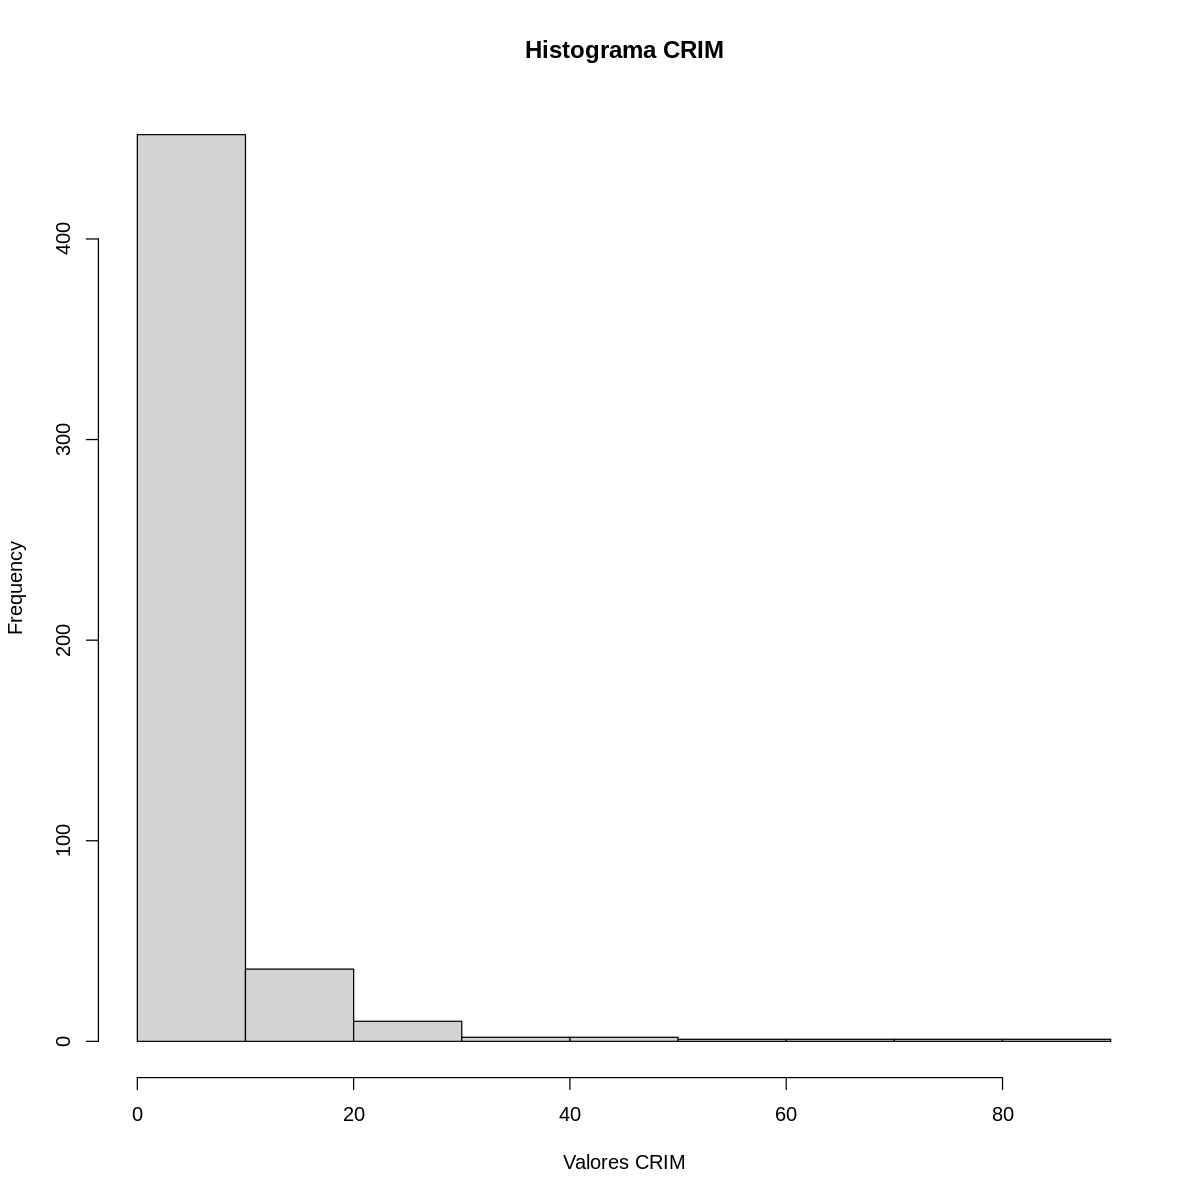

In [ ]:
#CRIM
#Histograma CRIM
hist(bostonDataset$CRIM, main = "Histograma CRIM", xlab="Valores CRIM")

[1] "Outliers CRIM"
 [1]  9.18702  9.23230  9.32909  9.33889  9.39063  9.51363  9.59571  9.72418
 [9]  9.82349  9.91655  9.92485  9.96654 10.06230 10.23300 10.67180 10.83420
[17] 11.08740 11.10810 11.16040 11.57790 11.81230 11.95110 12.04820 12.24720
[25] 12.80230 13.07510 13.35980 13.52220 13.67810 13.91340 14.05070 14.23620
[33] 14.33370 14.33370 14.42080 14.43830 15.02340 15.17720 15.28800 15.57570
[41] 15.86030 15.87440 16.81180 17.86670 18.08460 18.49820 18.81100 19.60910
[49] 20.08490 20.71620 22.05110 22.59710 23.64820 24.39380 24.80170 25.04610
[57] 25.94060 28.65580 37.66190 38.35180 41.52920 45.74610 51.13580 67.92080
[65] 73.53410 88.97620


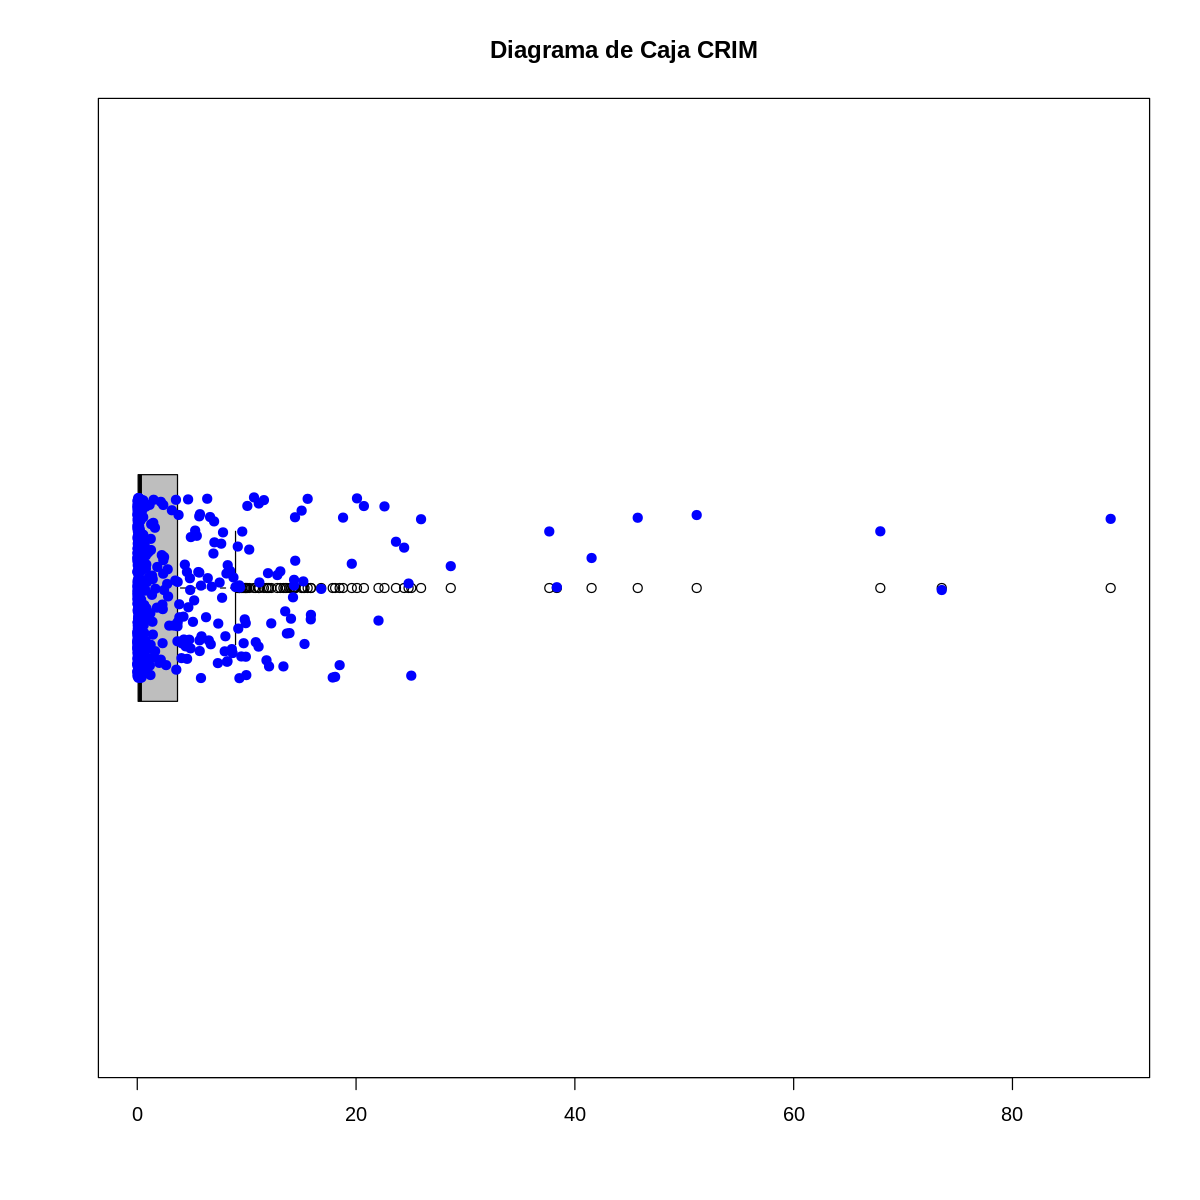

In [ ]:
outliersCRIM<-boxplot(bostonDataset$CRIM, main = "Diagrama de Caja CRIM", boxwex = 0.5,col="gray", horizontal = TRUE)$out
print('Outliers CRIM')
print(sort(outliersCRIM, decreasing = FALSE))
stripchart(bostonDataset$CRIM, method = "jitter", pch = 19, add = TRUE, col = "blue")

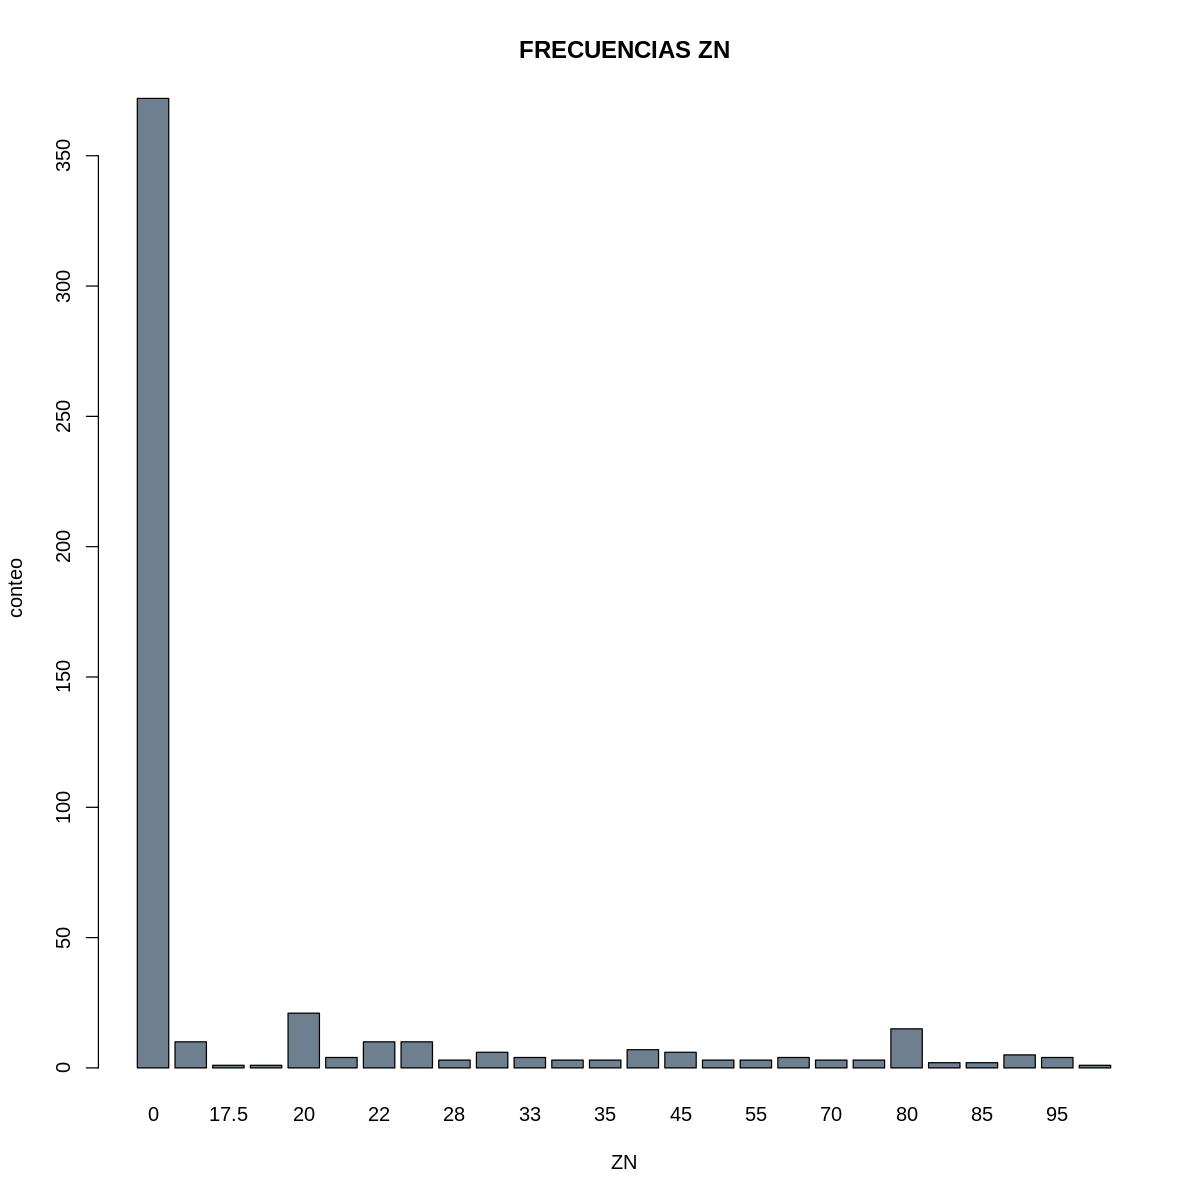

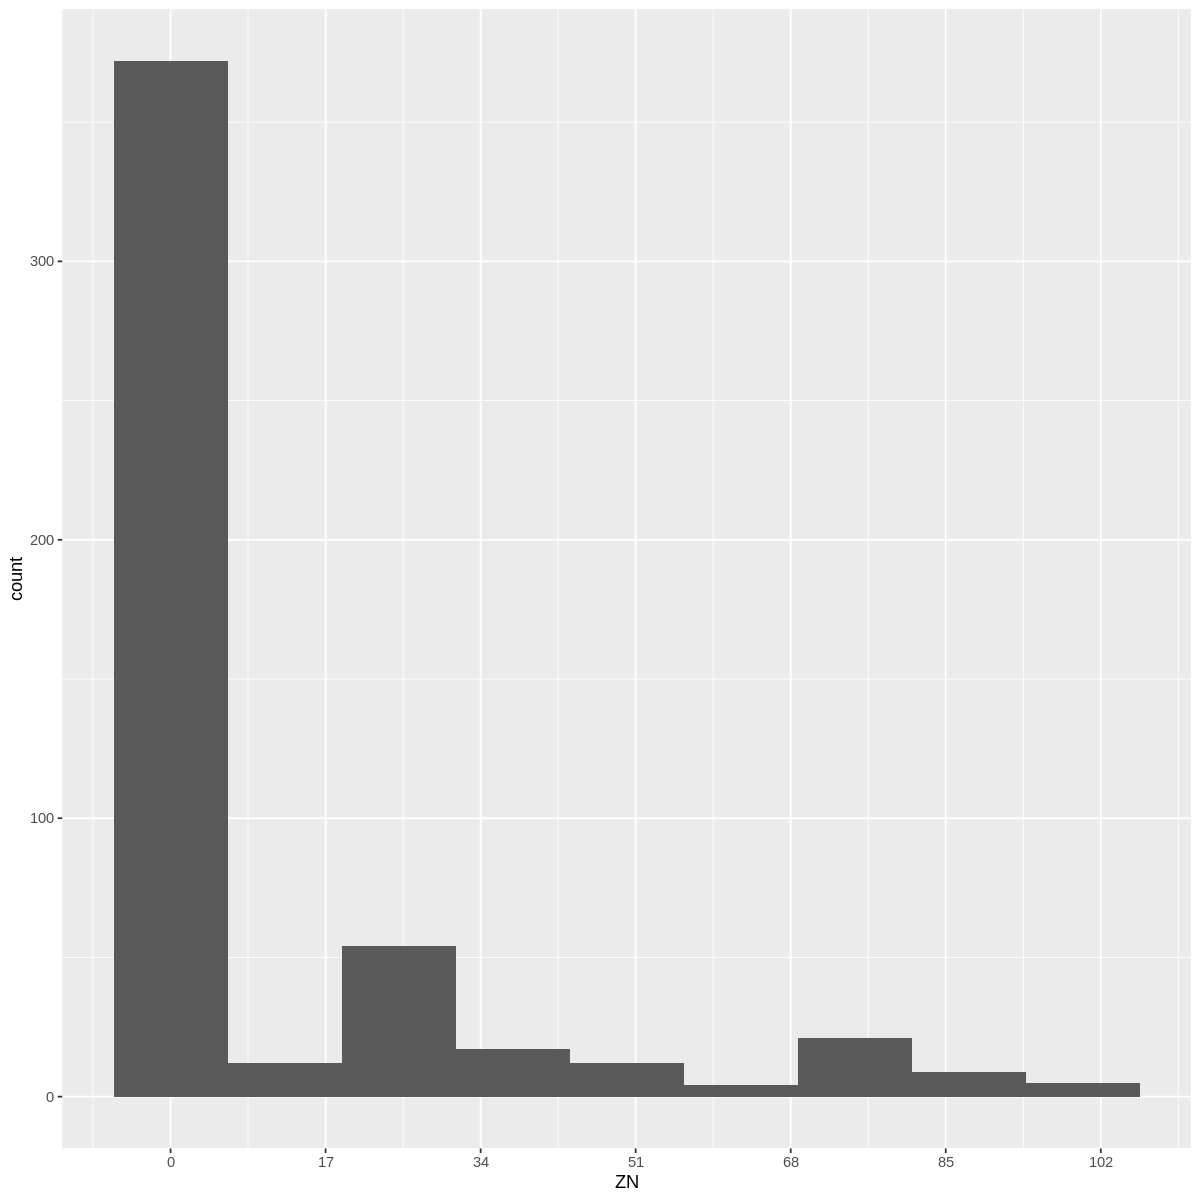

In [ ]:
#ZN
freqZN <- table(bostonDataset$ZN)
barplot(freqZN,xlab="ZN",ylab="conteo", main="FRECUENCIAS ZN",col=rgb(0.43,0.5,0.56))
#Histograma ZN
#hist(bostonDataset$ZN, main = "Histograma ZN", xlab="Valores ZN")
uniqueValuesZN <- length(unique(bostonDataset$ZN))
maxValueZN <- max(bostonDataset$ZN)
minValueZN <- min(bostonDataset$ZN)
intervalNumberZN <- round(1 + (3.322 * log10(uniqueValuesZN)))
lengthIntervalZN <- round((maxValueZN-minValueZN)/intervalNumberZN)
xZN <- seq(from = minValueZN-lengthIntervalZN, to = maxValueZN+lengthIntervalZN, by = lengthIntervalZN)
#ggplot(data = bostonDataset)+ geom_histogram(mapping = aes(x = ZN), bins = uniqueValuesZN, binwidth = 0.1) + scale_x_continuous(limit = c(minValueZN, maxValueZN), breaks = xZN) + scale_y_continuous(limit = c(0, 10), breaks = yZN)
plotZN1 <- ggplot(data = bostonDataset)+ geom_histogram(mapping = aes(x = ZN), bins = length(xZN) * 1.2) + scale_x_continuous(breaks=xZN)
plotZN1

[1] "Outliers ZN"
 [1]  33.0  33.0  33.0  33.0  34.0  34.0  34.0  35.0  35.0  35.0  40.0  40.0
[13]  40.0  40.0  40.0  40.0  40.0  45.0  45.0  45.0  45.0  45.0  45.0  52.5
[25]  52.5  52.5  55.0  55.0  55.0  60.0  60.0  60.0  60.0  70.0  70.0  70.0
[37]  75.0  75.0  75.0  80.0  80.0  80.0  80.0  80.0  80.0  80.0  80.0  80.0
[49]  80.0  80.0  80.0  80.0  80.0  80.0  82.5  82.5  85.0  85.0  90.0  90.0
[61]  90.0  90.0  90.0  95.0  95.0  95.0  95.0 100.0


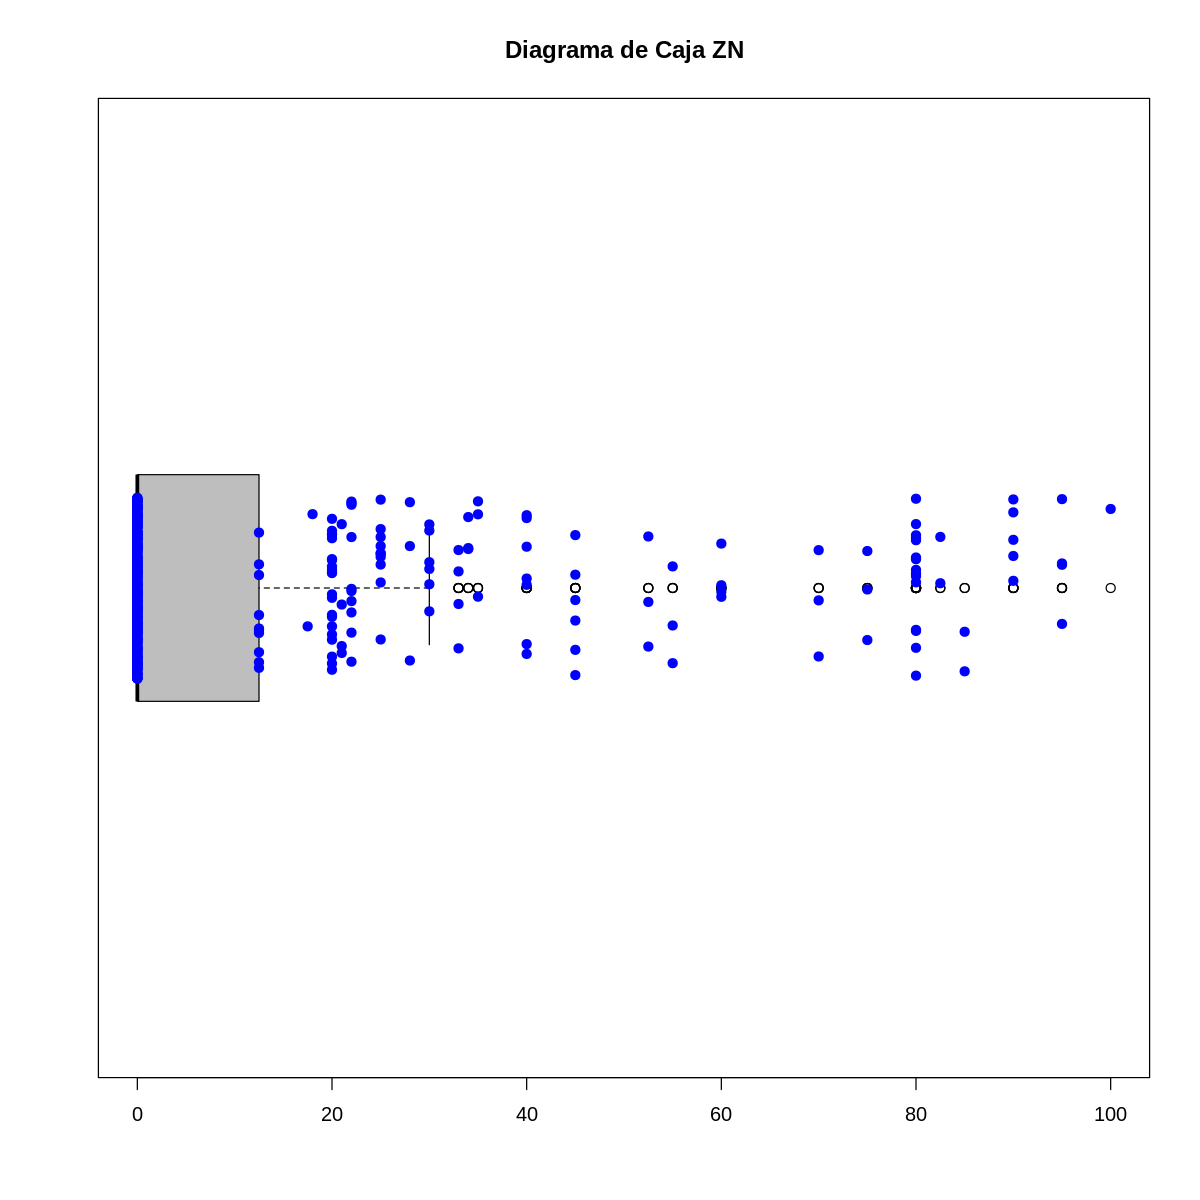

In [ ]:
outliersZN<-boxplot(bostonDataset$ZN, main = "Diagrama de Caja ZN", boxwex = 0.5,col="gray", horizontal = TRUE)$out
print('Outliers ZN')
print(sort(outliersZN, decreasing = FALSE))
stripchart(bostonDataset$ZN, method = "jitter", pch = 19, add = TRUE, col = "blue")

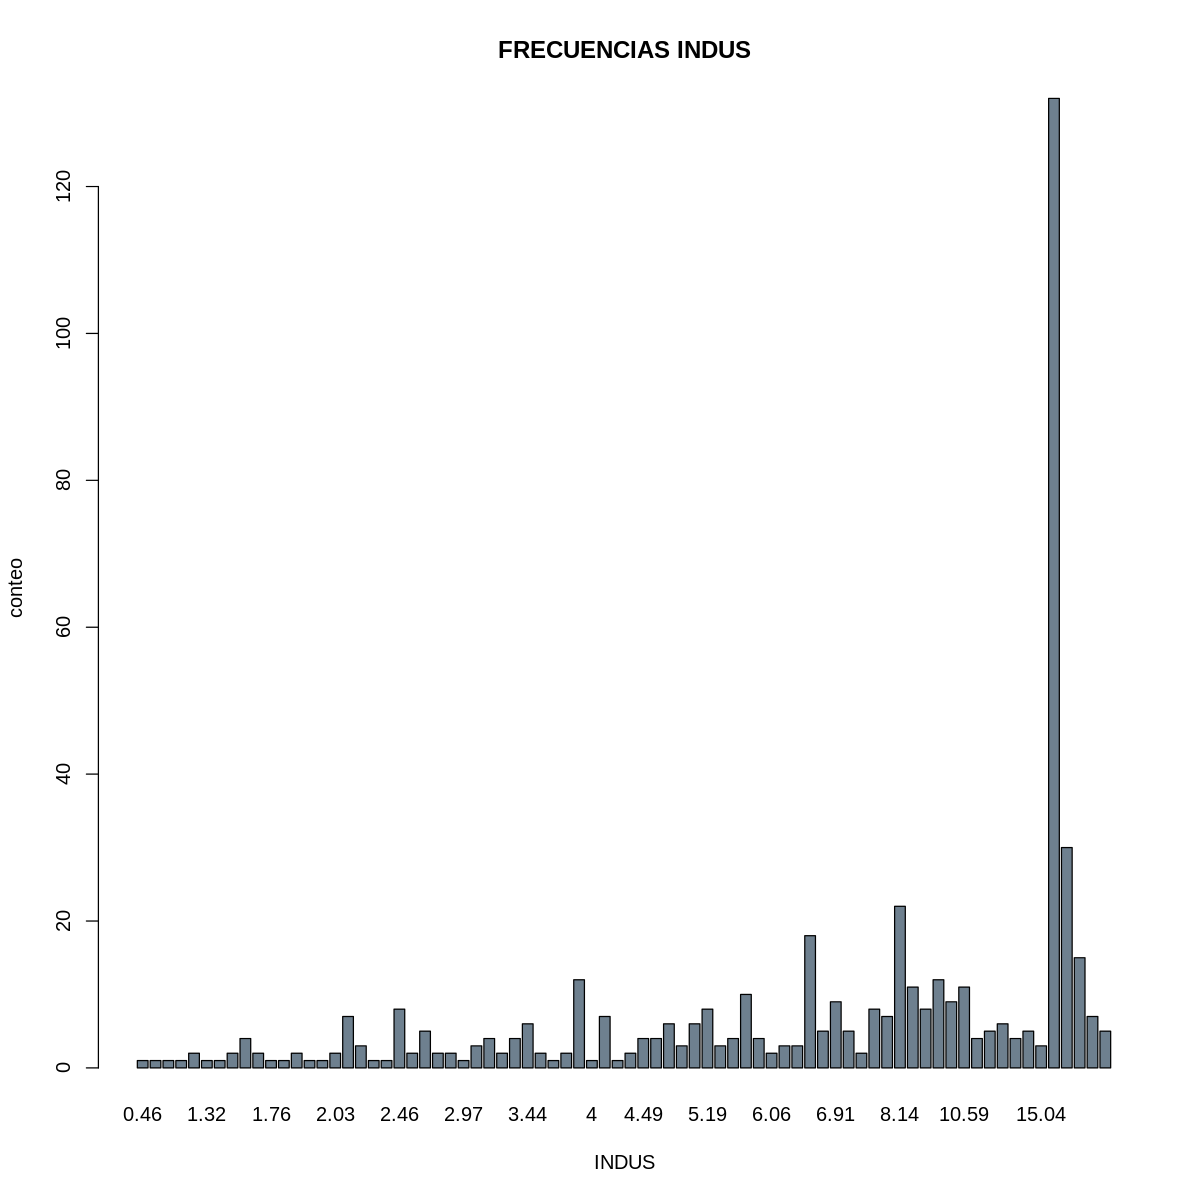

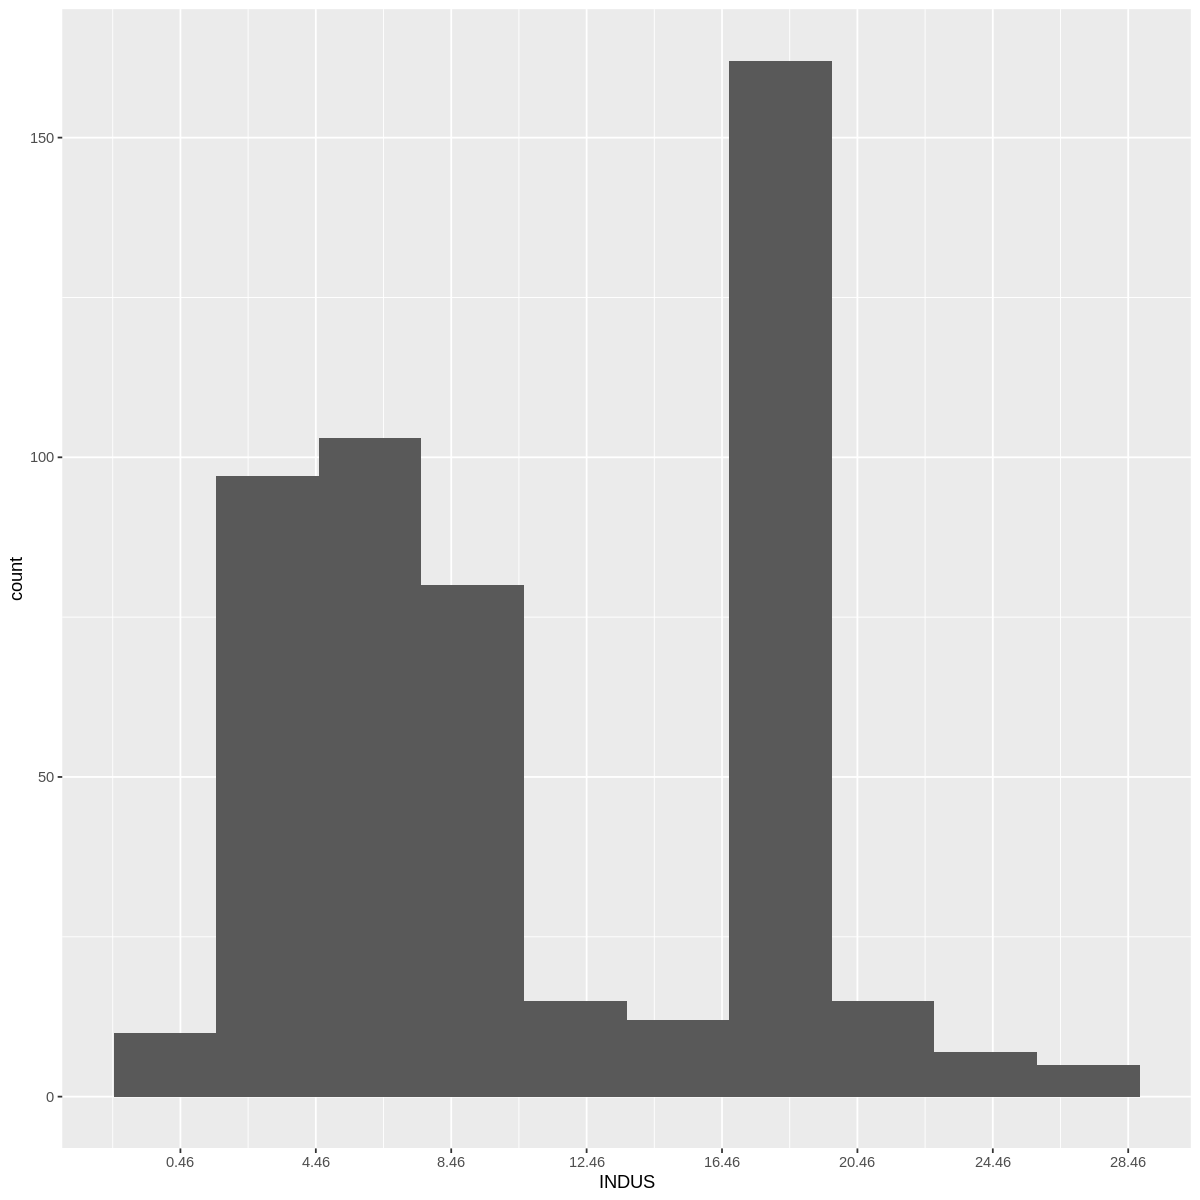

In [ ]:
#INDUS
freqINDUS <- table(bostonDataset$INDUS)
barplot(freqINDUS,xlab="INDUS",ylab="conteo", main="FRECUENCIAS INDUS",col=rgb(0.43,0.5,0.56))
#Histograma INDUS
#hist(bostonDataset$INDUS, main = "Histograma INDUS", xlab="Valores INDUS")
uniqueValuesINDUS <- length(unique(bostonDataset$INDUS))
maxValueINDUS <- max(bostonDataset$INDUS)
minValueINDUS <- min(bostonDataset$INDUS)
intervalNumberINDUS <- round(1 + (3.322 * log10(uniqueValuesINDUS)))
lengthIntervalINDUS <- round((maxValueINDUS-minValueINDUS)/intervalNumberINDUS)
xINDUS <- seq(from = minValueINDUS-lengthIntervalINDUS, to = maxValueINDUS+lengthIntervalINDUS, by = lengthIntervalINDUS)
#ggplot(data = bostonDataset)+ geom_histogram(mapping = aes(x = INDUS), bins = uniqueValuesINDUS, binwidth = 0.1) + scale_x_continuous(limit = c(minValueINDUS, maxValueINDUS), breaks = xINDUS) + scale_y_continuous(limit = c(0, 10), breaks = yINDUS)
plotINDUS1 <- ggplot(data = bostonDataset)+ geom_histogram(mapping = aes(x = INDUS), bins = length(xINDUS) * 1.2) + scale_x_continuous(breaks=xINDUS)
plotINDUS1

[1] "Outliers INDUS"
numeric(0)


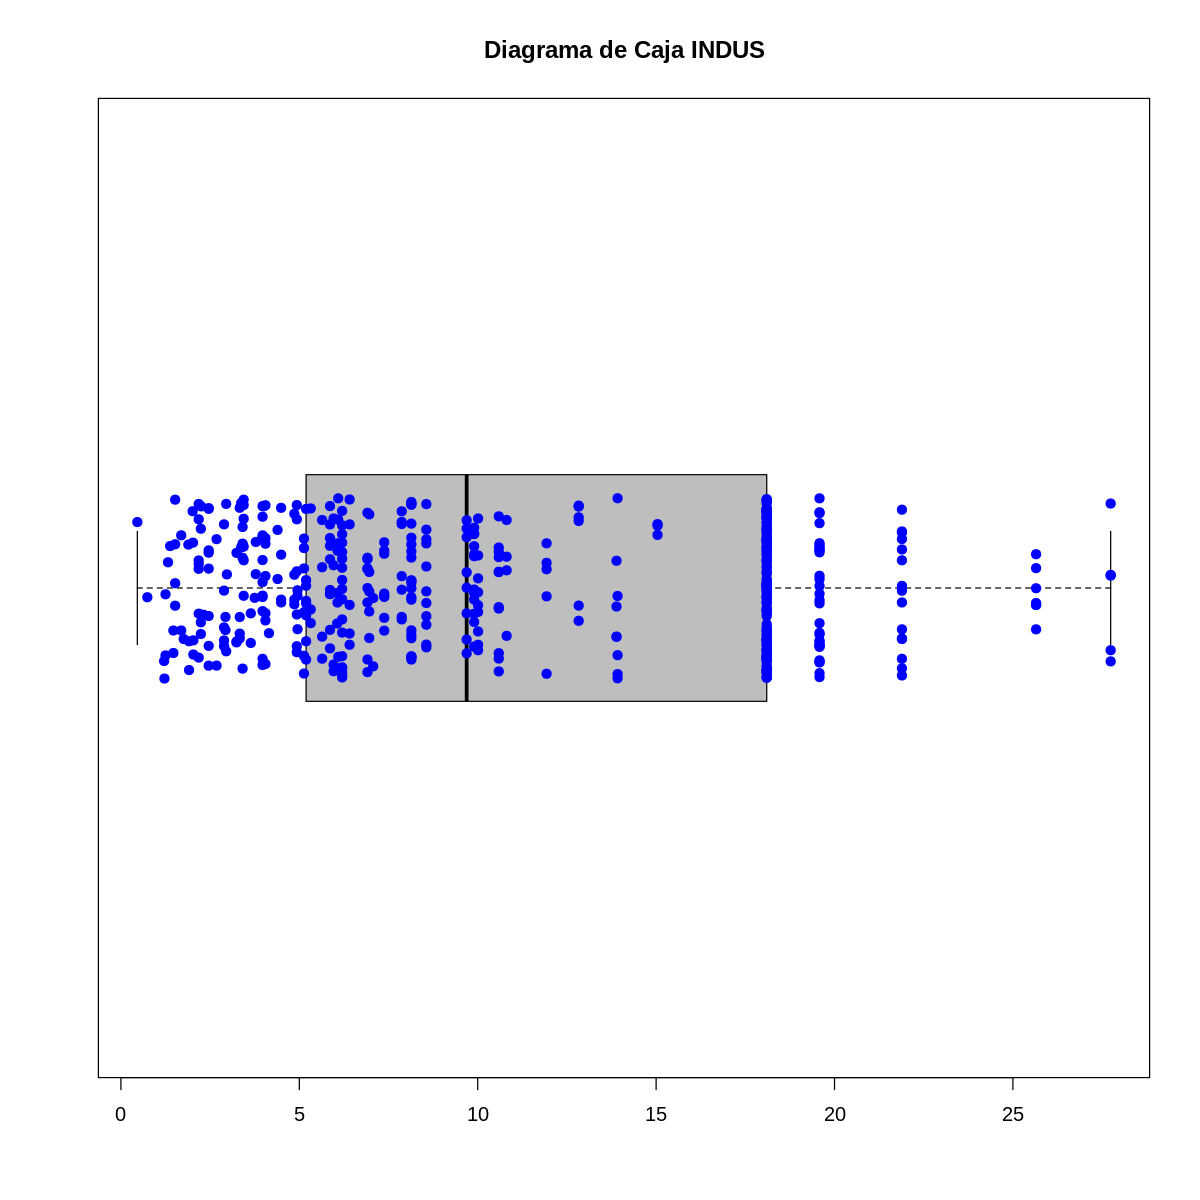

In [ ]:
outliersINDUS<-boxplot(bostonDataset$INDUS, main = "Diagrama de Caja INDUS", boxwex = 0.5,col="gray", horizontal = TRUE)$out
print('Outliers INDUS')
print(sort(outliersINDUS, decreasing = FALSE))
stripchart(bostonDataset$INDUS, method = "jitter", pch = 19, add = TRUE, col = "blue")

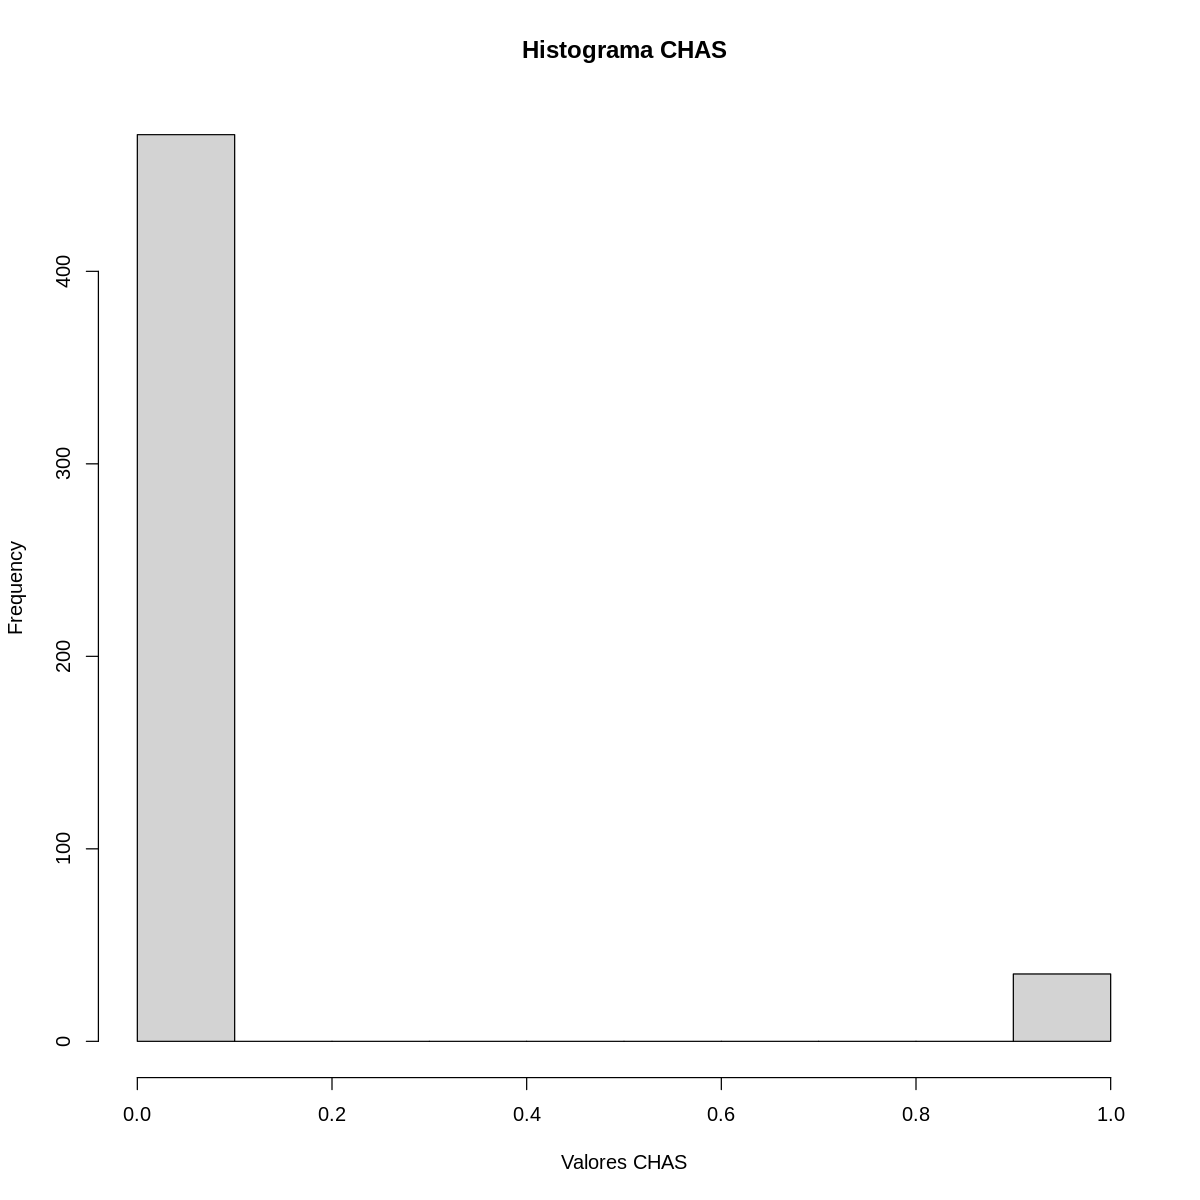

In [ ]:
#CHAS
#Histograma CHAS
hist(bostonDataset$CHAS, main = "Histograma CHAS", xlab="Valores CHAS")

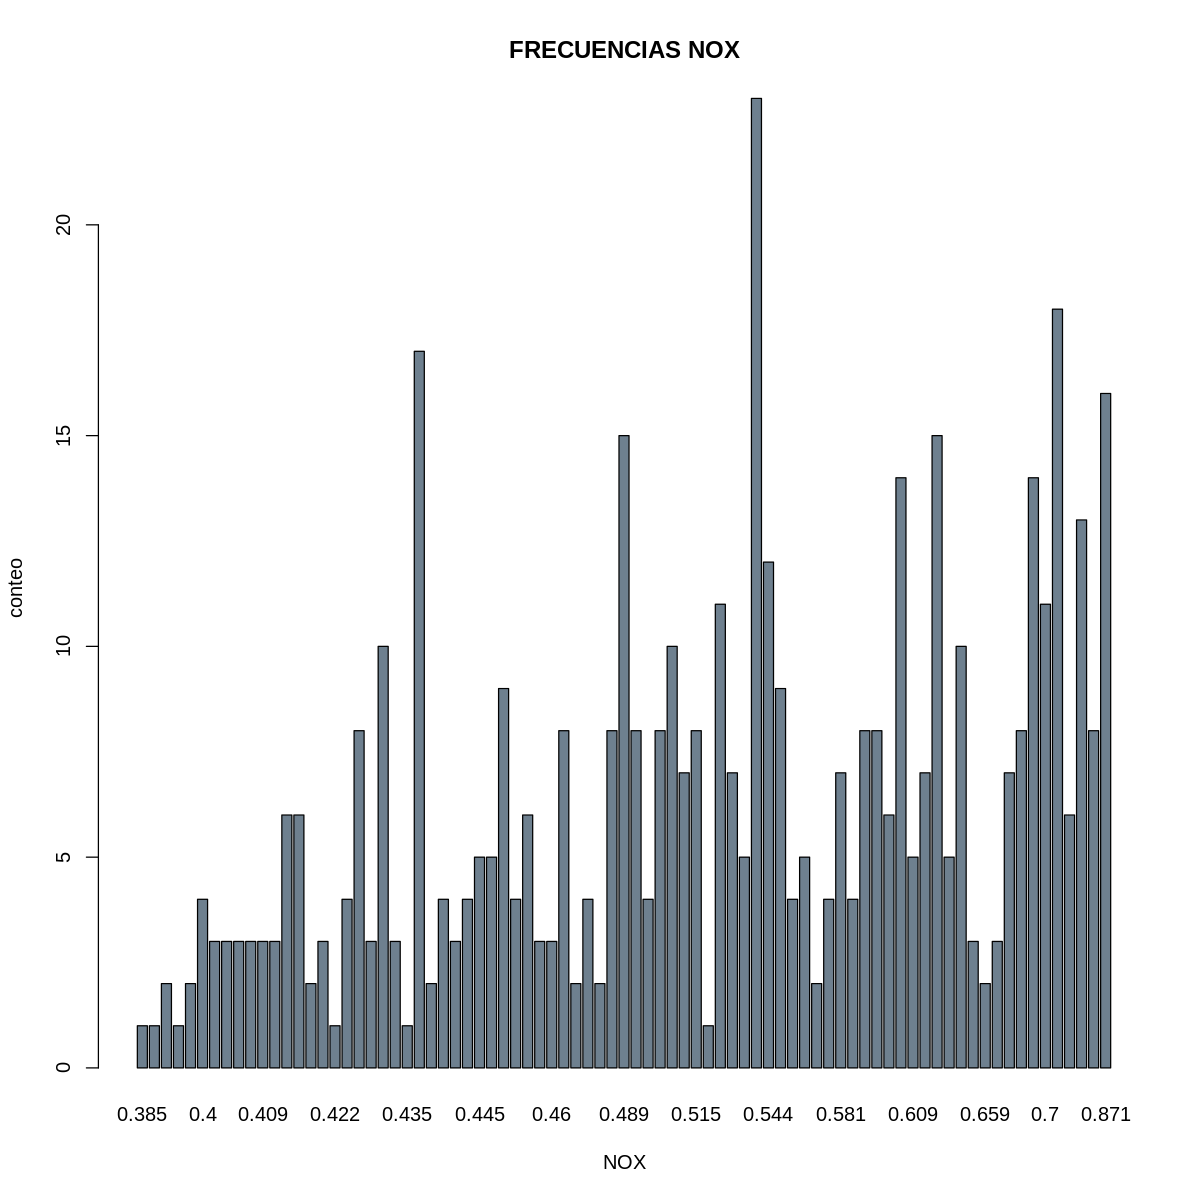

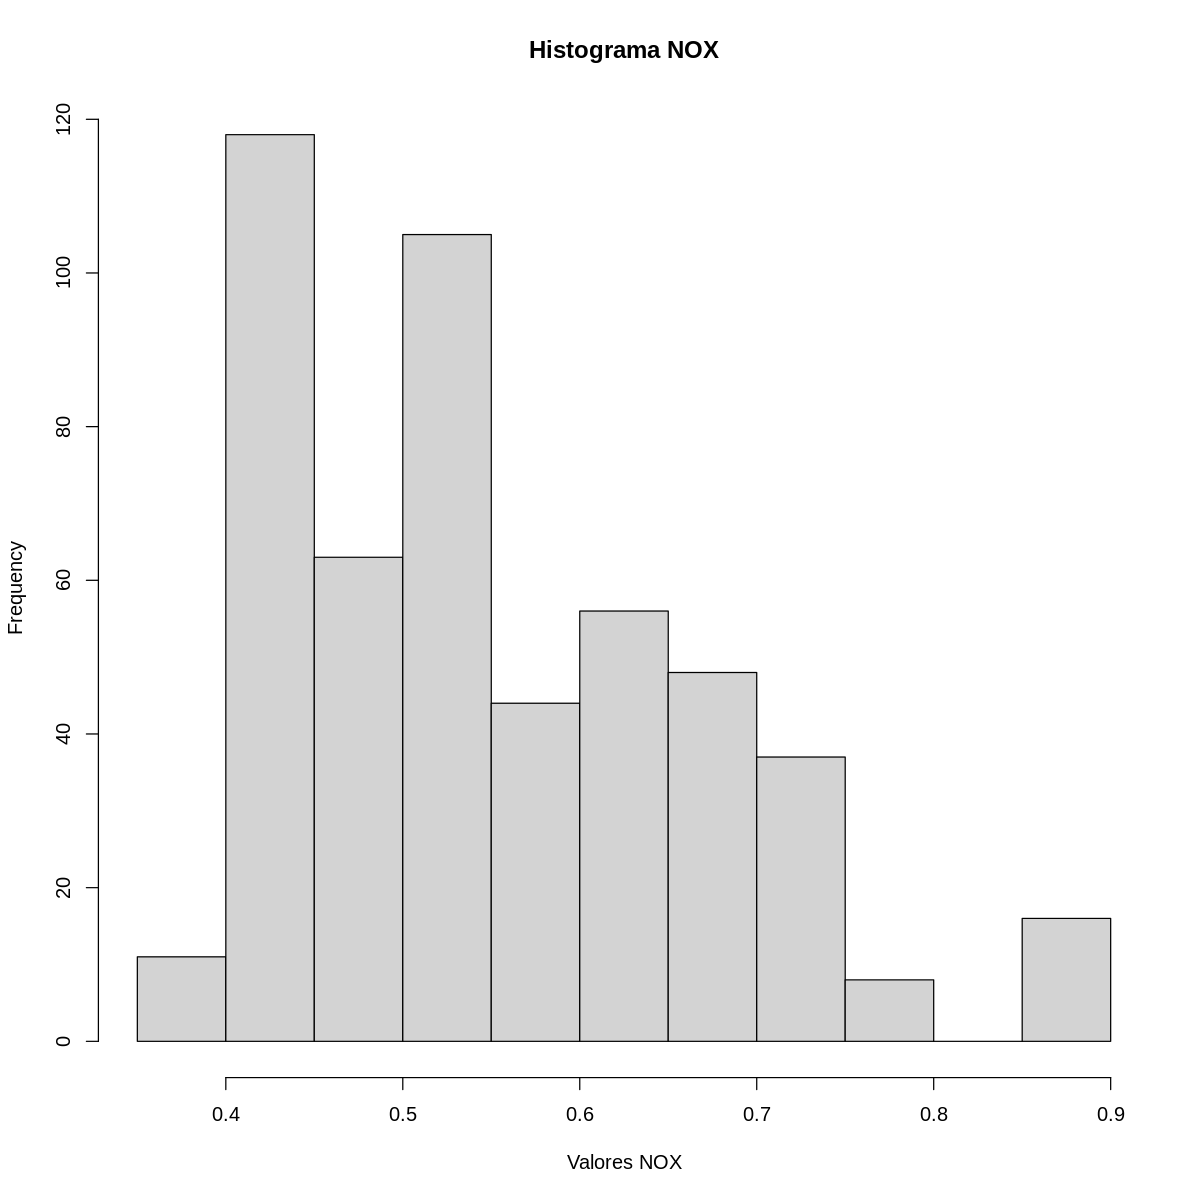

In [ ]:
#NOX
freqNOX <- table(bostonDataset$NOX)
barplot(freqNOX,xlab="NOX",ylab="conteo", main="FRECUENCIAS NOX",col=rgb(0.43,0.5,0.56))
#Histograma NOX
hist(bostonDataset$NOX, main = "Histograma NOX", xlab="Valores NOX")

[1] "Outliers NOX"
numeric(0)


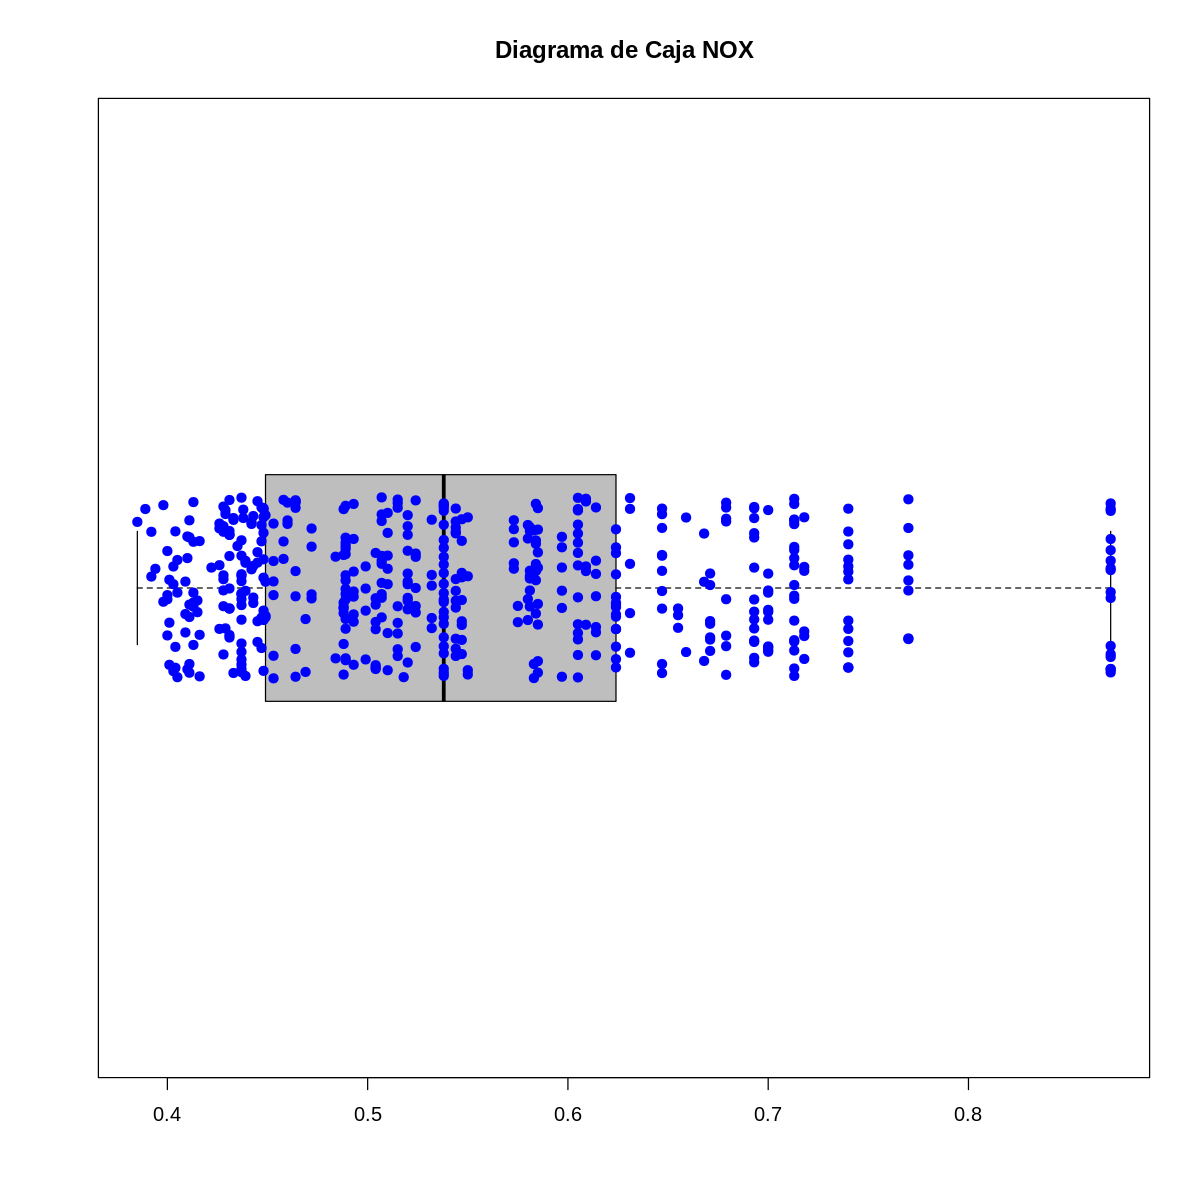

In [ ]:
outliersNOX<-boxplot(bostonDataset$NOX, main = "Diagrama de Caja NOX", boxwex = 0.5,col="gray", horizontal = TRUE)$out
print('Outliers NOX')
print(sort(outliersNOX, decreasing = FALSE))
stripchart(bostonDataset$NOX, method = "jitter", pch = 19, add = TRUE, col = "blue")

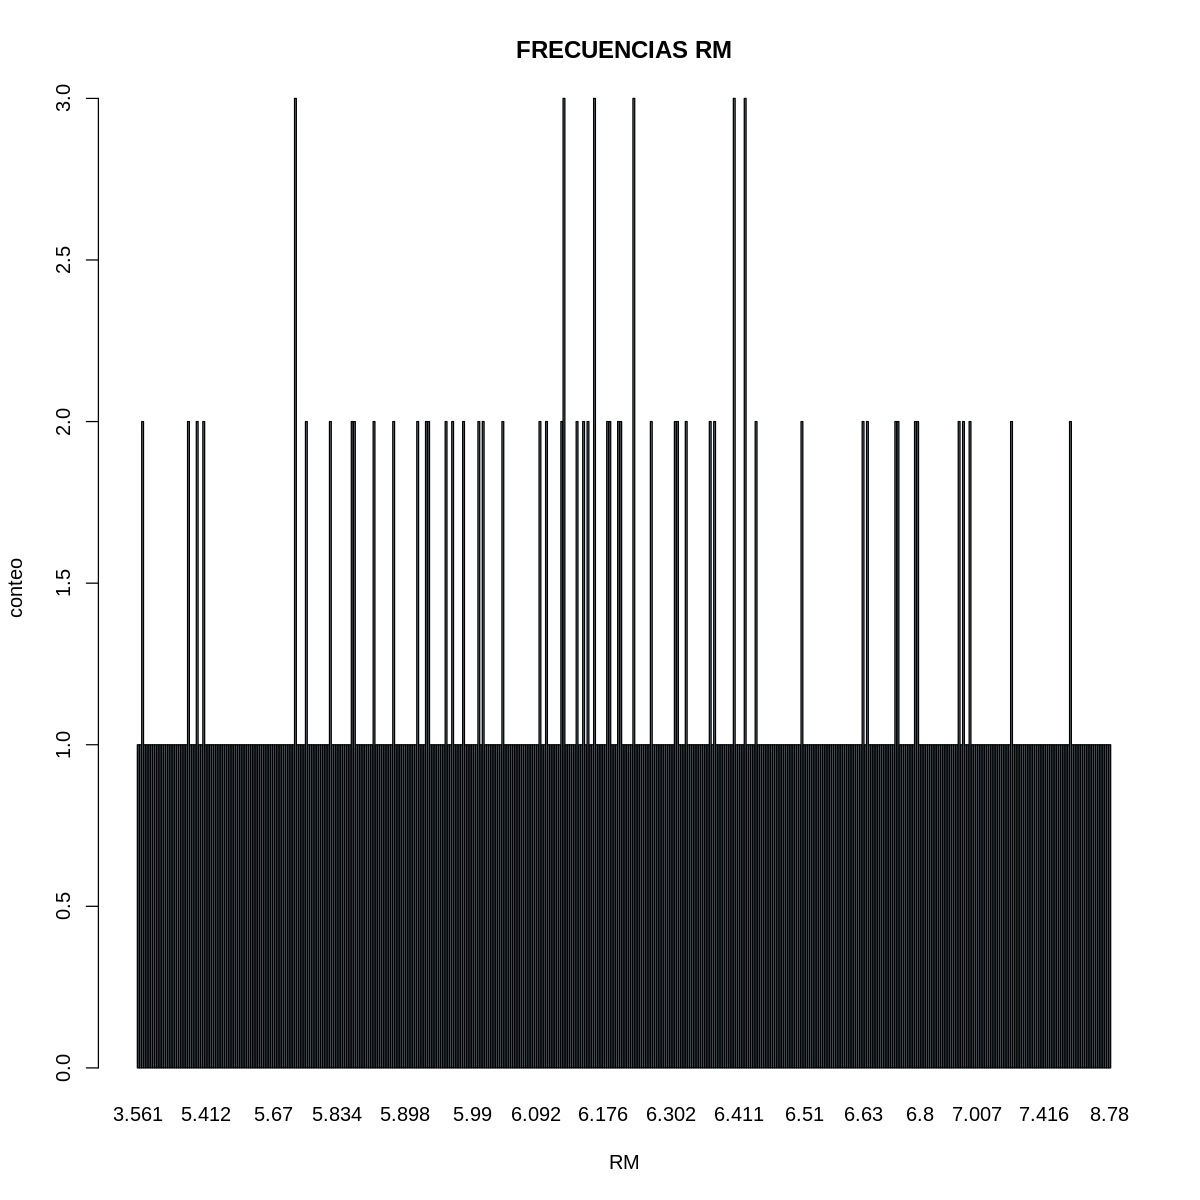

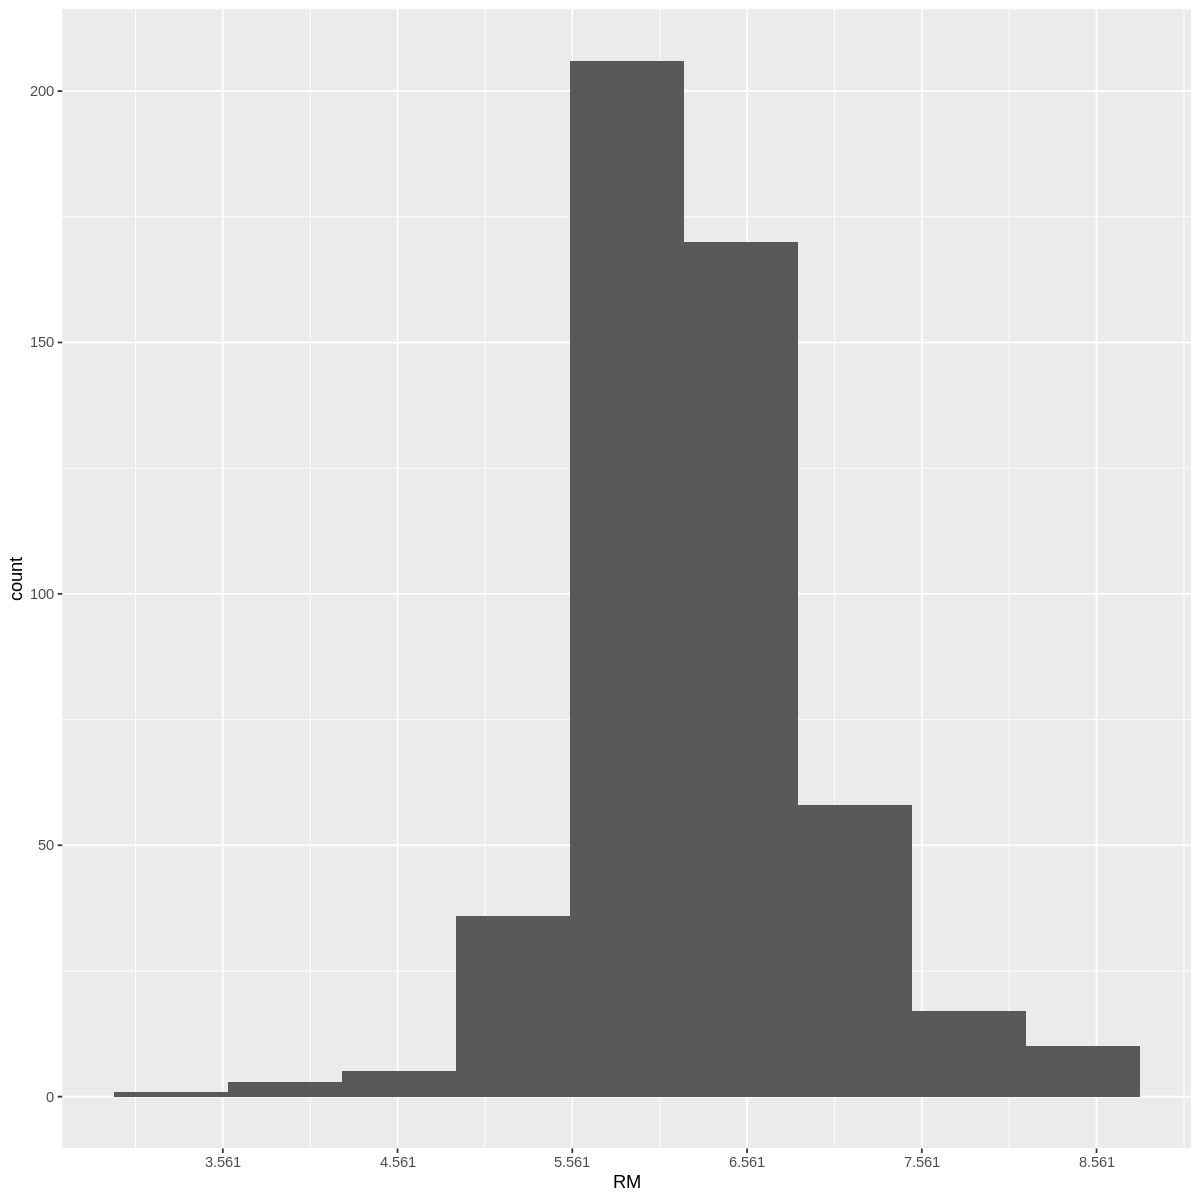

In [ ]:
#RM
freqRM <- table(bostonDataset$RM)
barplot(freqRM,xlab="RM",ylab="conteo", main="FRECUENCIAS RM",col=rgb(0.43,0.5,0.56))
#Histograma RM
#hist(bostonDataset$RM, main = "Histograma RM", xlab="Valores RM")
uniqueValuesRM <- length(unique(bostonDataset$RM))
maxValueRM <- max(bostonDataset$RM)
minValueRM <- min(bostonDataset$RM)
intervalNumberRM <- round(1 + (3.322 * log10(uniqueValuesRM)))
lengthIntervalRM <- round((maxValueRM-minValueRM)/intervalNumberRM)
xRM <- seq(from = minValueRM-lengthIntervalRM, to = maxValueRM+lengthIntervalRM, by = lengthIntervalRM)
#ggplot(data = bostonDataset)+ geom_histogram(mapping = aes(x = RM), bins = uniqueValuesRM, binwidth = 0.1) + scale_x_continuous(limit = c(minValueRM, maxValueRM), breaks = xRM) + scale_y_continuous(limit = c(0, 10), breaks = yRM)
plotRM1 <- ggplot(data = bostonDataset)+ geom_histogram(mapping = aes(x = RM), bins = length(xRM) * 1.2) + scale_x_continuous(breaks=xRM)
plotRM1

[1] "Outliers RM"
 [1] 3.561 3.863 4.138 4.138 4.368 4.519 4.628 4.652 7.765 7.802 7.820 7.820
[13] 7.831 7.853 7.875 7.923 7.929 8.034 8.040 8.069 8.247 8.259 8.266 8.297
[25] 8.337 8.375 8.398 8.704 8.725 8.780


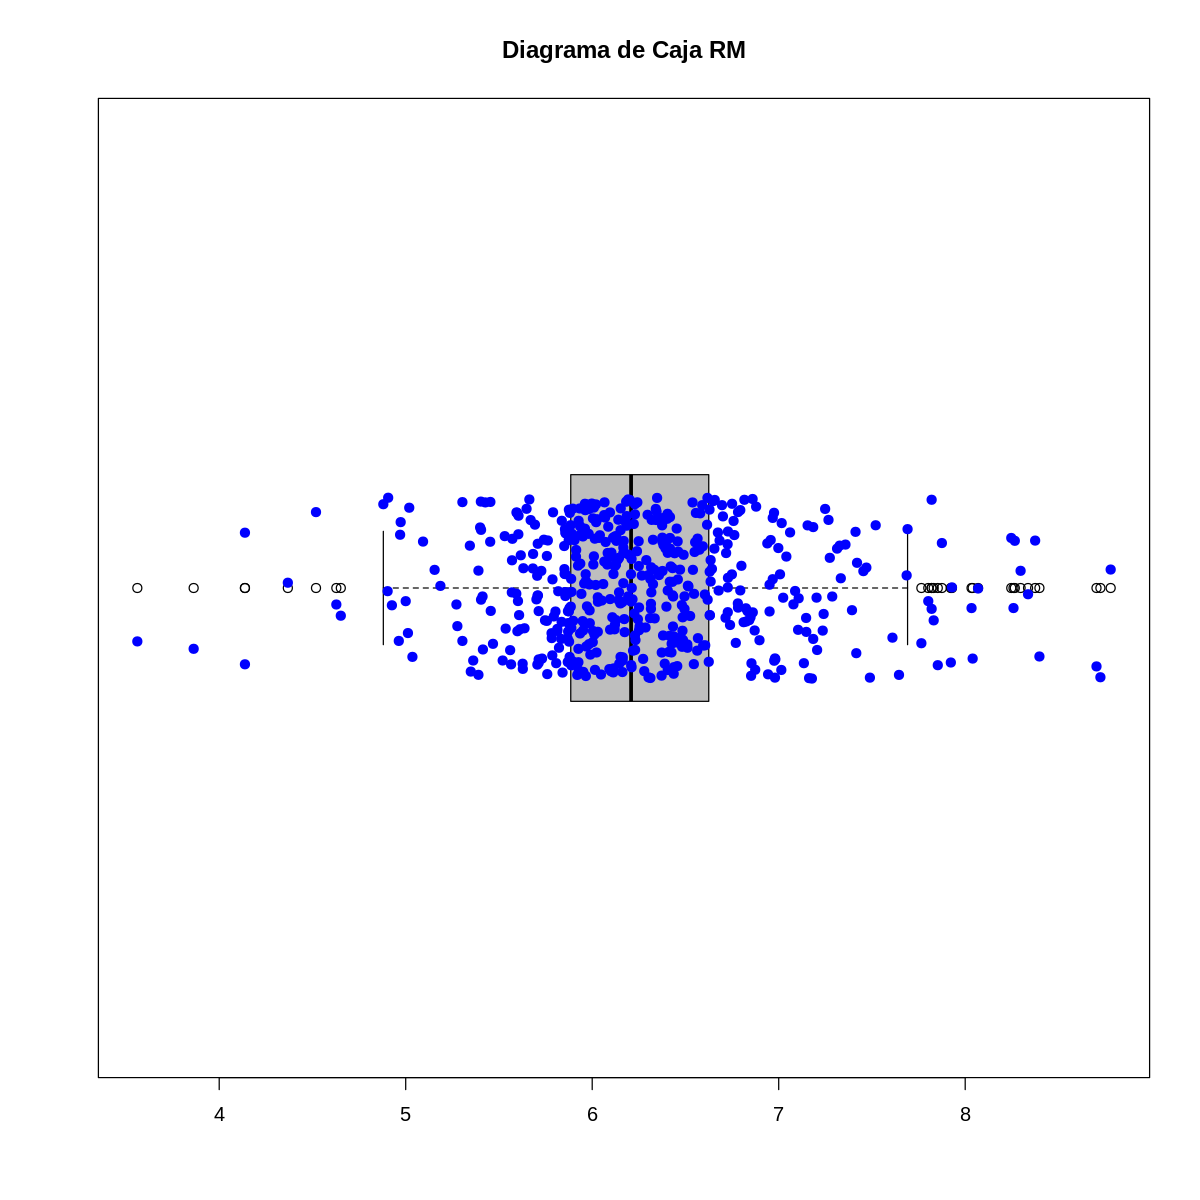

In [ ]:
outliersRM<-boxplot(bostonDataset$RM, main = "Diagrama de Caja RM", boxwex = 0.5,col="gray", horizontal = TRUE)$out
print('Outliers RM')
print(sort(outliersRM, decreasing = FALSE))
stripchart(bostonDataset$RM, method = "jitter", pch = 19, add = TRUE, col = "blue")

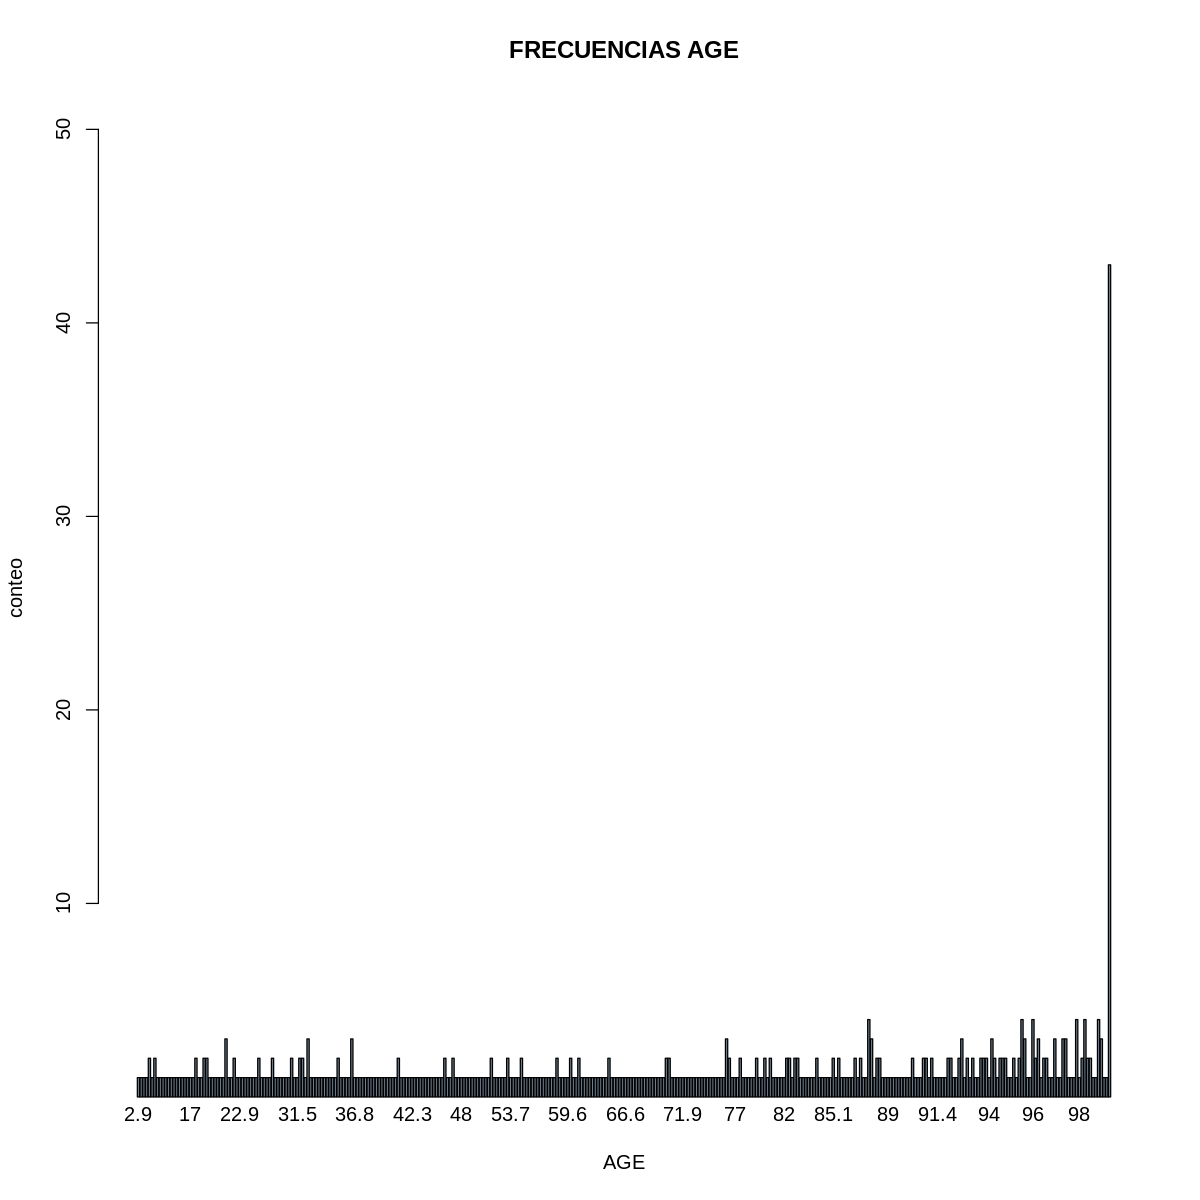

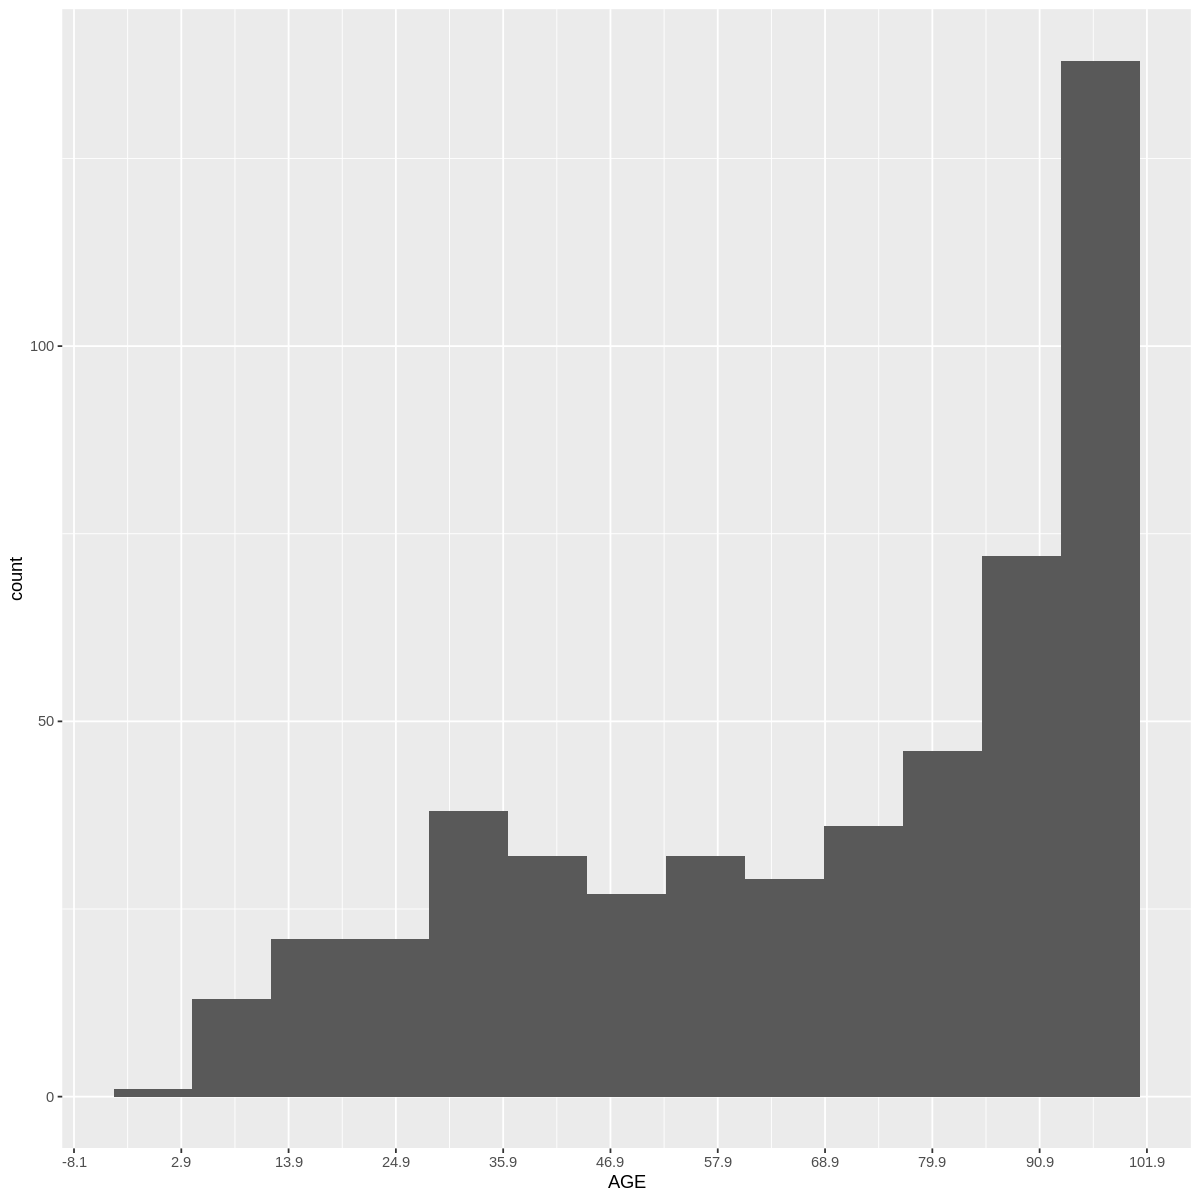

In [ ]:
#AGE
freqAGE <- table(bostonDataset$AGE)
barplot(freqAGE,ylim=c(min(freqAGE),max(freqAGE) + (max(freqAGE)*0.2) ),xlab="AGE",ylab="conteo", main="FRECUENCIAS AGE",col=rgb(0.43,0.5,0.56))
#Histograma AGE
#hist(bostonDataset$AGE, main = "Histograma AGE", xlab="Valores AGE")
uniqueValuesAGE <- length(unique(bostonDataset$AGE))
maxValueAGE <- max(bostonDataset$AGE)
minValueAGE <- min(bostonDataset$AGE)
intervalNumberAGE <- round(1 + (3.322 * log10(uniqueValuesAGE)))
lengthIntervalAGE <- round((maxValueAGE-minValueAGE)/intervalNumberAGE)
xAGE <- seq(from = minValueAGE-lengthIntervalAGE, to = maxValueAGE+lengthIntervalAGE, by = lengthIntervalAGE)
#ggplot(data = bostonDataset)+ geom_histogram(mapping = aes(x = AGE), bins = uniqueValuesAGE, binwidth = 0.1) + scale_x_continuous(limit = c(minValueAGE, maxValueAGE), breaks = xAGE) + scale_y_continuous(limit = c(0, 10), breaks = yAGE)
plotAGE1 <- ggplot(data = bostonDataset)+ geom_histogram(mapping = aes(x = AGE), bins = length(xAGE) * 1.2) + scale_x_continuous(breaks=xAGE)
plotAGE1

[1] "Outliers AGE"
numeric(0)


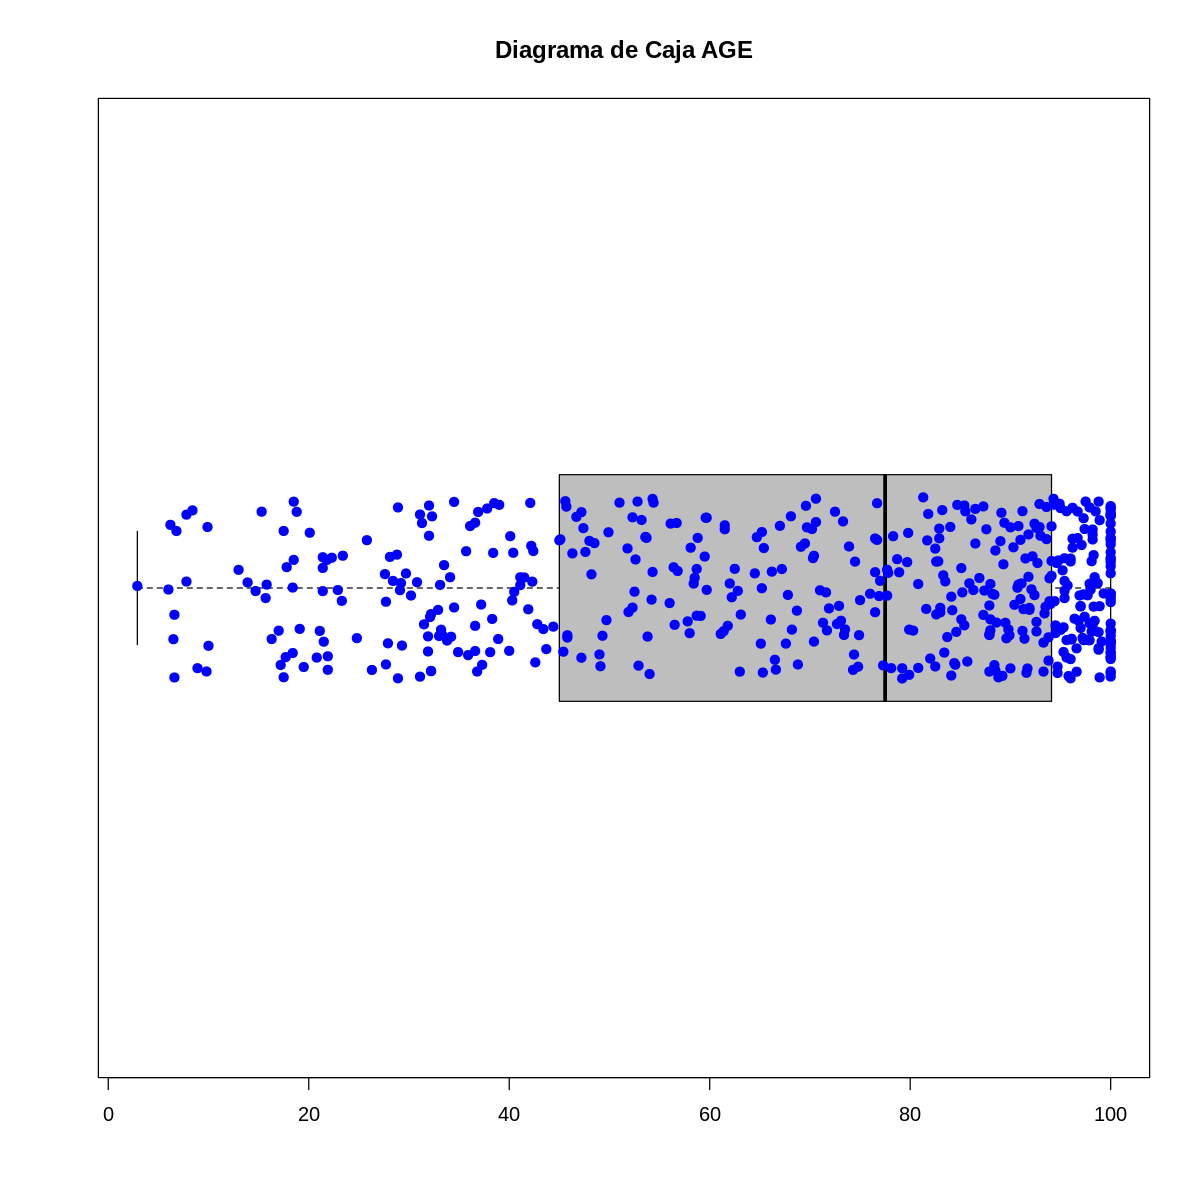

In [ ]:
outliersAGE<-boxplot(bostonDataset$AGE, main = "Diagrama de Caja AGE", boxwex = 0.5,col="gray", horizontal = TRUE)$out
print('Outliers AGE')
print(sort(outliersAGE, decreasing = FALSE))
stripchart(bostonDataset$AGE, method = "jitter", pch = 19, add = TRUE, col = "blue")

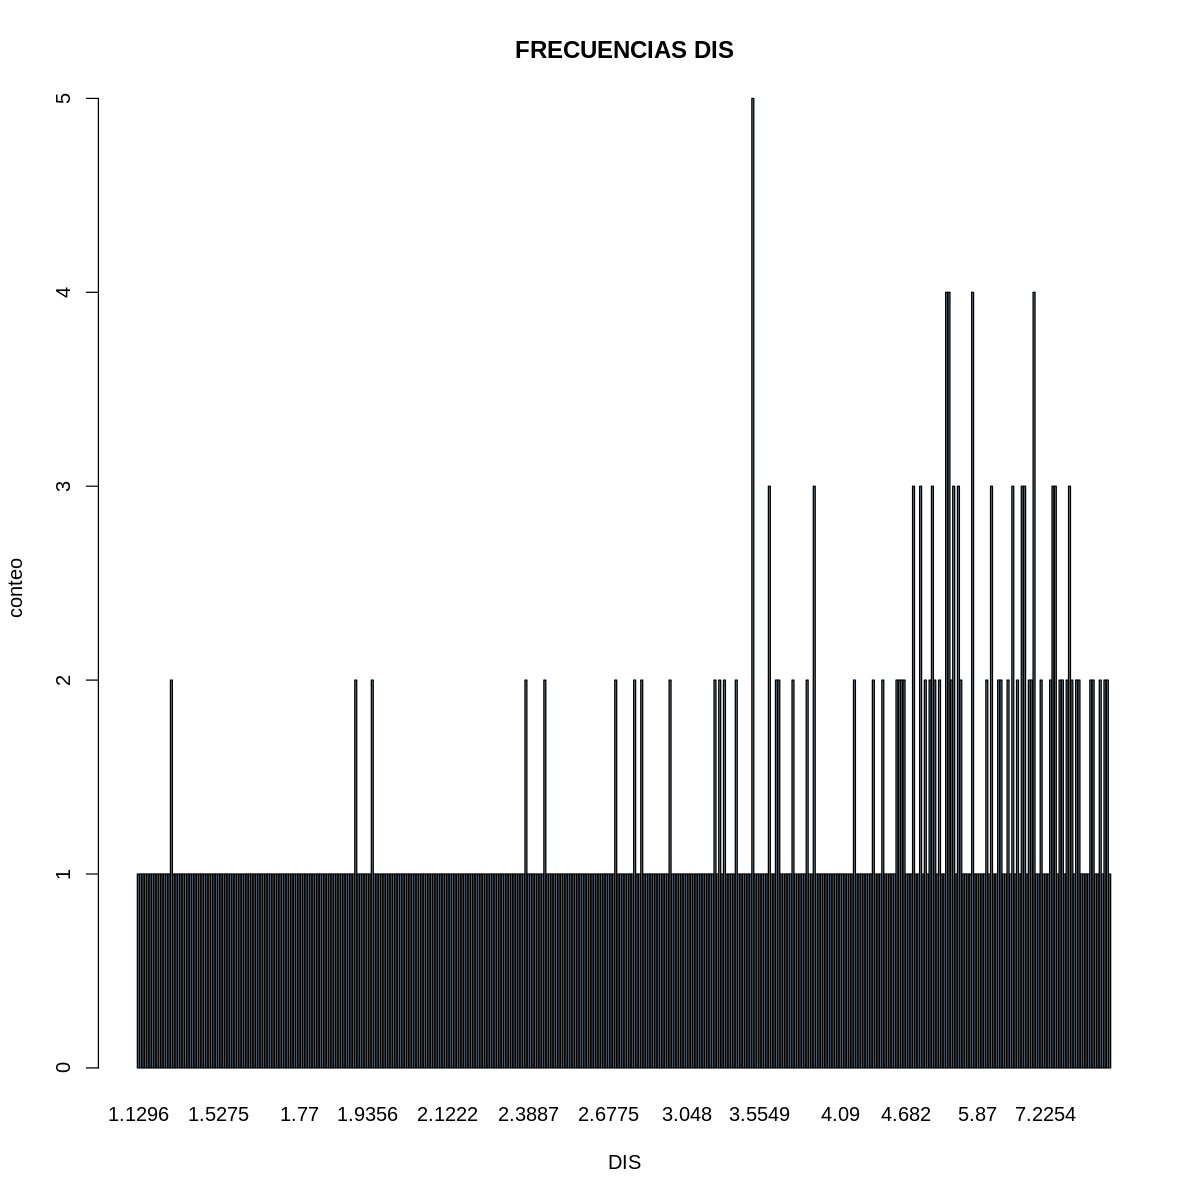

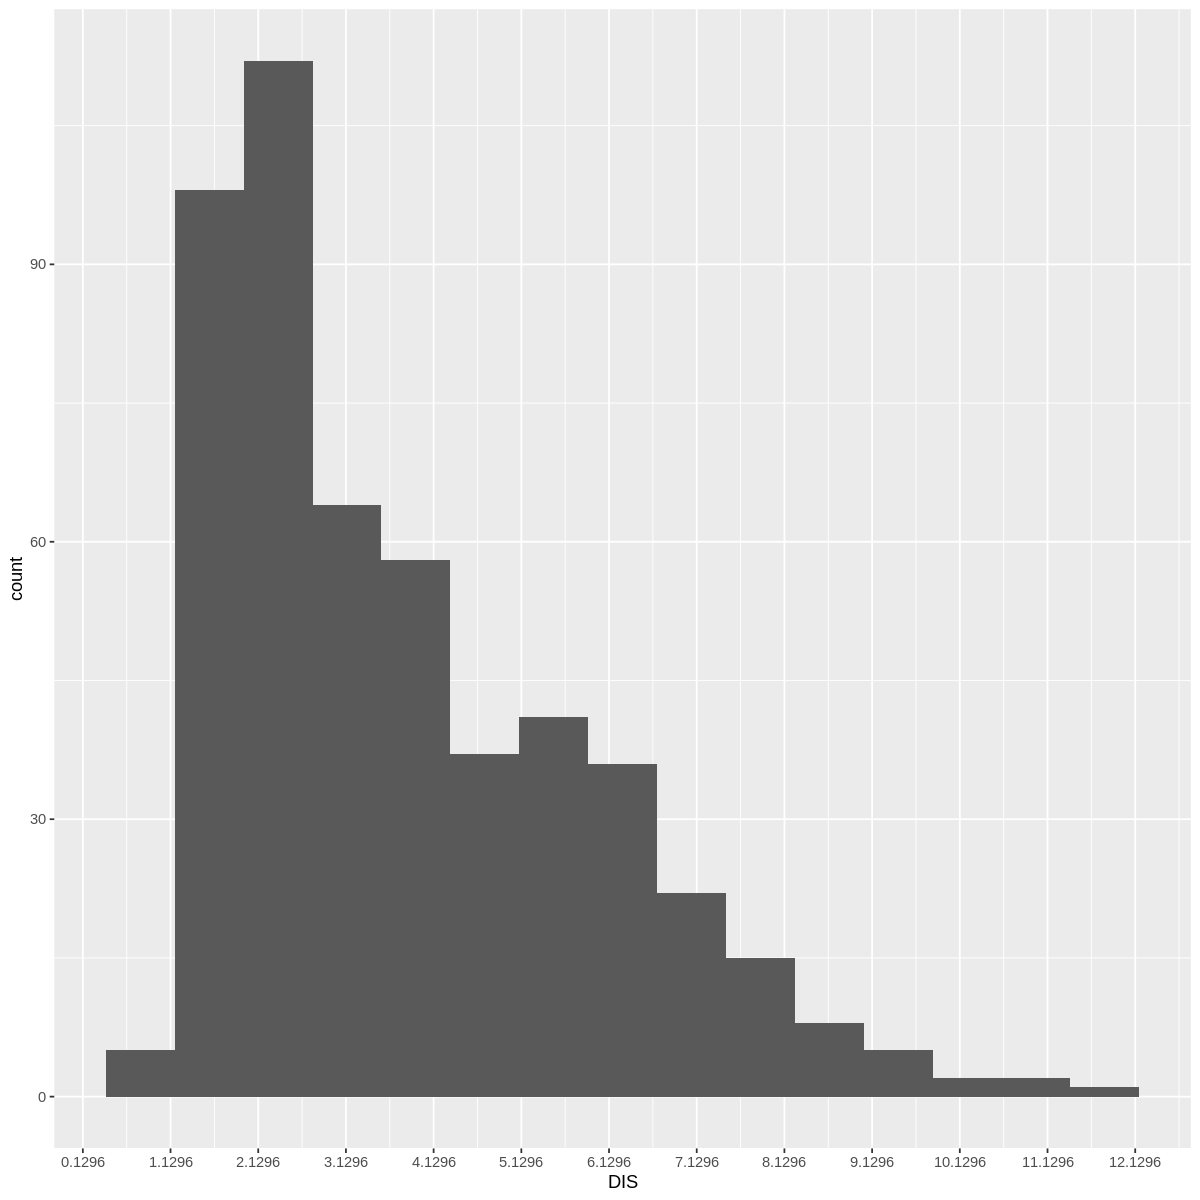

In [ ]:
#DIS
freqDIS <- table(bostonDataset$DIS)
barplot(freqDIS,xlab="DIS",ylab="conteo", main="FRECUENCIAS DIS",col=rgb(0.43,0.5,0.56))
#Histograma DIS
#hist(bostonDataset$DIS, main = "Histograma DIS", xlab="Valores DIS")
uniqueValuesDIS <- length(unique(bostonDataset$DIS))
maxValueDIS <- max(bostonDataset$DIS)
minValueDIS <- min(bostonDataset$DIS)
intervalNumberDIS <- round(1 + (3.322 * log10(uniqueValuesDIS)))
lengthIntervalDIS <- round((maxValueDIS-minValueDIS)/intervalNumberDIS)
xDIS <- seq(from = minValueDIS-lengthIntervalDIS, to = maxValueDIS+lengthIntervalDIS, by = lengthIntervalDIS)
#ggplot(data = bostonDataset)+ geom_histogram(mapping = aes(x = DIS), bins = uniqueValuesDIS, binwidth = 0.1) + scale_x_continuous(limit = c(minValueDIS, maxValueDIS), breaks = xDIS) + scale_y_continuous(limit = c(0, 10), breaks = yDIS)
plotDIS1 <- ggplot(data = bostonDataset)+ geom_histogram(mapping = aes(x = DIS), bins = length(xDIS) * 1.2) + scale_x_continuous(breaks=xDIS)
plotDIS1

[1] "Outliers DIS"
[1] 10.5857 10.5857 10.7103 10.7103 12.1265


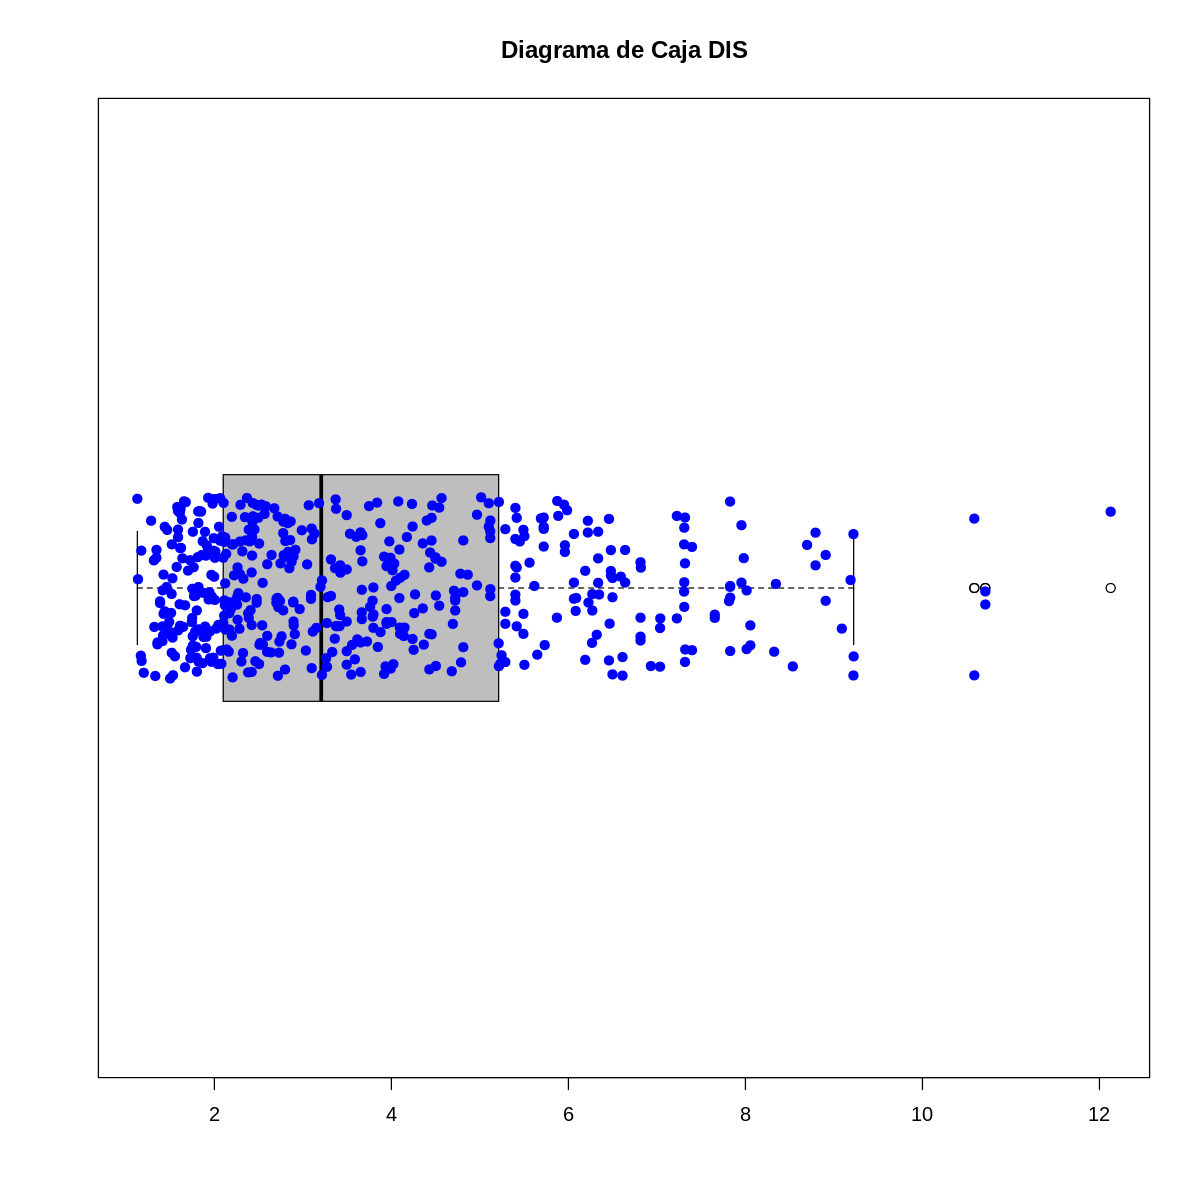

In [ ]:
outliersDIS<-boxplot(bostonDataset$DIS, main = "Diagrama de Caja DIS", boxwex = 0.5,col="gray", horizontal = TRUE)$out
print('Outliers DIS')
print(sort(outliersDIS, decreasing = FALSE))
stripchart(bostonDataset$DIS, method = "jitter", pch = 19, add = TRUE, col = "blue")

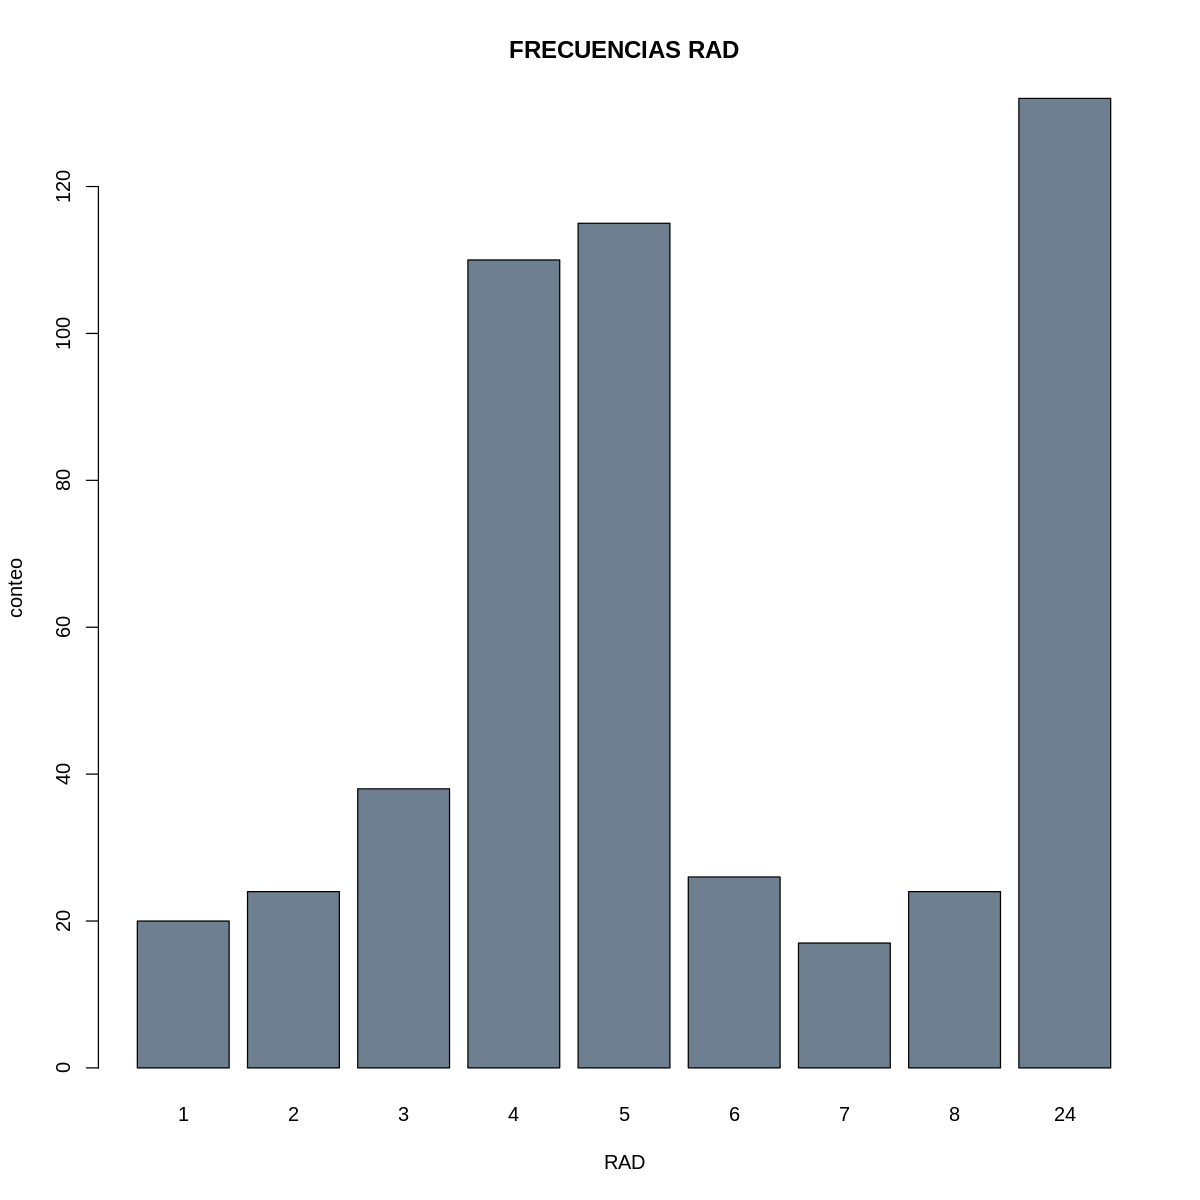

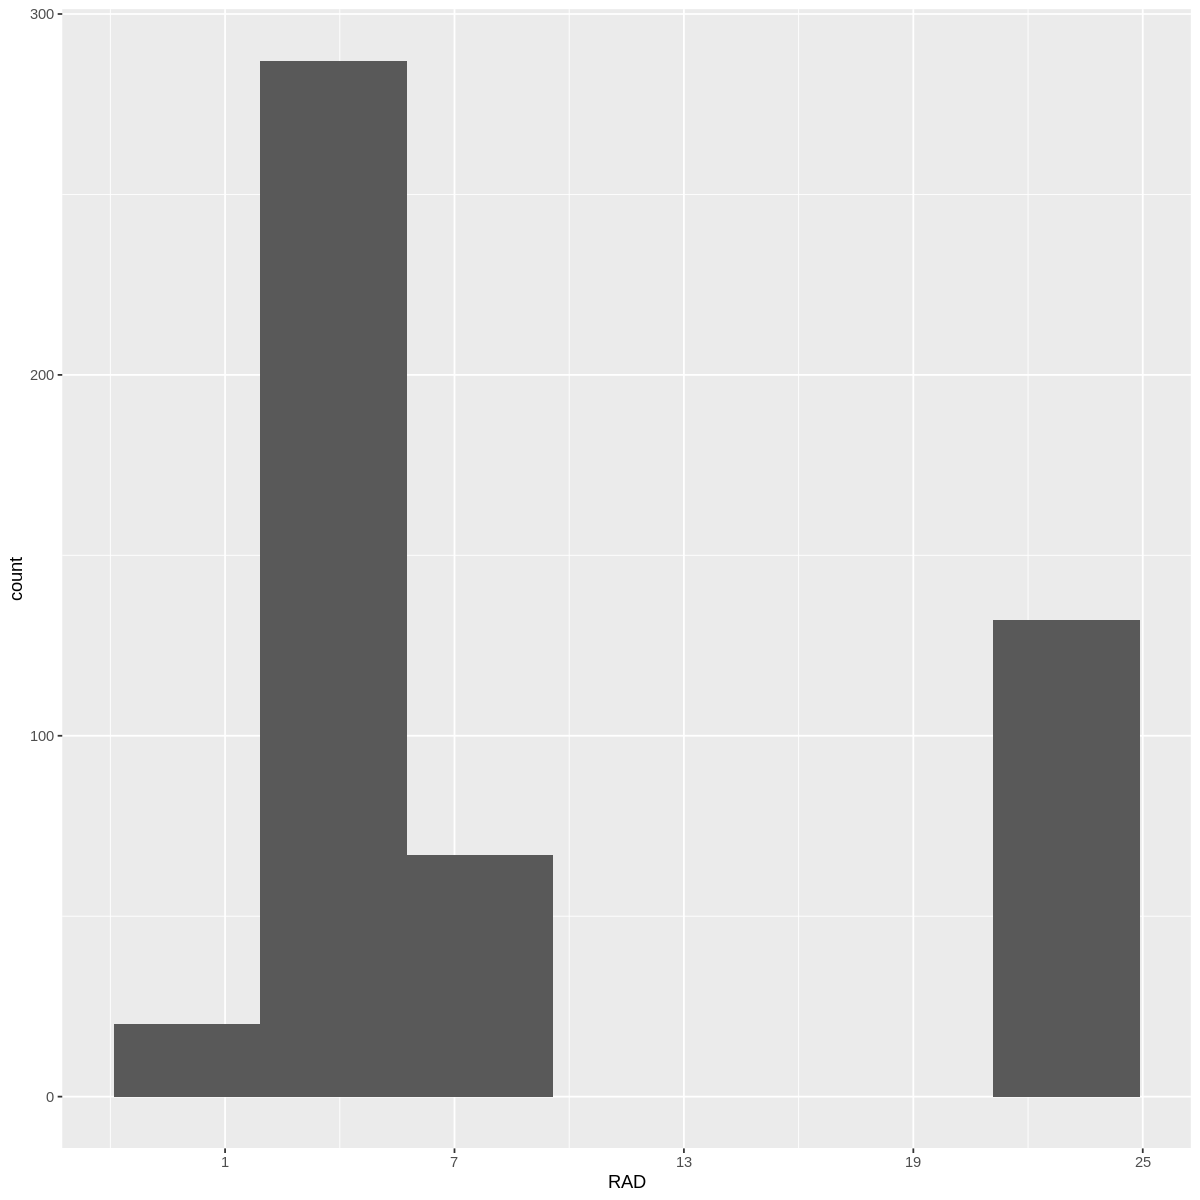

In [ ]:
#RAD
freqRAD <- table(bostonDataset$RAD)
barplot(freqRAD,xlab="RAD",ylab="conteo", main="FRECUENCIAS RAD",col=rgb(0.43,0.5,0.56))
#Histograma RAD
#hist(bostonDataset$RAD, main = "Histograma RAD", xlab="Valores RAD")
uniqueValuesRAD <- length(unique(bostonDataset$RAD))
maxValueRAD <- max(bostonDataset$RAD)
minValueRAD <- min(bostonDataset$RAD)
intervalNumberRAD <- round(1 + (3.322 * log10(uniqueValuesRAD)))
lengthIntervalRAD <- round((maxValueRAD-minValueRAD)/intervalNumberRAD)
xRAD <- seq(from = minValueRAD-lengthIntervalRAD, to = maxValueRAD+lengthIntervalRAD, by = lengthIntervalRAD)
#ggplot(data = bostonDataset)+ geom_histogram(mapping = aes(x = RAD), bins = uniqueValuesRAD, binwidth = 0.1) + scale_x_continuous(limit = c(minValueRAD, maxValueRAD), breaks = xRAD) + scale_y_continuous(limit = c(0, 10), breaks = yRAD)
plotRAD1 <- ggplot(data = bostonDataset)+ geom_histogram(mapping = aes(x = RAD), bins = length(xRAD) * 1.2) + scale_x_continuous(breaks=xRAD)
plotRAD1

[1] "Outliers RAD"
numeric(0)


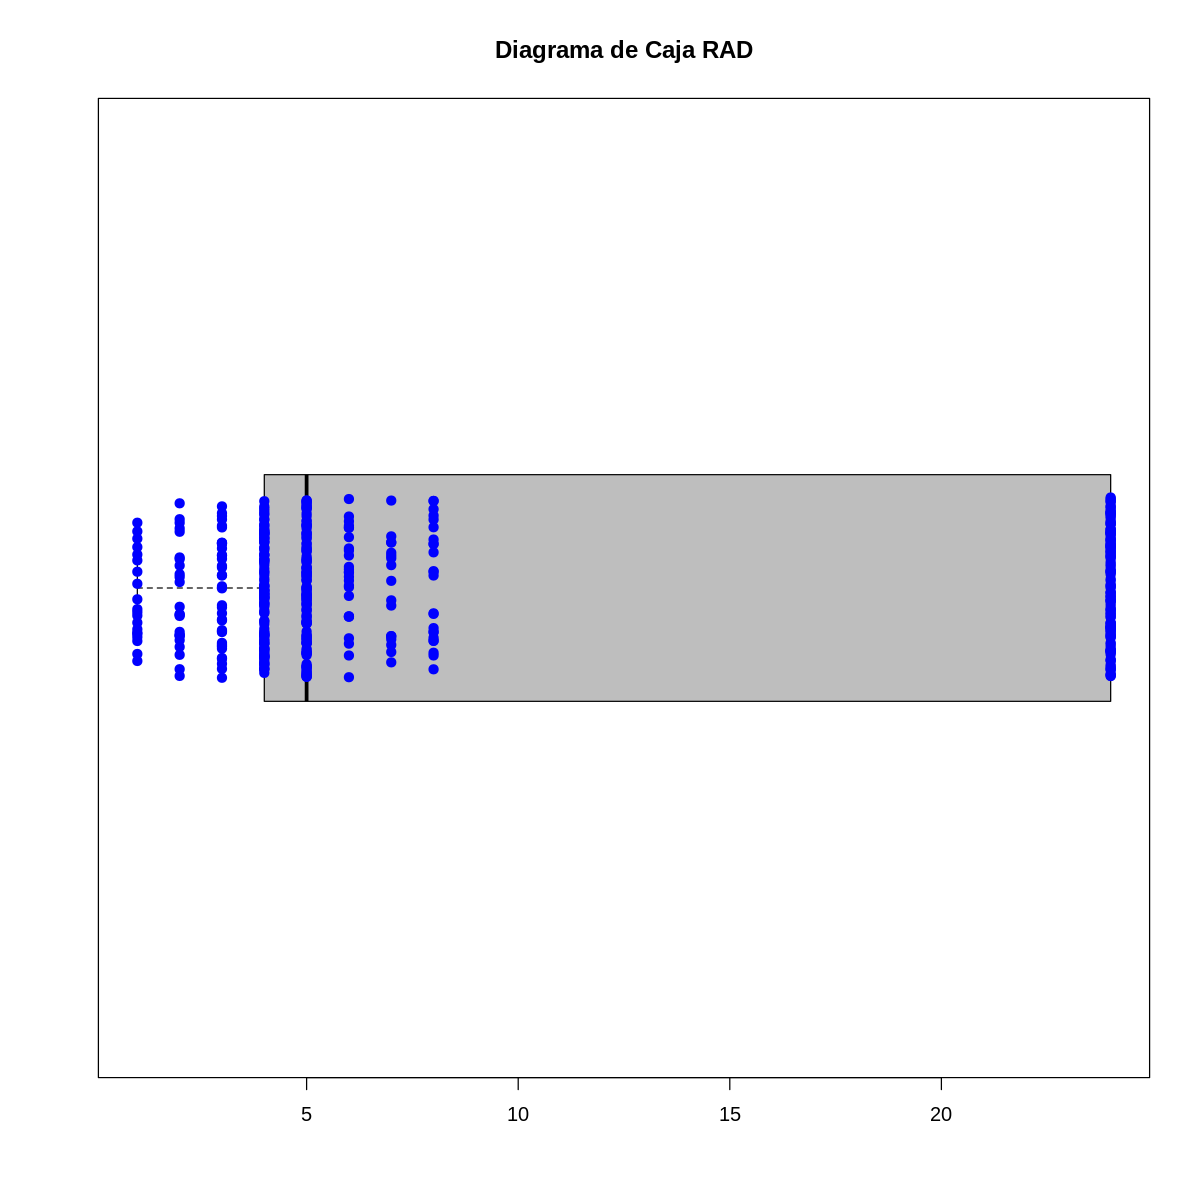

In [ ]:
outliersRAD<-boxplot(bostonDataset$RAD, main = "Diagrama de Caja RAD", boxwex = 0.5,col="gray", horizontal = TRUE)$out
print('Outliers RAD')
print(sort(outliersRAD, decreasing = FALSE))
stripchart(bostonDataset$RAD, method = "jitter", pch = 19, add = TRUE, col = "blue")

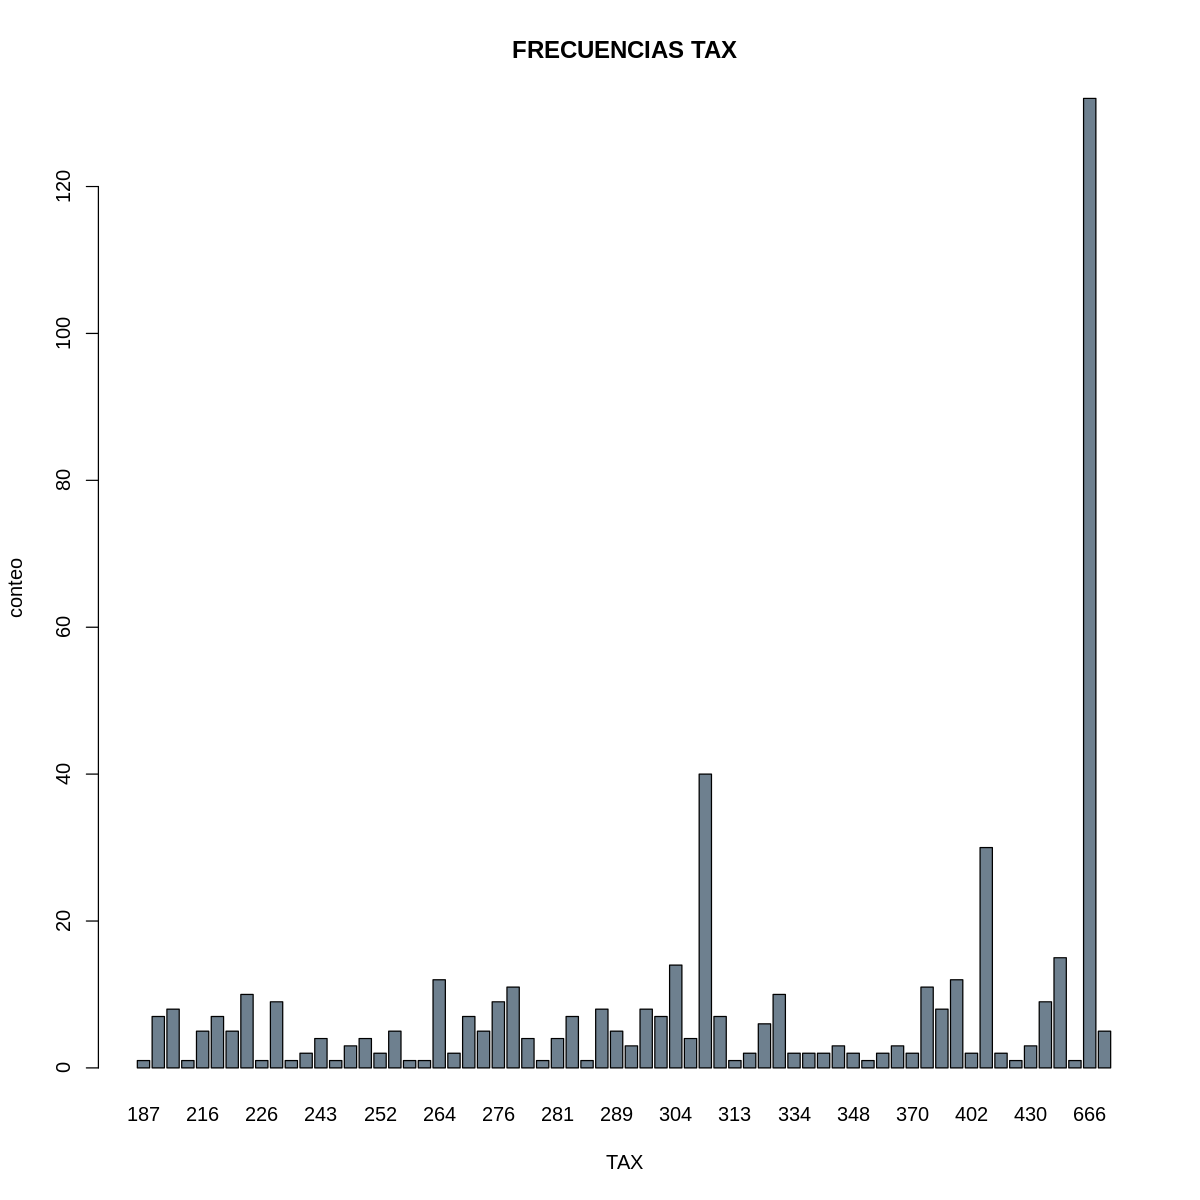

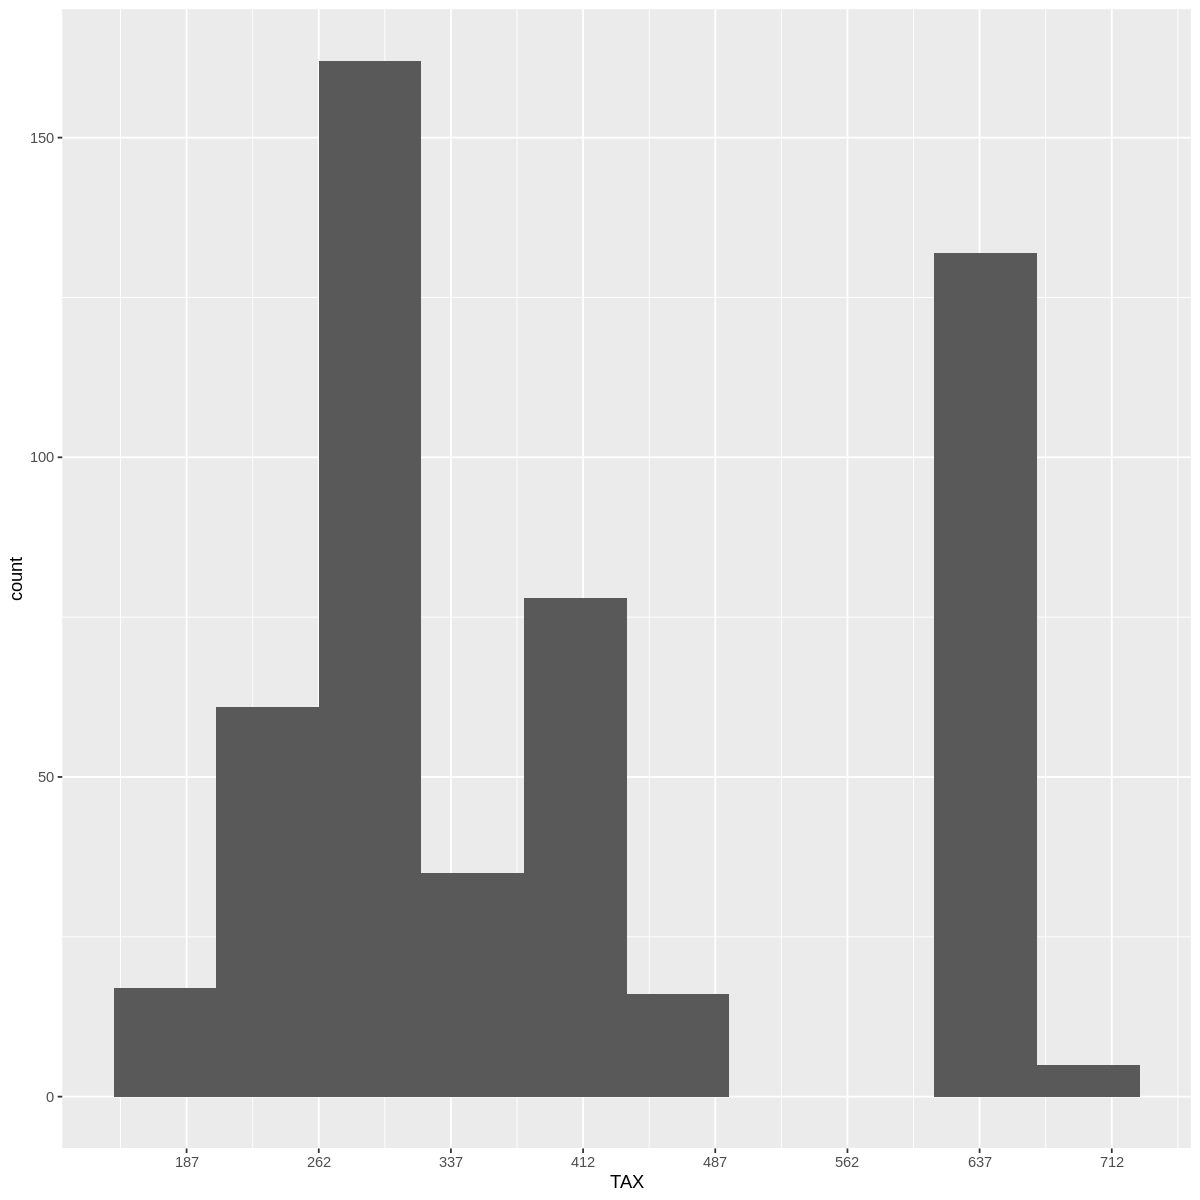

In [ ]:
#TAX
freqTAX <- table(bostonDataset$TAX)
barplot(freqTAX,xlab="TAX",ylab="conteo", main="FRECUENCIAS TAX",col=rgb(0.43,0.5,0.56))
#Histograma TAX
#hist(bostonDataset$TAX, main = "Histograma TAX", xlab="Valores TAX")
uniqueValuesTAX <- length(unique(bostonDataset$TAX))
maxValueTAX <- max(bostonDataset$TAX)
minValueTAX <- min(bostonDataset$TAX)
intervalNumberTAX <- round(1 + (3.322 * log10(uniqueValuesTAX)))
lengthIntervalTAX <- round((maxValueTAX-minValueTAX)/intervalNumberTAX)
xTAX <- seq(from = minValueTAX-lengthIntervalTAX, to = maxValueTAX+lengthIntervalTAX, by = lengthIntervalTAX)
#ggplot(data = bostonDataset)+ geom_histogram(mapping = aes(x = TAX), bins = uniqueValuesTAX, binwidth = 0.1) + scale_x_continuous(limit = c(minValueTAX, maxValueTAX), breaks = xTAX) + scale_y_continuous(limit = c(0, 10), breaks = yTAX)
plotTAX1 <- ggplot(data = bostonDataset)+ geom_histogram(mapping = aes(x = TAX), bins = length(xTAX) * 1.2) + scale_x_continuous(breaks=xTAX)
plotTAX1

[1] "Outliers TAX"
numeric(0)


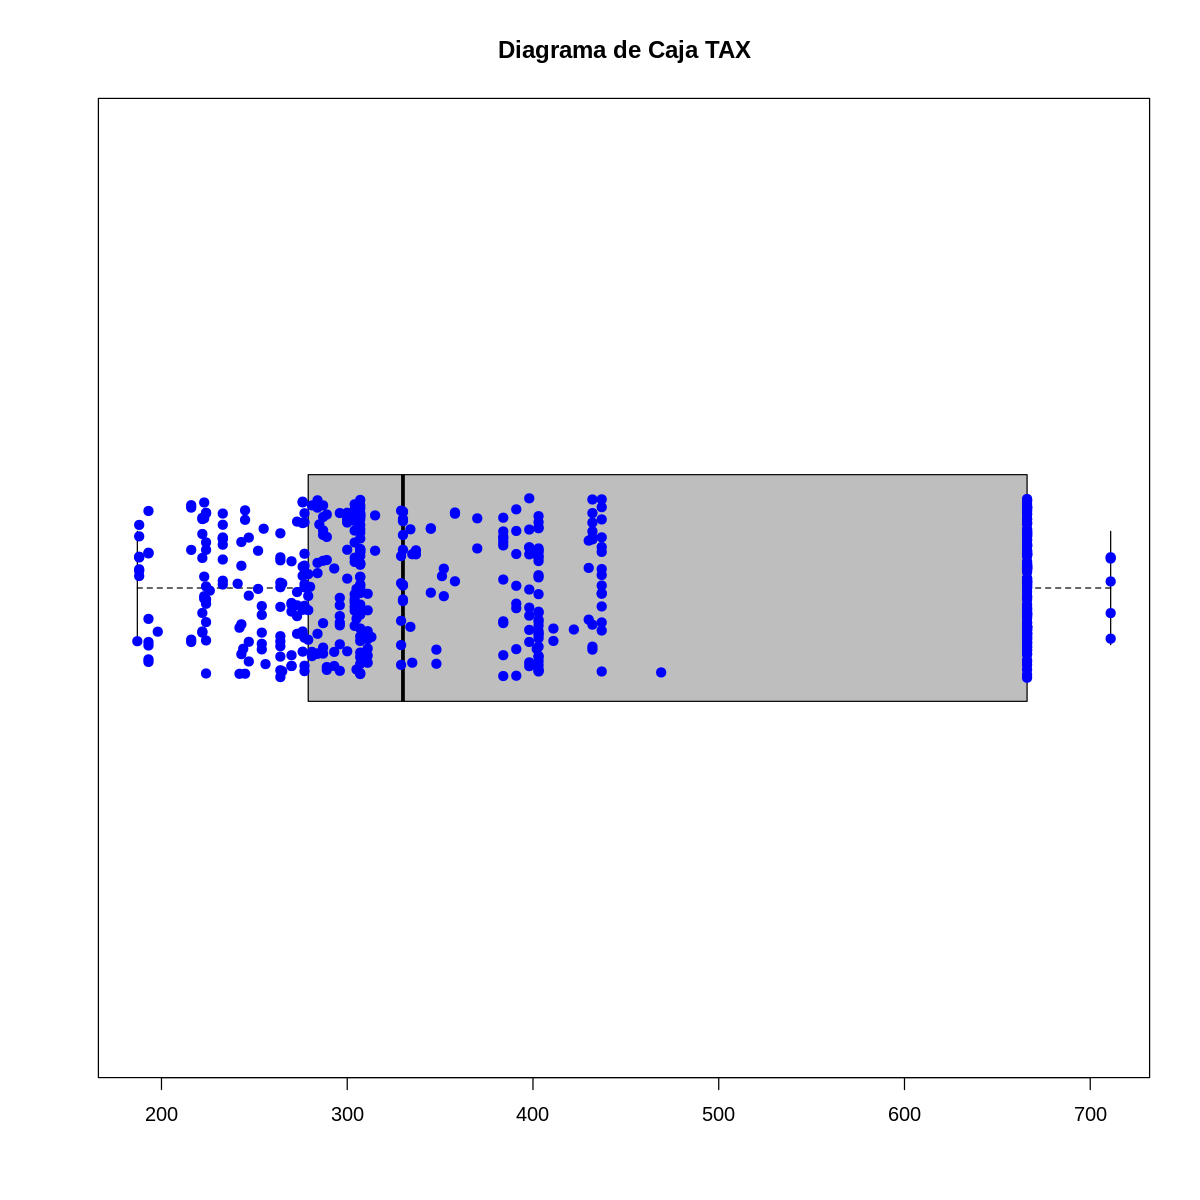

In [ ]:
outliersTAX<-boxplot(bostonDataset$TAX, main = "Diagrama de Caja TAX", boxwex = 0.5,col="gray", horizontal = TRUE)$out
print('Outliers TAX')
print(sort(outliersTAX, decreasing = FALSE))
stripchart(bostonDataset$TAX, method = "jitter", pch = 19, add = TRUE, col = "blue")

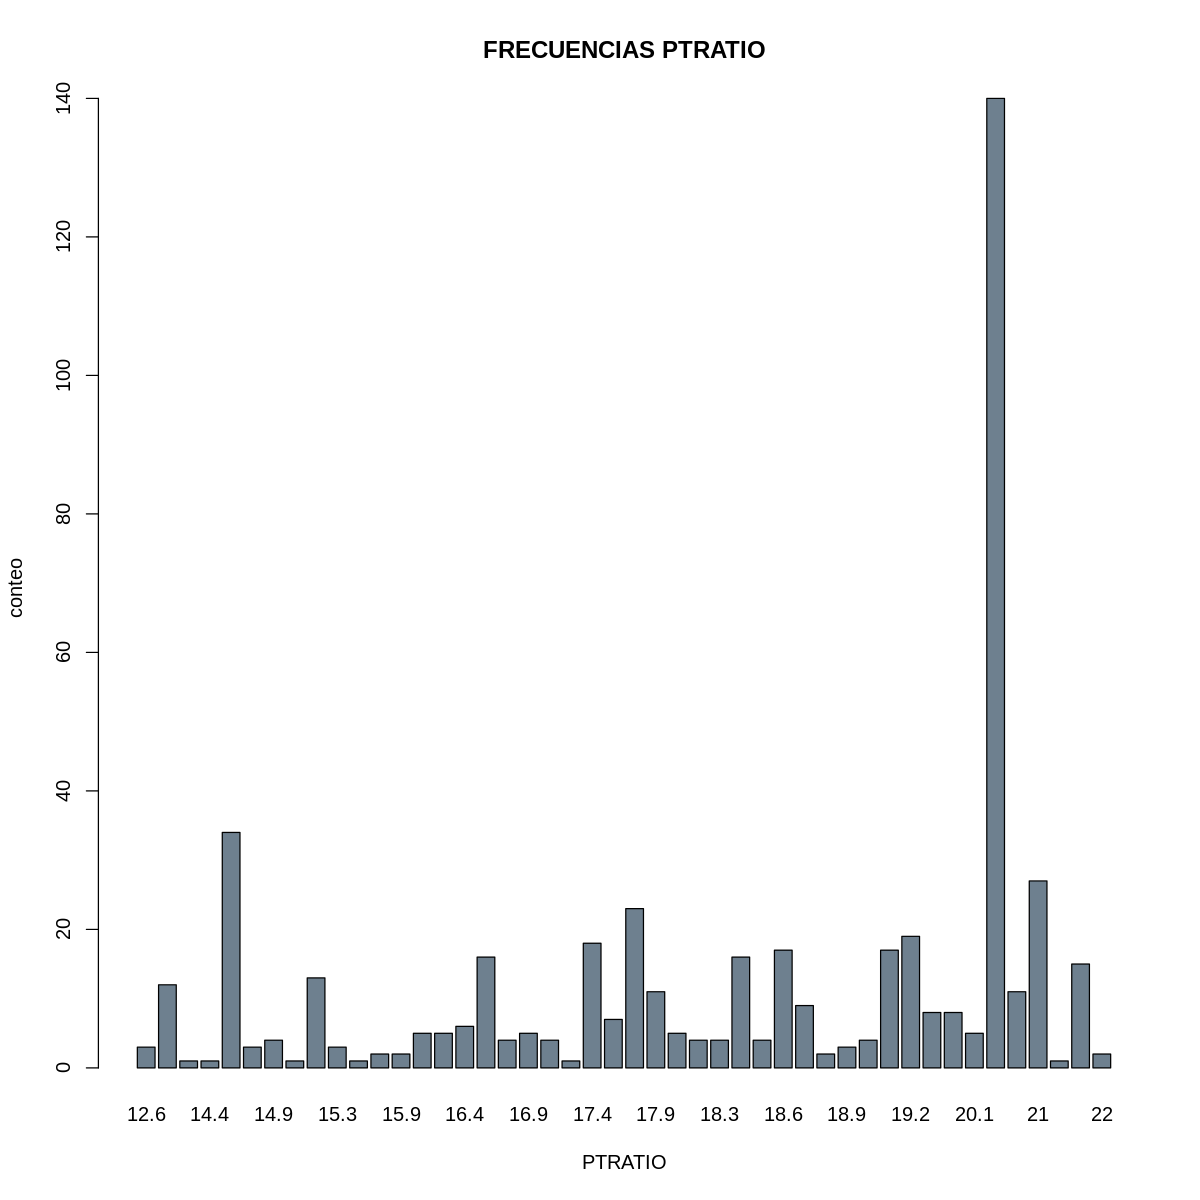

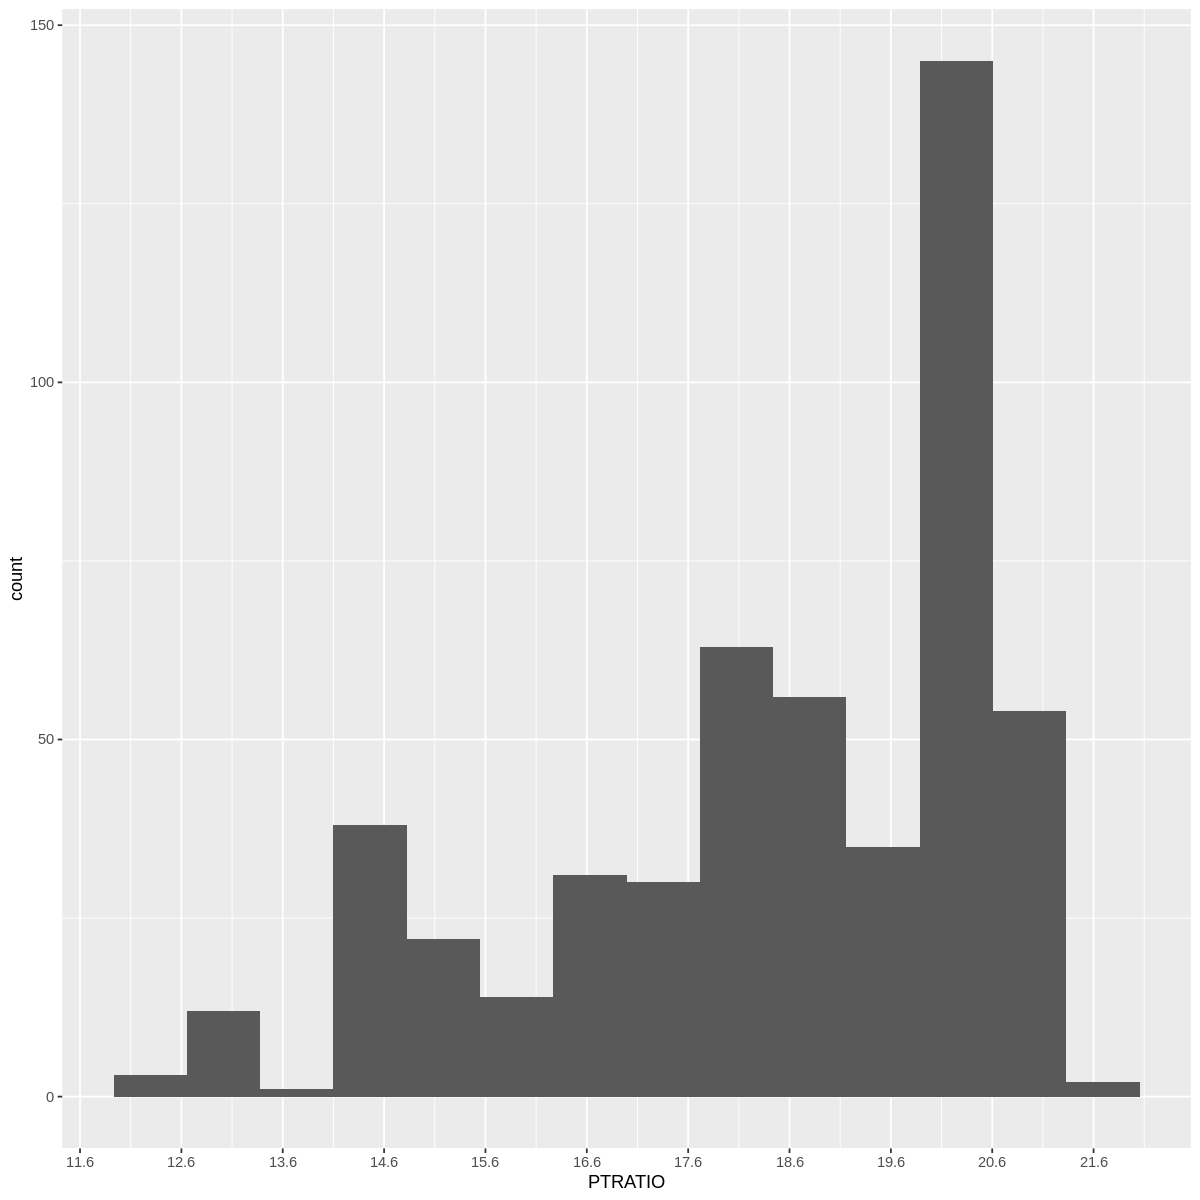

In [ ]:
#PTRATIO
freqPTRATIO <- table(bostonDataset$PTRATIO)
barplot(freqPTRATIO,xlab="PTRATIO",ylab="conteo", main="FRECUENCIAS PTRATIO",col=rgb(0.43,0.5,0.56))
#Histograma PTRATIO
#hist(bostonDataset$PTRATIO, main = "Histograma PTRATIO", xlab="Valores PTRATIO")
uniqueValuesPTRATIO <- length(unique(bostonDataset$PTRATIO))
maxValuePTRATIO <- max(bostonDataset$PTRATIO)
minValuePTRATIO <- min(bostonDataset$PTRATIO)
intervalNumberPTRATIO <- round(1 + (3.322 * log10(uniqueValuesPTRATIO)))
lengthIntervalPTRATIO <- round((maxValuePTRATIO-minValuePTRATIO)/intervalNumberPTRATIO)
xPTRATIO <- seq(from = minValuePTRATIO-lengthIntervalPTRATIO, to = maxValuePTRATIO+lengthIntervalPTRATIO, by = lengthIntervalPTRATIO)
#ggplot(data = bostonDataset)+ geom_histogram(mapping = aes(x = PTRATIO), bins = uniqueValuesPTRATIO, binwidth = 0.1) + scale_x_continuous(limit = c(minValuePTRATIO, maxValuePTRATIO), breaks = xPTRATIO) + scale_y_continuous(limit = c(0, 10), breaks = yPTRATIO)
plotPTRATIO1 <- ggplot(data = bostonDataset)+ geom_histogram(mapping = aes(x = PTRATIO), bins = length(xPTRATIO) * 1.2) + scale_x_continuous(breaks=xPTRATIO)
plotPTRATIO1

[1] "Outliers PTRATIO"
 [1] 12.6 12.6 12.6 13.0 13.0 13.0 13.0 13.0 13.0 13.0 13.0 13.0 13.0 13.0 13.0


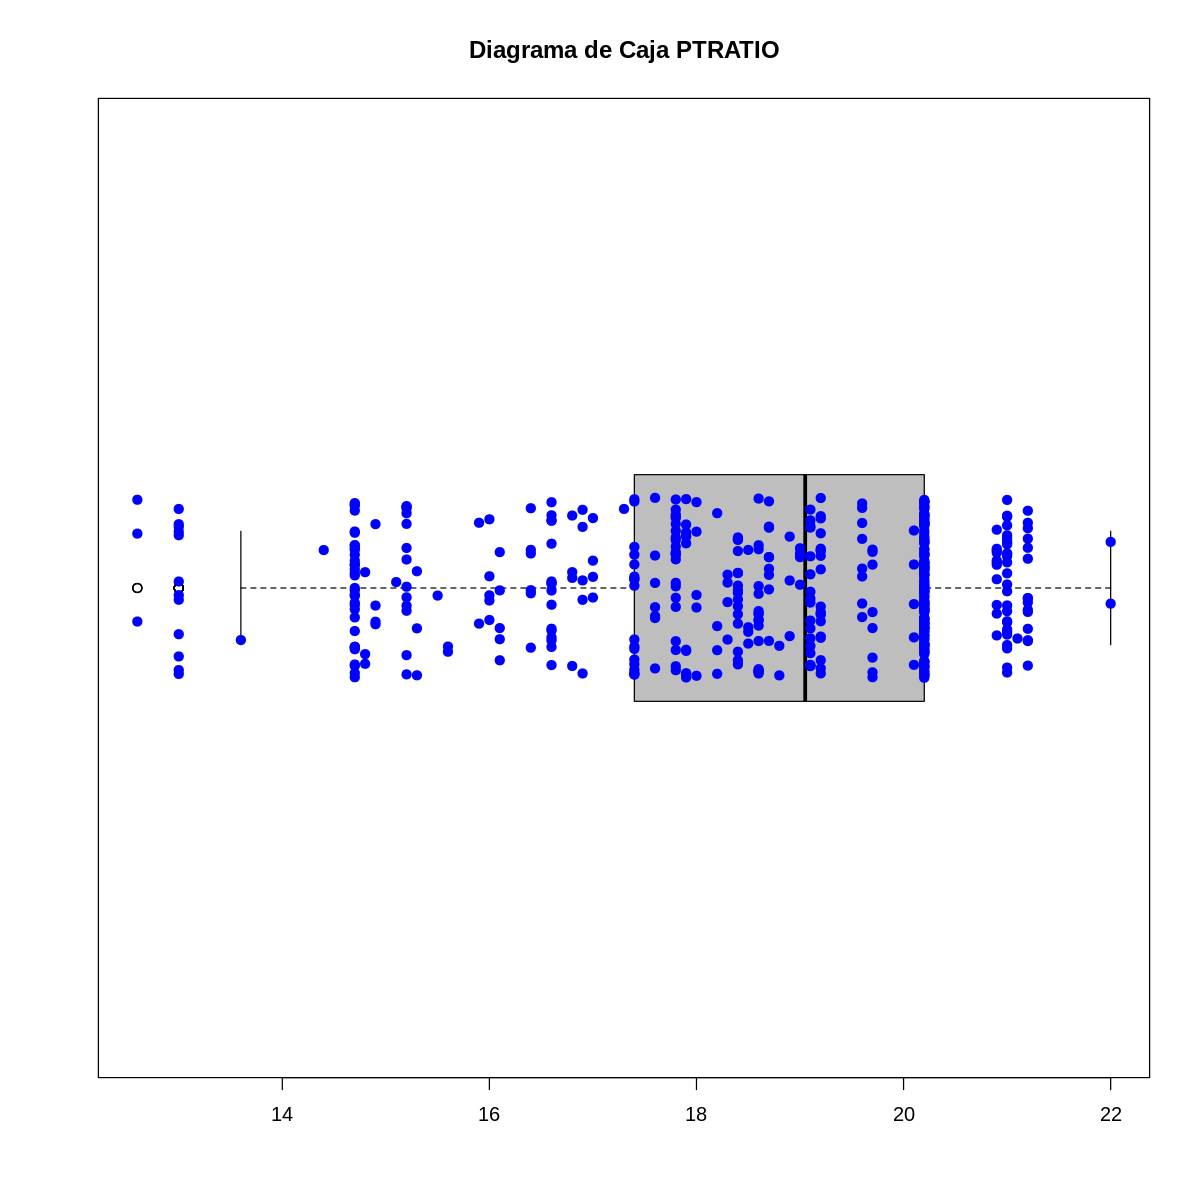

In [ ]:
outliersPTRATIO <- boxplot(bostonDataset$PTRATIO, main = "Diagrama de Caja PTRATIO", boxwex = 0.5,col="gray", horizontal = TRUE)$out
print('Outliers PTRATIO')
print(sort(outliersPTRATIO, decreasing = FALSE))
stripchart(bostonDataset$PTRATIO, method = "jitter", pch = 19, add = TRUE, col = "blue")

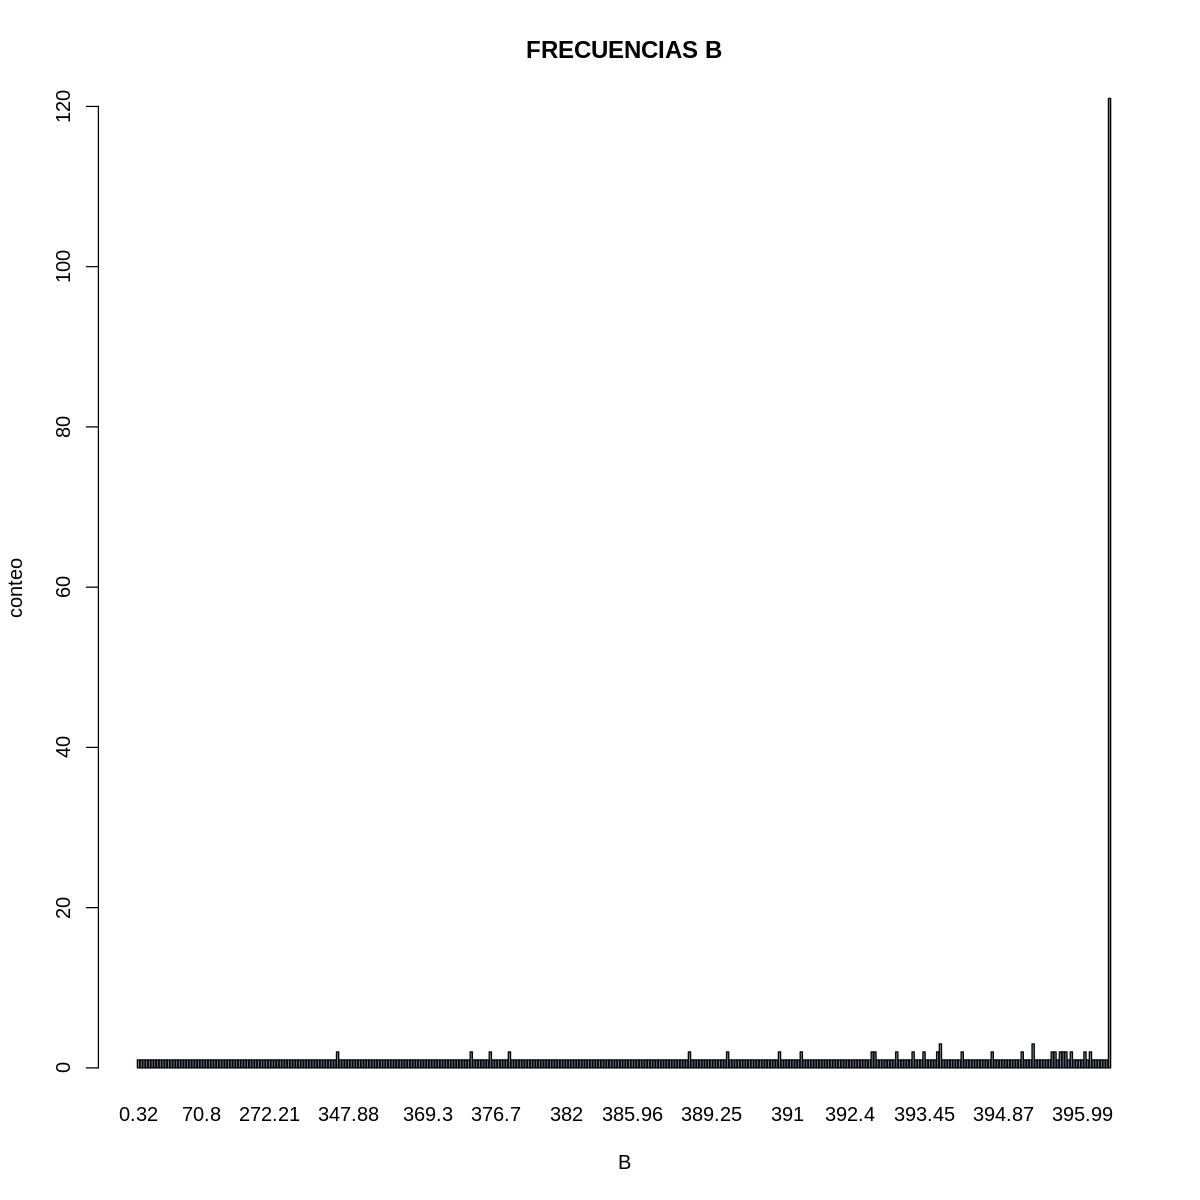

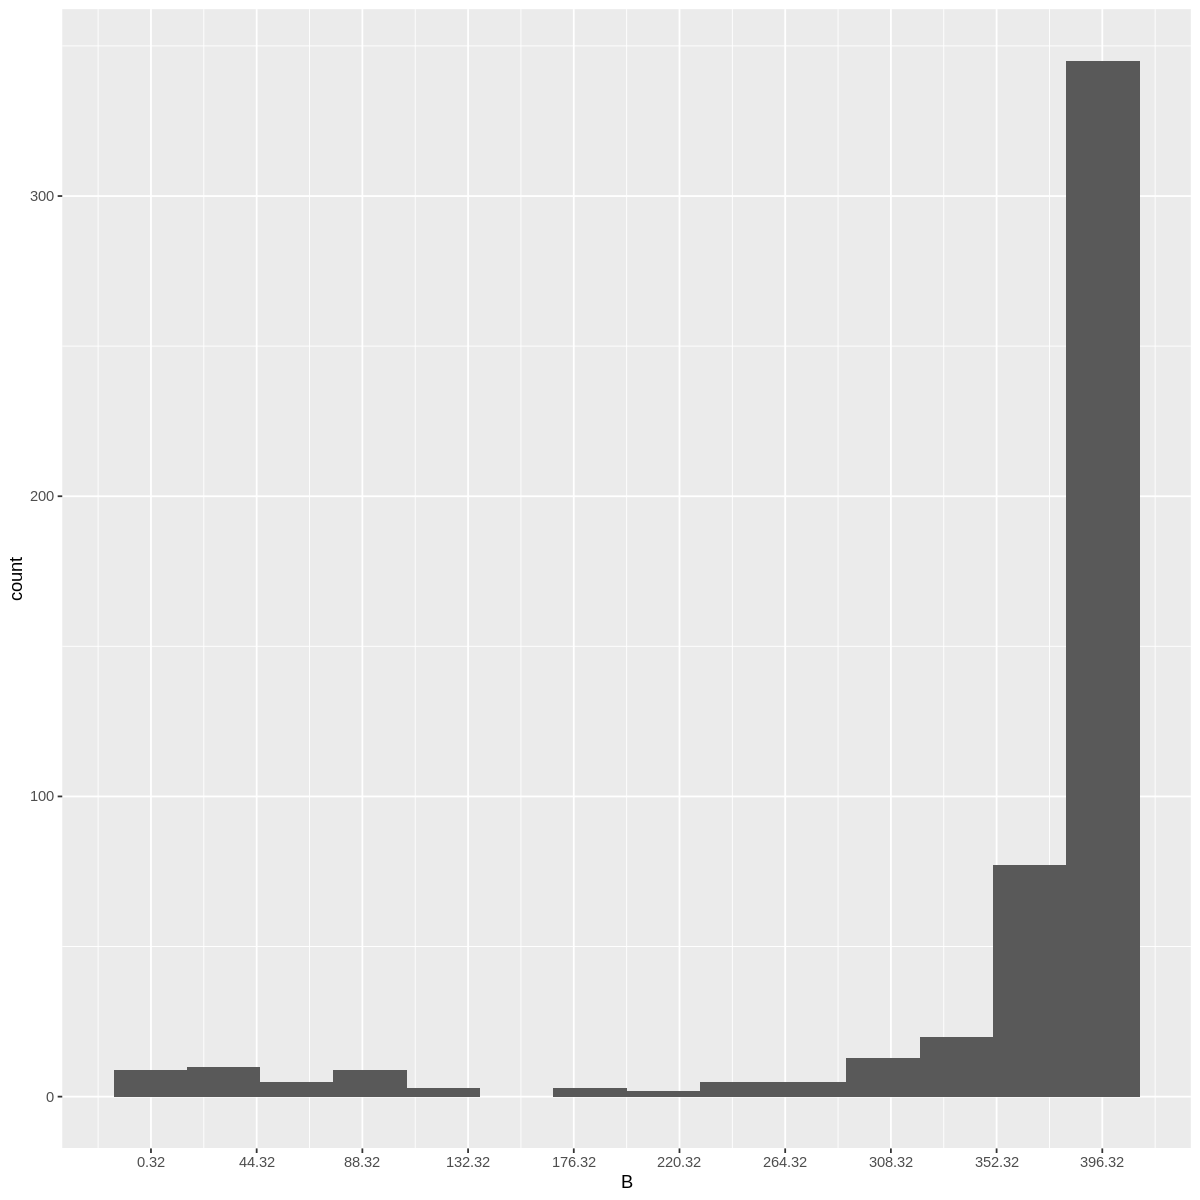

In [ ]:
#B
freqB <- table(bostonDataset$B)
barplot(freqB,xlab="B",ylab="conteo", main="FRECUENCIAS B",col=rgb(0.43,0.5,0.56))
#Histograma B
#hist(bostonDataset$B, main = "Histograma B", xlab="Valores B")
uniqueValuesB <- length(unique(bostonDataset$B))
maxValueB <- max(bostonDataset$B)
minValueB <- min(bostonDataset$B)
intervalNumberB <- round(1 + (3.322 * log10(uniqueValuesB)))
lengthIntervalB <- round((maxValueB-minValueB)/intervalNumberB)
xB <- seq(from = minValueB-lengthIntervalB, to = maxValueB+lengthIntervalB, by = lengthIntervalB)
#ggplot(data = bostonDataset)+ geom_histogram(mapping = aes(x = B), bins = uniqueValuesB, binwidth = 0.1) + scale_x_continuous(limit = c(minValueB, maxValueB), breaks = xB) + scale_y_continuous(limit = c(0, 10), breaks = yB)
plotB1 <- ggplot(data = bostonDataset)+ geom_histogram(mapping = aes(x = B), bins = length(xB) * 1.2) + scale_x_continuous(breaks=xB)
plotB1

[1] "Outliers B"
 [1]   0.32   2.52   2.60   3.50   3.65   6.68   7.68   9.32  10.48  16.45
[11]  18.82  21.57  22.01  24.65  27.25  27.49  28.79  35.05  43.06  48.45
[21]  50.92  60.72  68.95  70.80  81.33  83.45  88.01  88.27  88.63  96.73
[31]  97.95 100.19 100.63 109.85 127.36 131.42 169.27 172.91 179.36 210.97
[41] 227.61 232.60 240.16 240.52 248.31 255.23 261.95 262.76 272.21 285.83
[51] 288.99 291.55 292.29 297.09 302.76 303.42 304.21 306.38 314.64 316.03
[61] 318.01 318.43 318.75 319.98 321.02 329.46 330.04 331.29 332.09 334.40
[71] 338.16 338.63 338.92 341.60 341.60 343.28


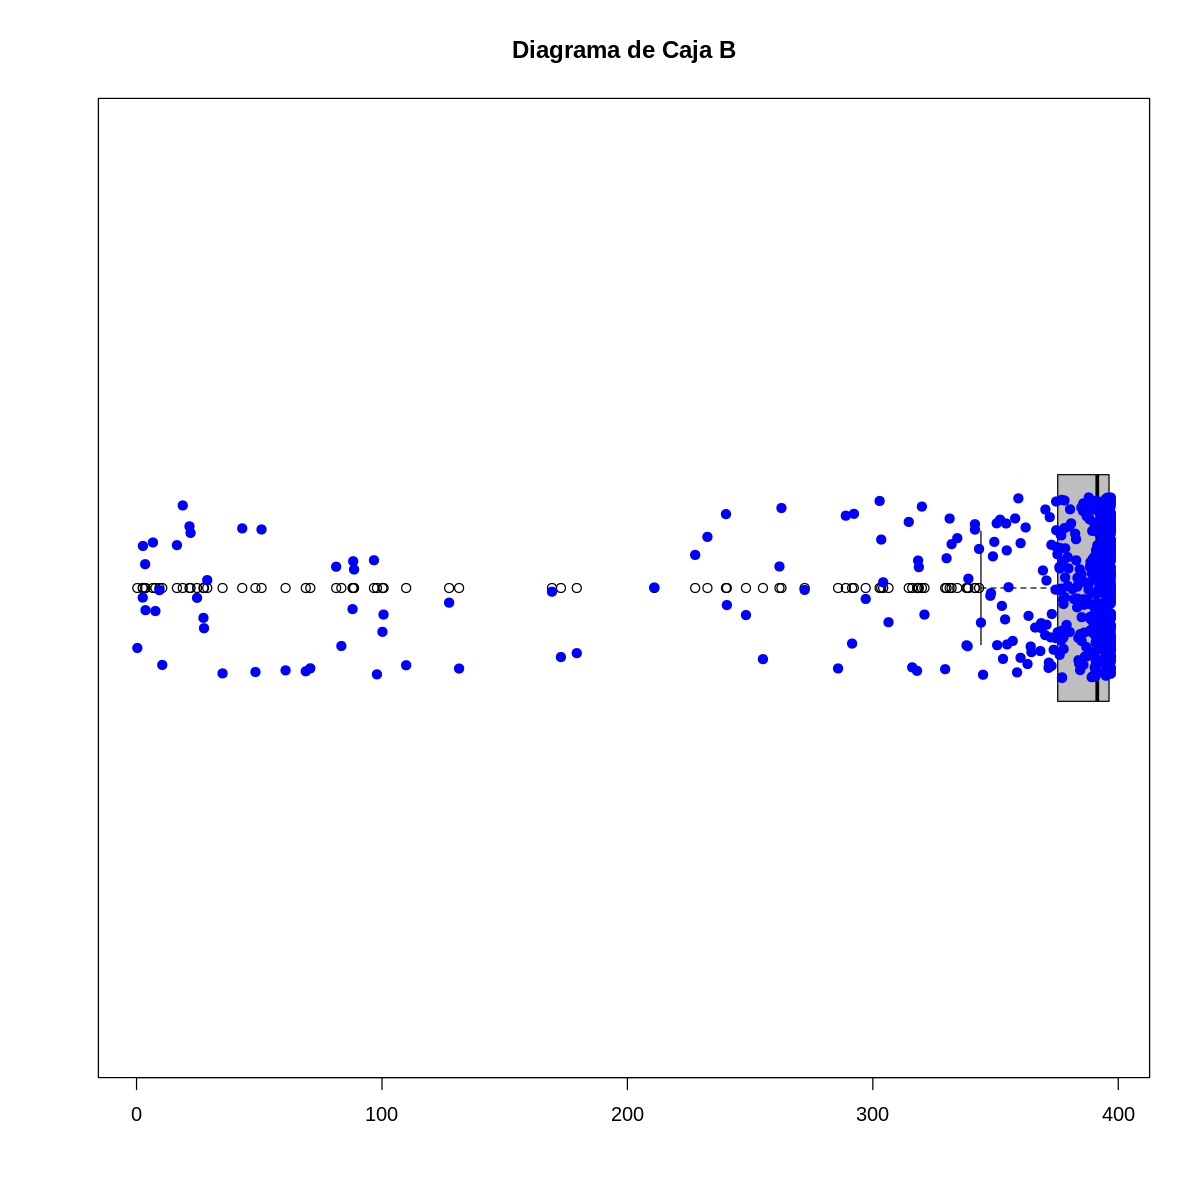

In [ ]:
outliersB<-boxplot(bostonDataset$B, main = "Diagrama de Caja B", boxwex = 0.5,col="gray", horizontal = TRUE)$out
print('Outliers B')
print(sort(outliersB, decreasing = FALSE))
stripchart(bostonDataset$B, method = "jitter", pch = 19, add = TRUE, col = "blue")

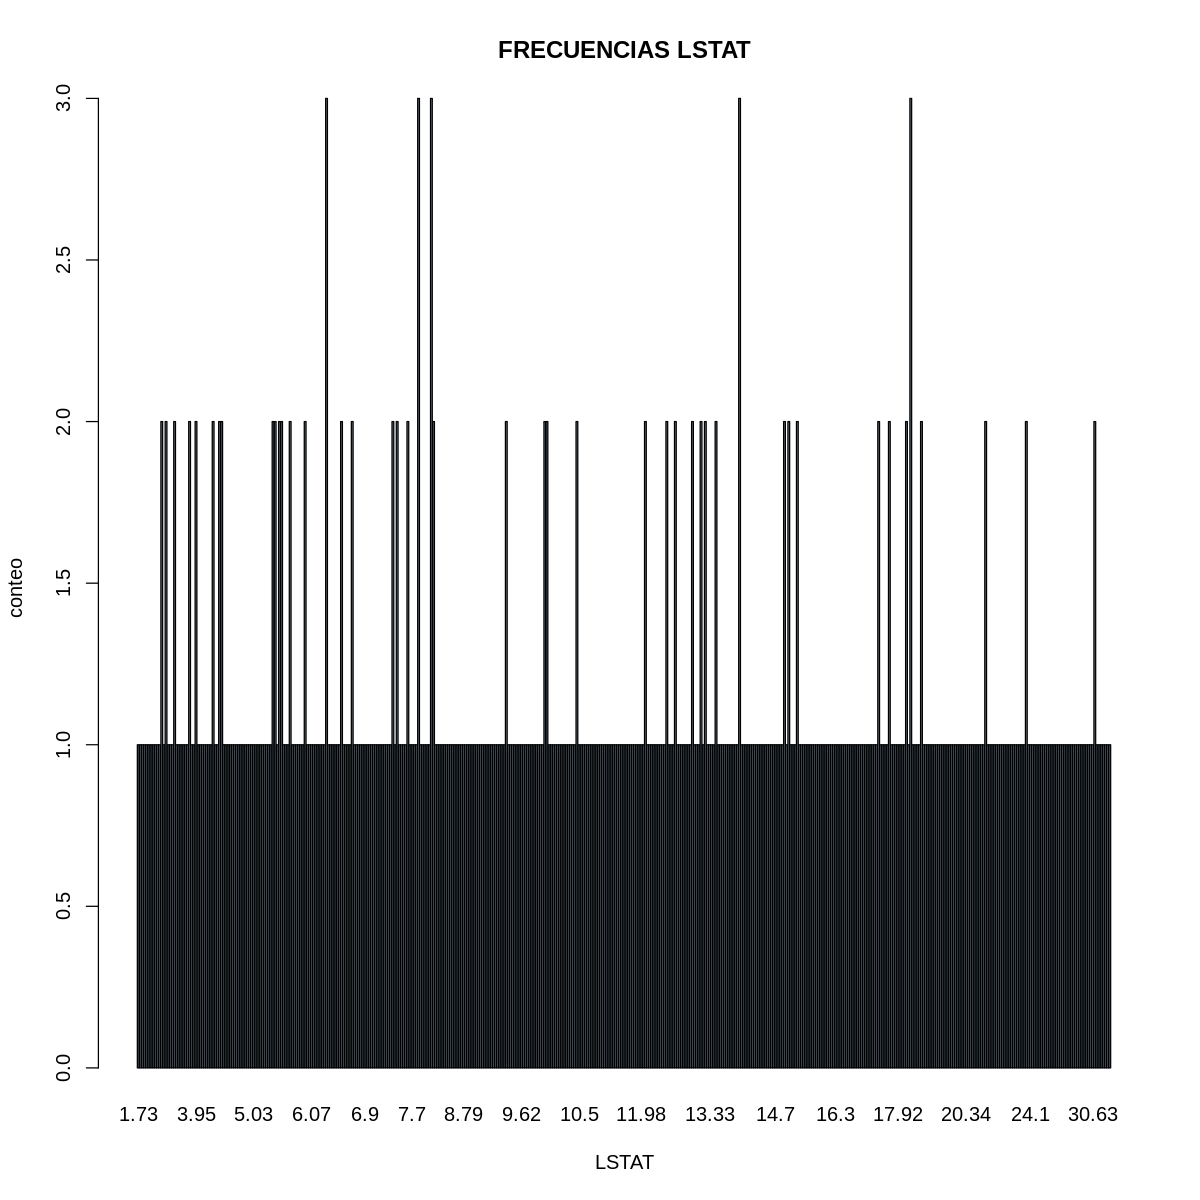

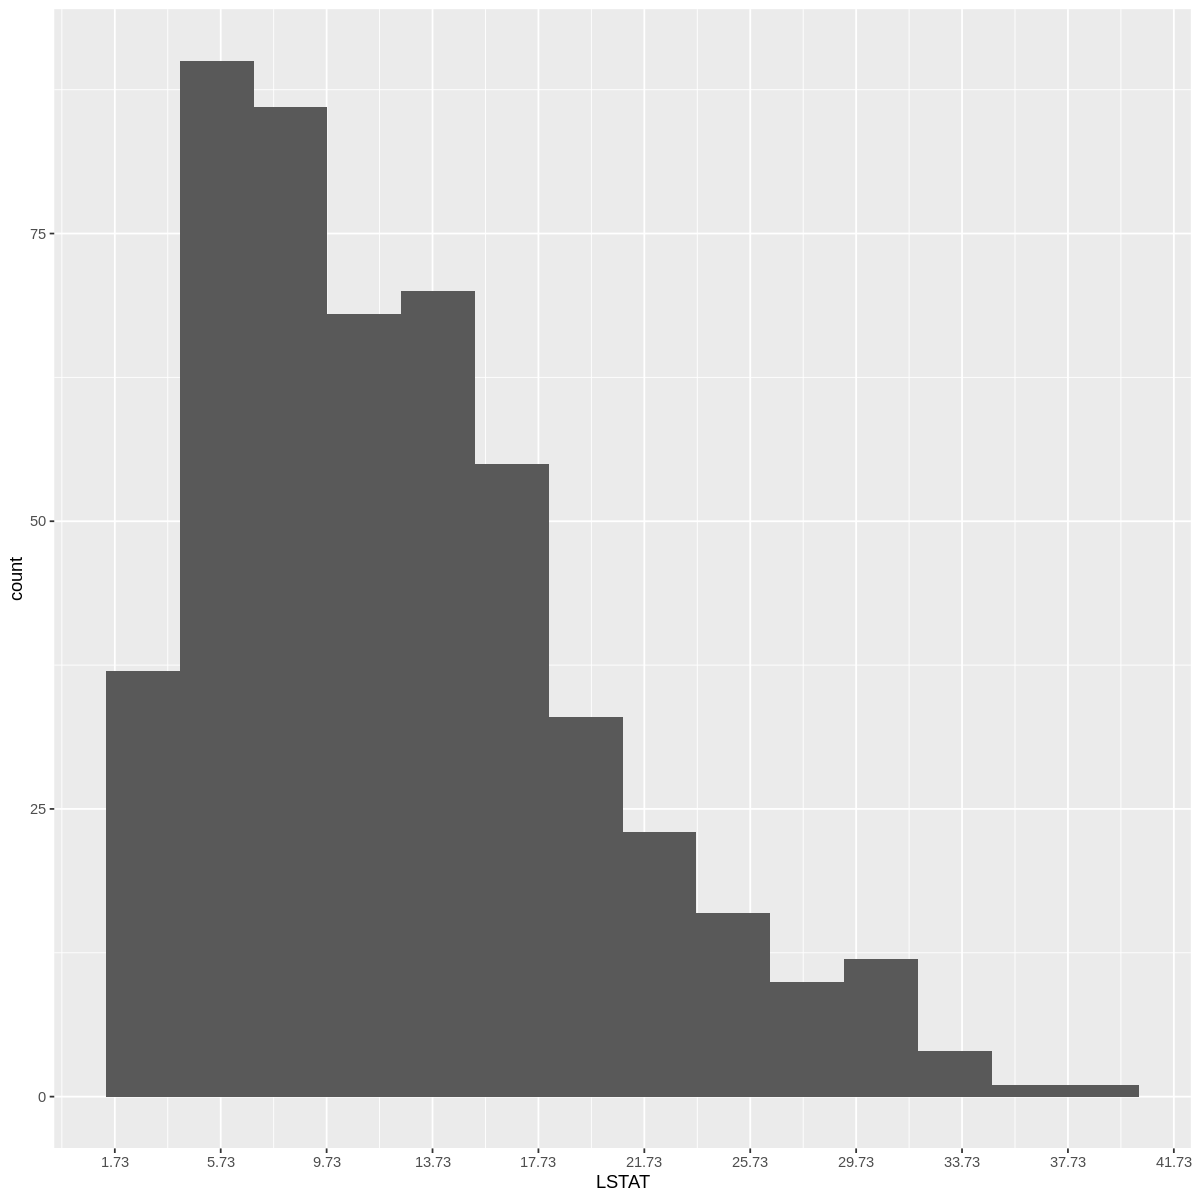

In [ ]:
#LSTAT
freqLSTAT <- table(bostonDataset$LSTAT)
barplot(freqLSTAT,xlab="LSTAT",ylab="conteo", main="FRECUENCIAS LSTAT",col=rgb(0.43,0.5,0.56))
#Histograma LSTAT
#hist(bostonDataset$LSTAT, main = "Histograma LSTAT", xlab="Valores LSTAT")
uniqueValuesLSTAT <- length(unique(bostonDataset$LSTAT))
maxValueLSTAT <- max(bostonDataset$LSTAT)
minValueLSTAT <- min(bostonDataset$LSTAT)
intervalNumberLSTAT <- round(1 + (3.322 * log10(uniqueValuesLSTAT)))
lengthIntervalLSTAT <- round((maxValueLSTAT-minValueLSTAT)/intervalNumberLSTAT)
xLSTAT <- seq(from = minValueLSTAT-lengthIntervalLSTAT, to = maxValueLSTAT+lengthIntervalLSTAT, by = lengthIntervalLSTAT)
#ggplot(data = bostonDataset)+ geom_histogram(mapping = aes(x = LSTAT), bins = uniqueValuesLSTAT, binwidth = 0.1) + scale_x_continuous(limit = c(minValueLSTAT, maxValueLSTAT), breaks = xLSTAT) + scale_y_continuous(limit = c(0, 10), breaks = yLSTAT)
plotLSTAT1 <- ggplot(data = bostonDataset)+ geom_histogram(mapping = aes(x = LSTAT), bins = length(xLSTAT) * 1.2) + scale_x_continuous(breaks=xLSTAT)
plotLSTAT1

[1] "Outliers LSTAT"
[1] 34.02 34.37 34.41 34.77 36.98 37.97


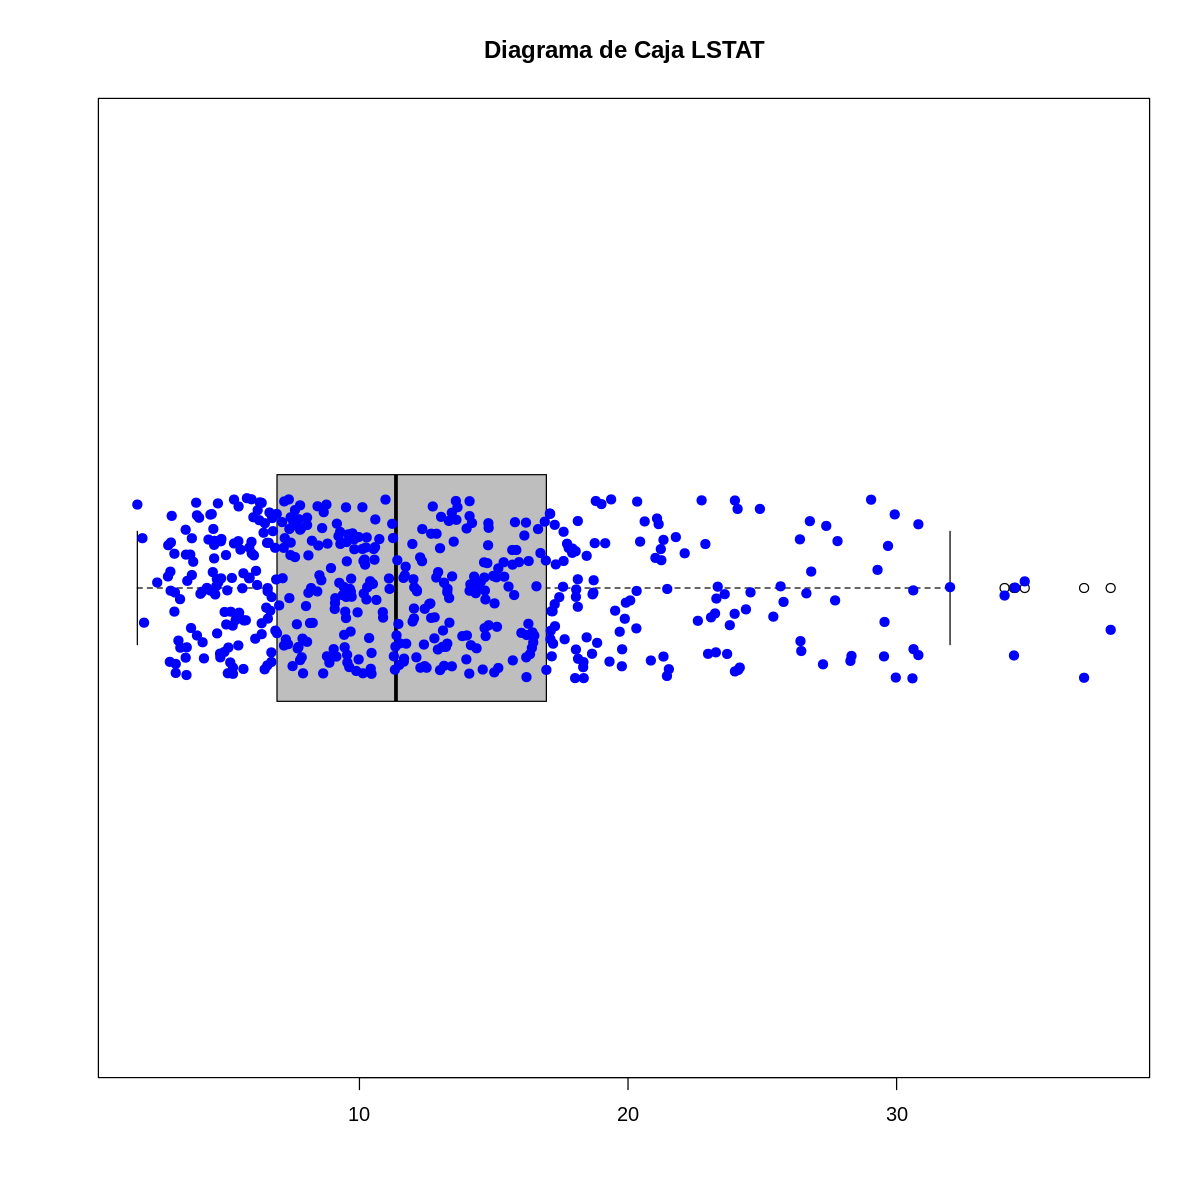

In [ ]:
outliersLSTAT<-boxplot(bostonDataset$LSTAT, main = "Diagrama de Caja LSTAT", boxwex = 0.5,col="gray", horizontal = TRUE)$out
print('Outliers LSTAT')
print(sort(outliersLSTAT, decreasing = FALSE))
stripchart(bostonDataset$LSTAT, method = "jitter", pch = 19, add = TRUE, col = "blue")

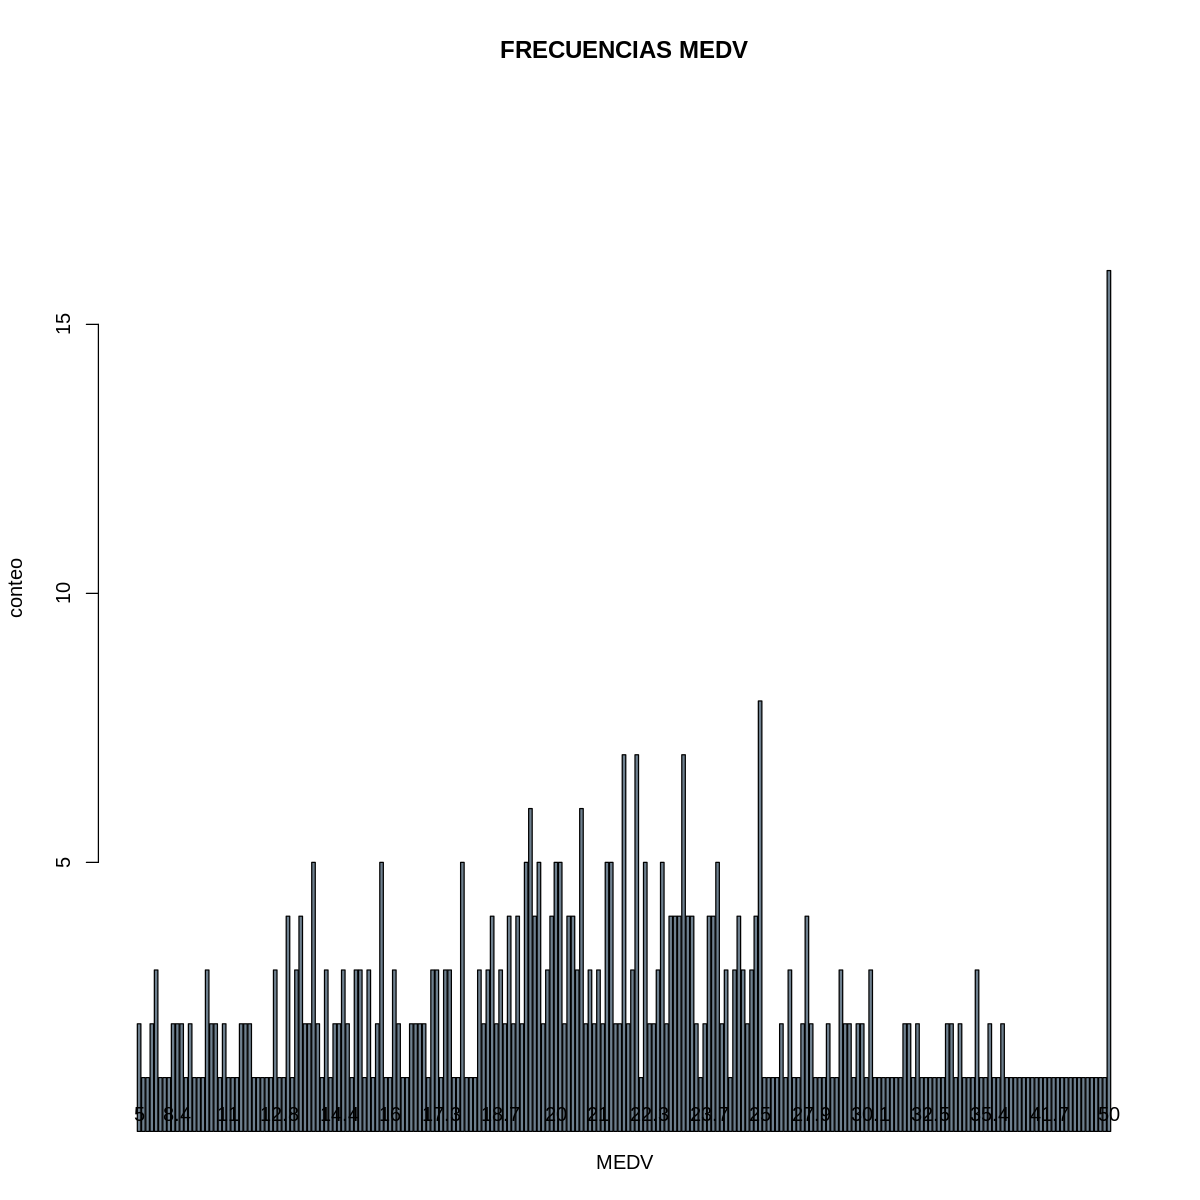

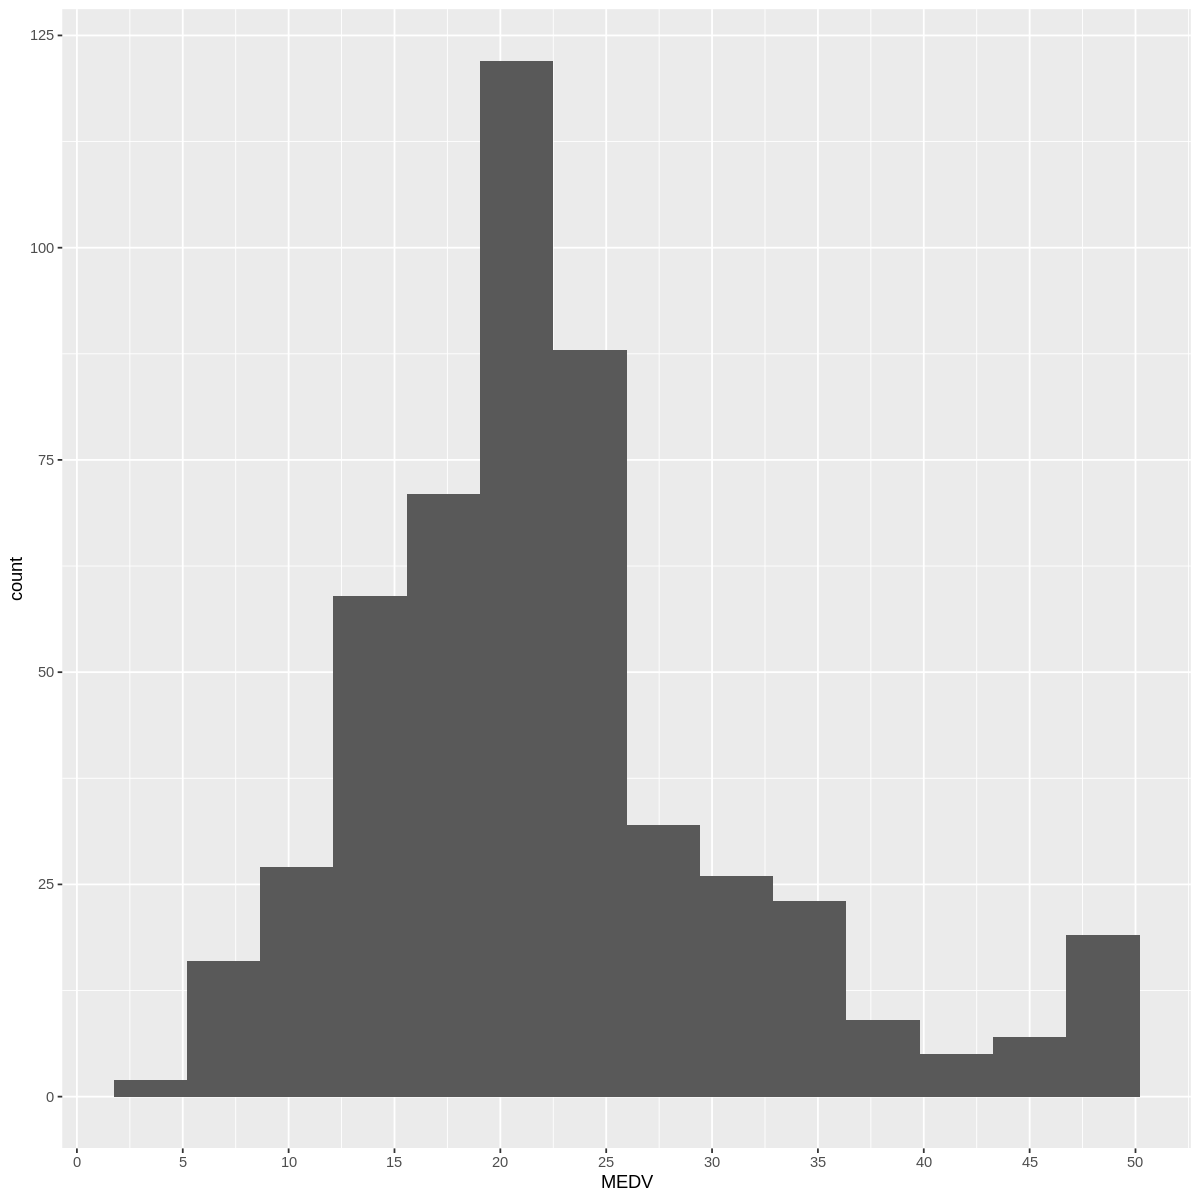

In [ ]:
#MEDV
freqMEDV <- table(bostonDataset$MEDV)
barplot(freqMEDV,ylim=c(min(freqMEDV),max(freqMEDV) + (max(freqMEDV)*0.2) ),xlab="MEDV",ylab="conteo", main="FRECUENCIAS MEDV",col=rgb(0.43,0.5,0.56))
#Histograma MEDV
#hist(bostonDataset$MEDV, main = "Histograma MEDV", xlab="Valores MEDV")
uniqueValuesMEDV <- length(unique(bostonDataset$MEDV))
maxValueMEDV <- max(bostonDataset$MEDV)
minValueMEDV <- min(bostonDataset$MEDV)
intervalNumberMEDV <- round(1 + (3.322 * log10(uniqueValuesMEDV)))
lengthIntervalMEDV <- round((maxValueMEDV-minValueMEDV)/intervalNumberMEDV)
xMEDV <- seq(from = minValueMEDV-lengthIntervalMEDV, to = maxValueMEDV+lengthIntervalMEDV, by = lengthIntervalMEDV)
#ggplot(data = bostonDataset)+ geom_histogram(mapping = aes(x = MEDV), bins = uniqueValuesMEDV, binwidth = 0.1) + scale_x_continuous(limit = c(minValueMEDV, maxValueMEDV), breaks = xMEDV) + scale_y_continuous(limit = c(0, 10), breaks = yMEDV)
plotMEDV1 <- ggplot(data = bostonDataset)+ geom_histogram(mapping = aes(x = MEDV), bins = length(xMEDV) * 1.2) + scale_x_continuous(breaks=xMEDV)
plotMEDV1

[1] "Outliers MEDV"
 [1] 37.2 37.3 37.6 37.9 38.7 39.8 41.3 41.7 42.3 42.8 43.1 43.5 43.8 44.0 44.8
[16] 45.4 46.0 46.7 48.3 48.5 48.8 50.0 50.0 50.0 50.0 50.0 50.0 50.0 50.0 50.0
[31] 50.0 50.0 50.0 50.0 50.0 50.0 50.0


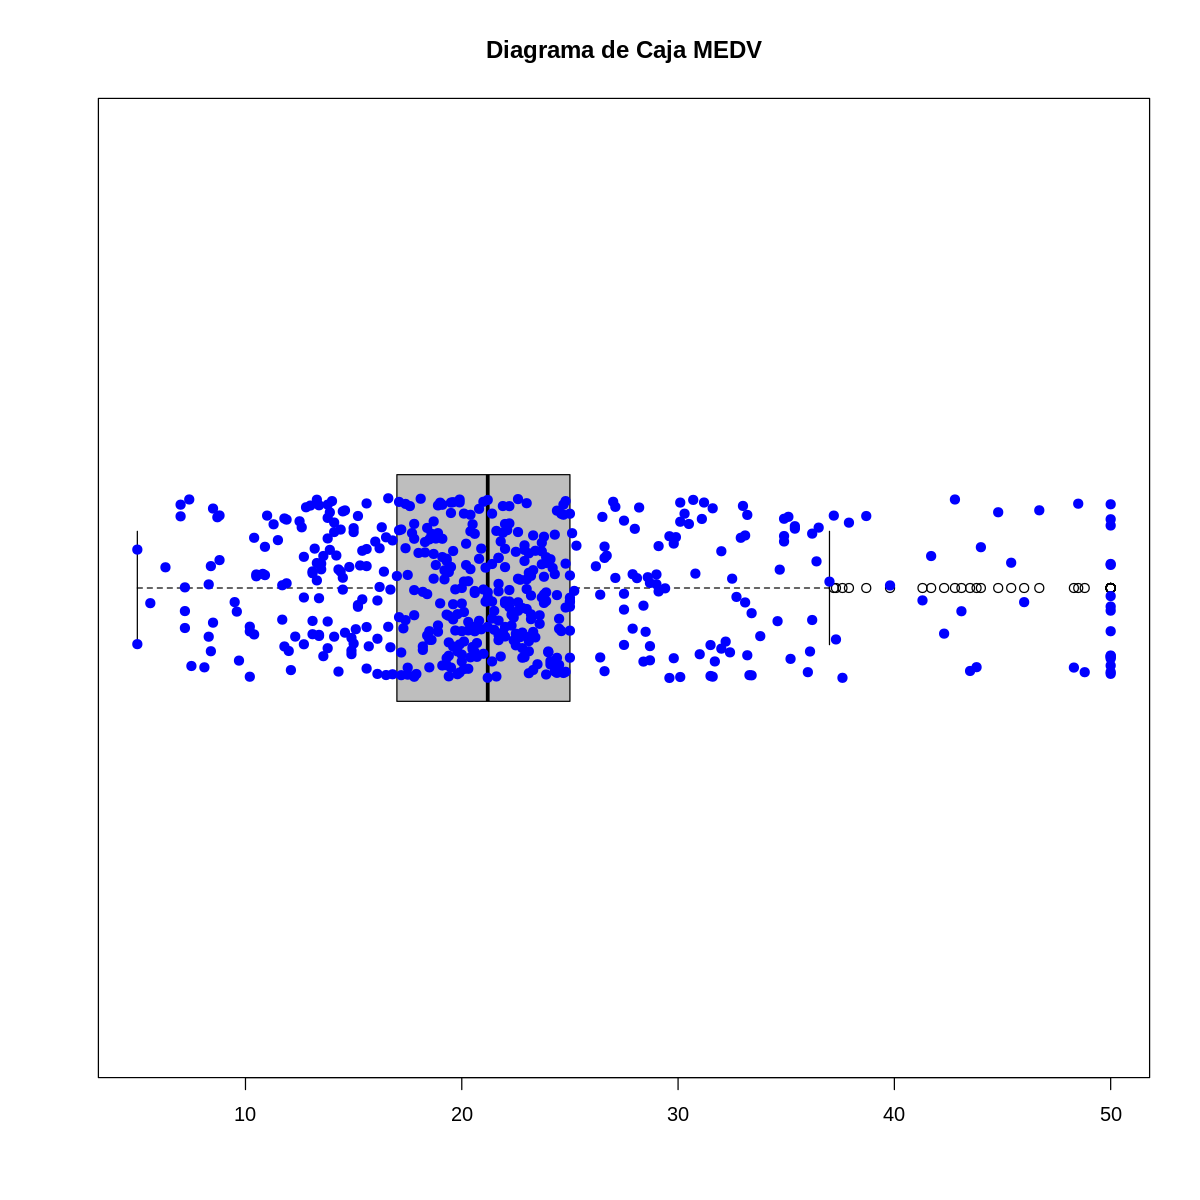

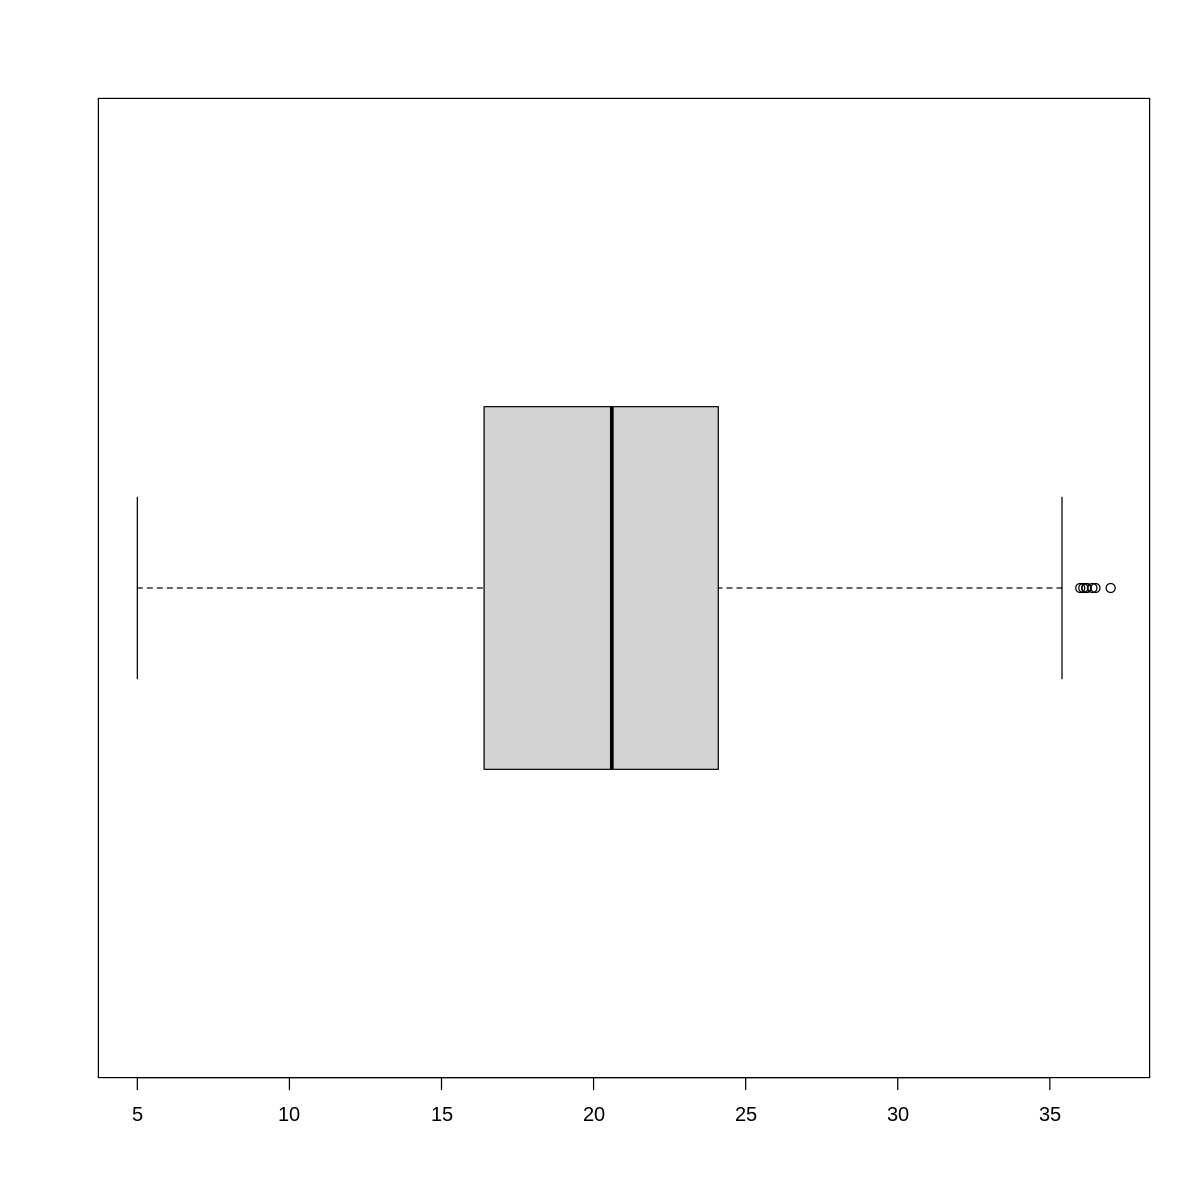

In [ ]:
outliersMEDV<-boxplot(bostonDataset$MEDV, main = "Diagrama de Caja MEDV", boxwex = 0.5,col="gray", horizontal = TRUE)$out
print('Outliers MEDV')
print(sort(outliersMEDV, decreasing = FALSE))
stripchart(bostonDataset$MEDV, method = "jitter", pch = 19, add = TRUE, col = "blue")


x<-bostonDataset
x<- x[-which(x$MEDV %in% outliersMEDV),]
boxplot(x$MEDV, horizontal = TRUE)

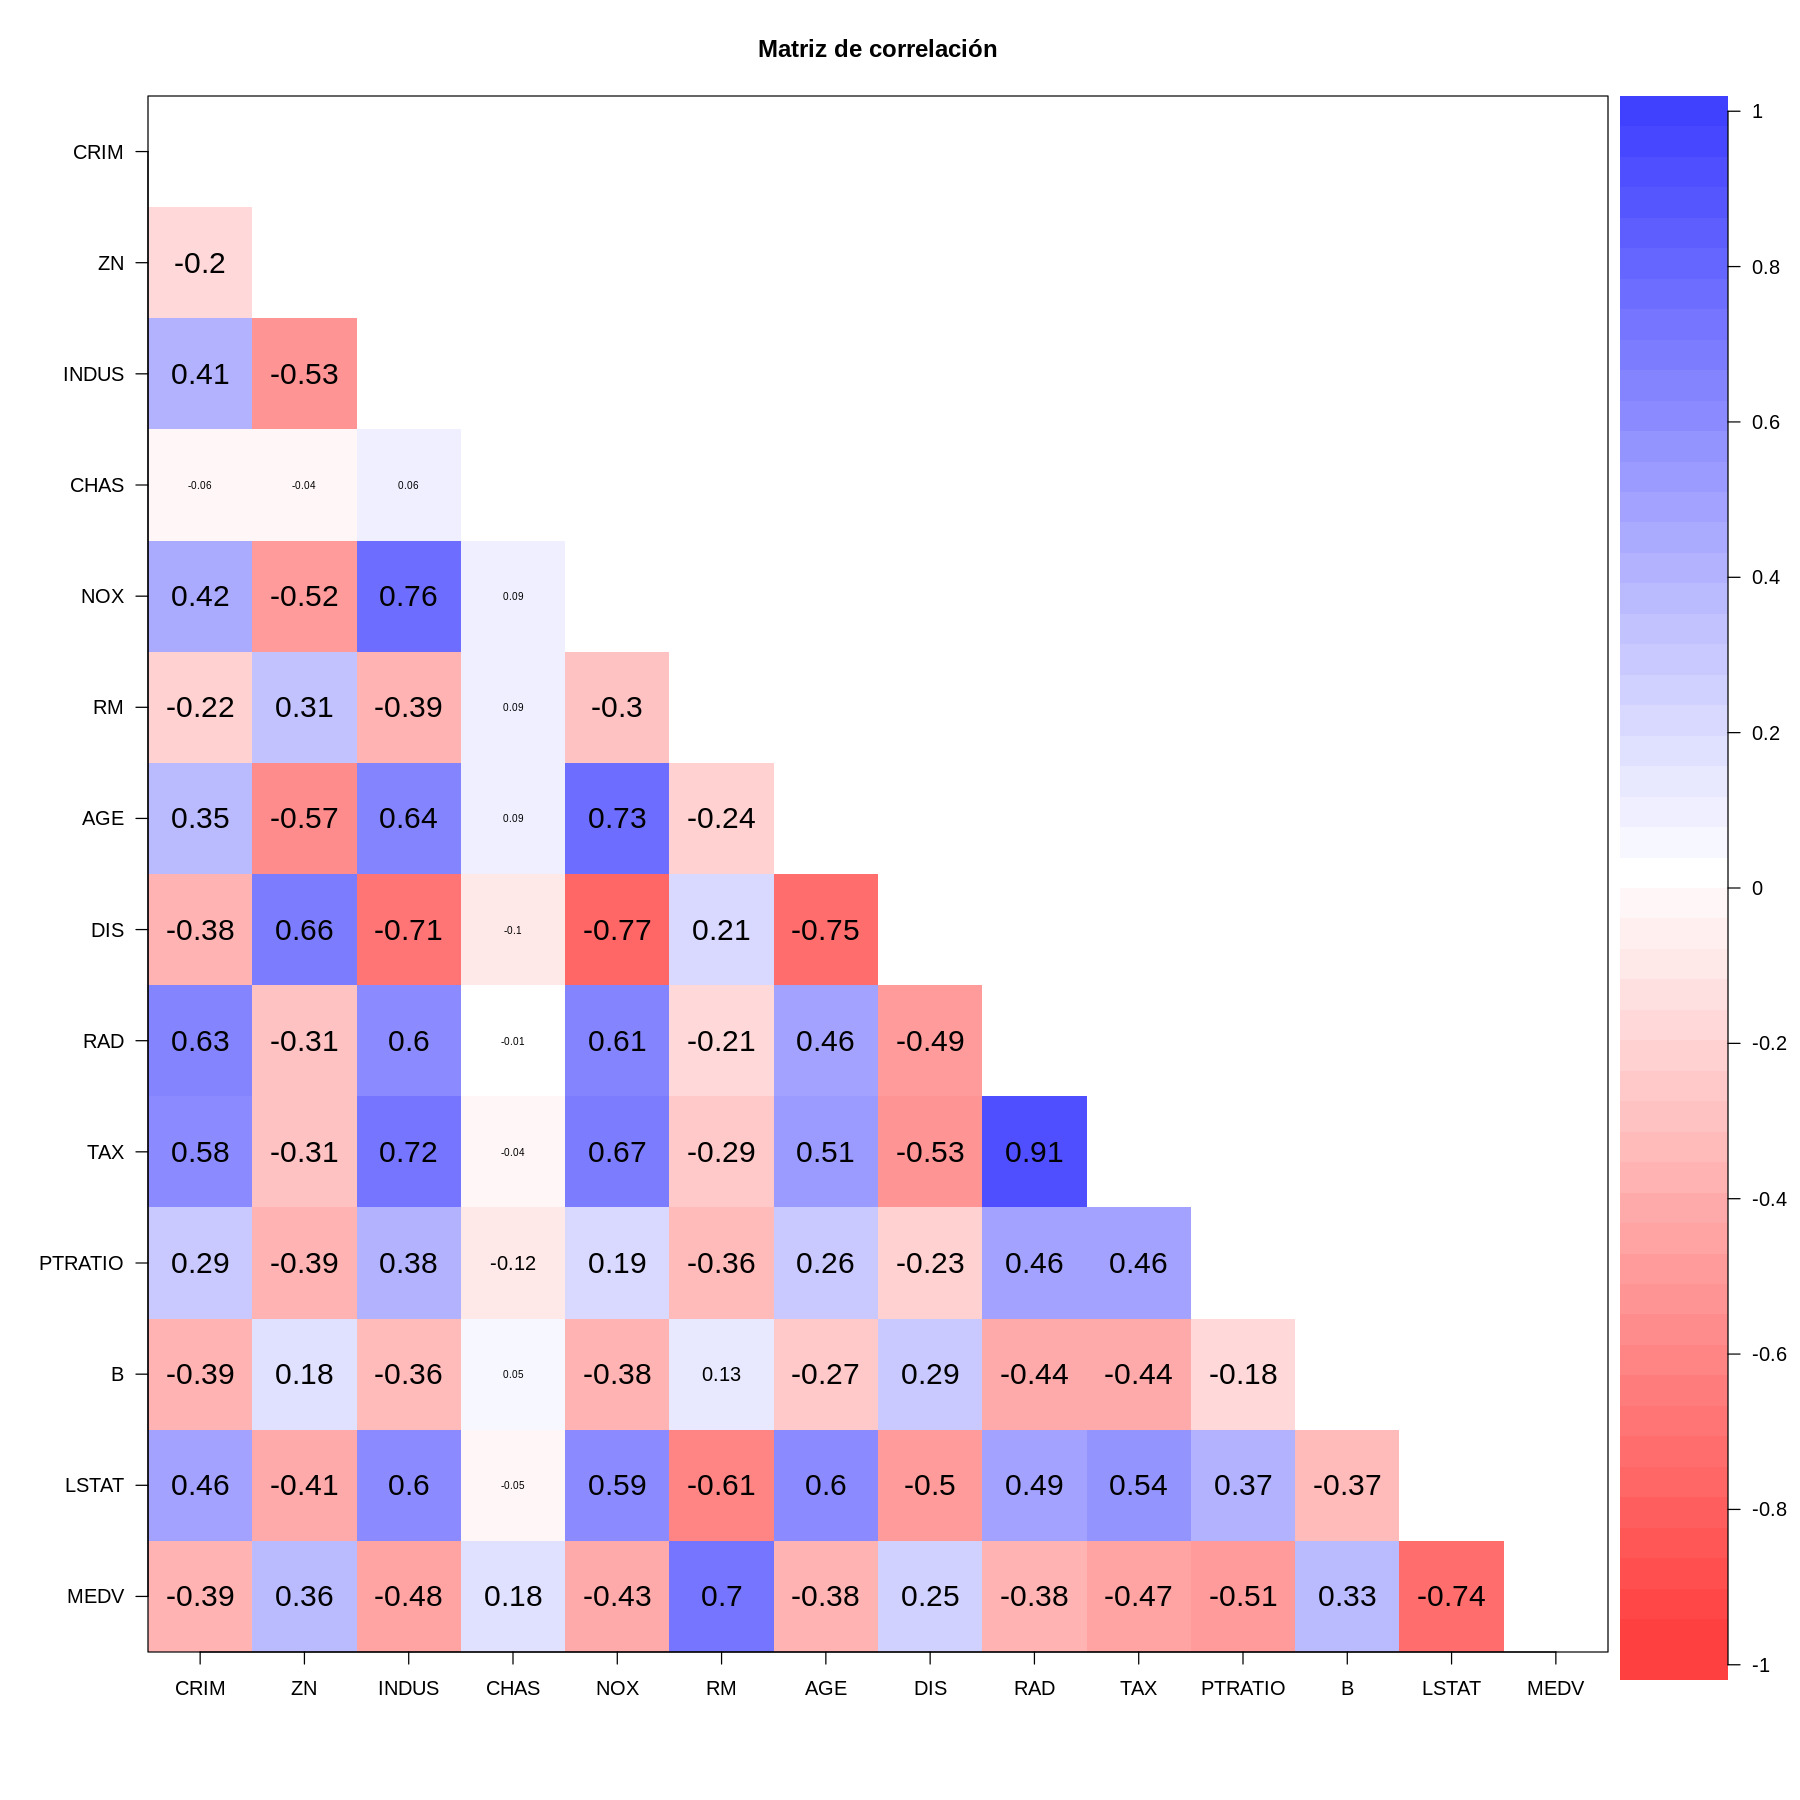

In [ ]:
options(repr.plot.width=15, repr.plot.height=15)
corPlot(bostonDataset, cex = 1,diag=FALSE,upper = FALSE, main = "Matriz de correlación")

In [ ]:
fullLm <- lm(MEDV ~ .,data = bostonDataset)
summary(fullLm)

#library(MASS)
#modback <- stepAIC(fullLm, trace=TRUE, direction="backward")
#modback$anova


Call:
lm(formula = MEDV ~ ., data = bostonDataset)

Residuals:
    Min      1Q  Median      3Q     Max 
-15.595  -2.730  -0.518   1.777  26.199 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  3.646e+01  5.103e+00   7.144 3.28e-12 ***
CRIM        -1.080e-01  3.286e-02  -3.287 0.001087 ** 
ZN           4.642e-02  1.373e-02   3.382 0.000778 ***
INDUS        2.056e-02  6.150e-02   0.334 0.738288    
CHAS         2.687e+00  8.616e-01   3.118 0.001925 ** 
NOX         -1.777e+01  3.820e+00  -4.651 4.25e-06 ***
RM           3.810e+00  4.179e-01   9.116  < 2e-16 ***
AGE          6.922e-04  1.321e-02   0.052 0.958229    
DIS         -1.476e+00  1.995e-01  -7.398 6.01e-13 ***
RAD          3.060e-01  6.635e-02   4.613 5.07e-06 ***
TAX         -1.233e-02  3.760e-03  -3.280 0.001112 ** 
PTRATIO     -9.527e-01  1.308e-01  -7.283 1.31e-12 ***
B            9.312e-03  2.686e-03   3.467 0.000573 ***
LSTAT       -5.248e-01  5.072e-02 -10.347  < 2e-16 ***
---
Signif. co

In [ ]:
lmRM <- lm(MEDV~RM,data=bostonDataset)
paste ('logLik: ', logLik(lmRM))
paste ('Akaike Information Criterion (AIC): ', AIC(lmRM))
paste ('Schwarz’s Bayesian criterion (BIC)', BIC(lmRM))

summary(lmRM)

[1] "logLik:  -1673.07555861254"

[1] "Akaike Information Criterion (AIC):  3352.15111722507"

[1] "Schwarz’s Bayesian criterion (BIC) 3364.83072723294"


Call:
lm(formula = MEDV ~ RM, data = bostonDataset)

Residuals:
    Min      1Q  Median      3Q     Max 
-23.346  -2.547   0.090   2.986  39.433 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  -34.671      2.650  -13.08   <2e-16 ***
RM             9.102      0.419   21.72   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 6.616 on 504 degrees of freedom
Multiple R-squared:  0.4835,	Adjusted R-squared:  0.4825 
F-statistic: 471.8 on 1 and 504 DF,  p-value: < 2.2e-16


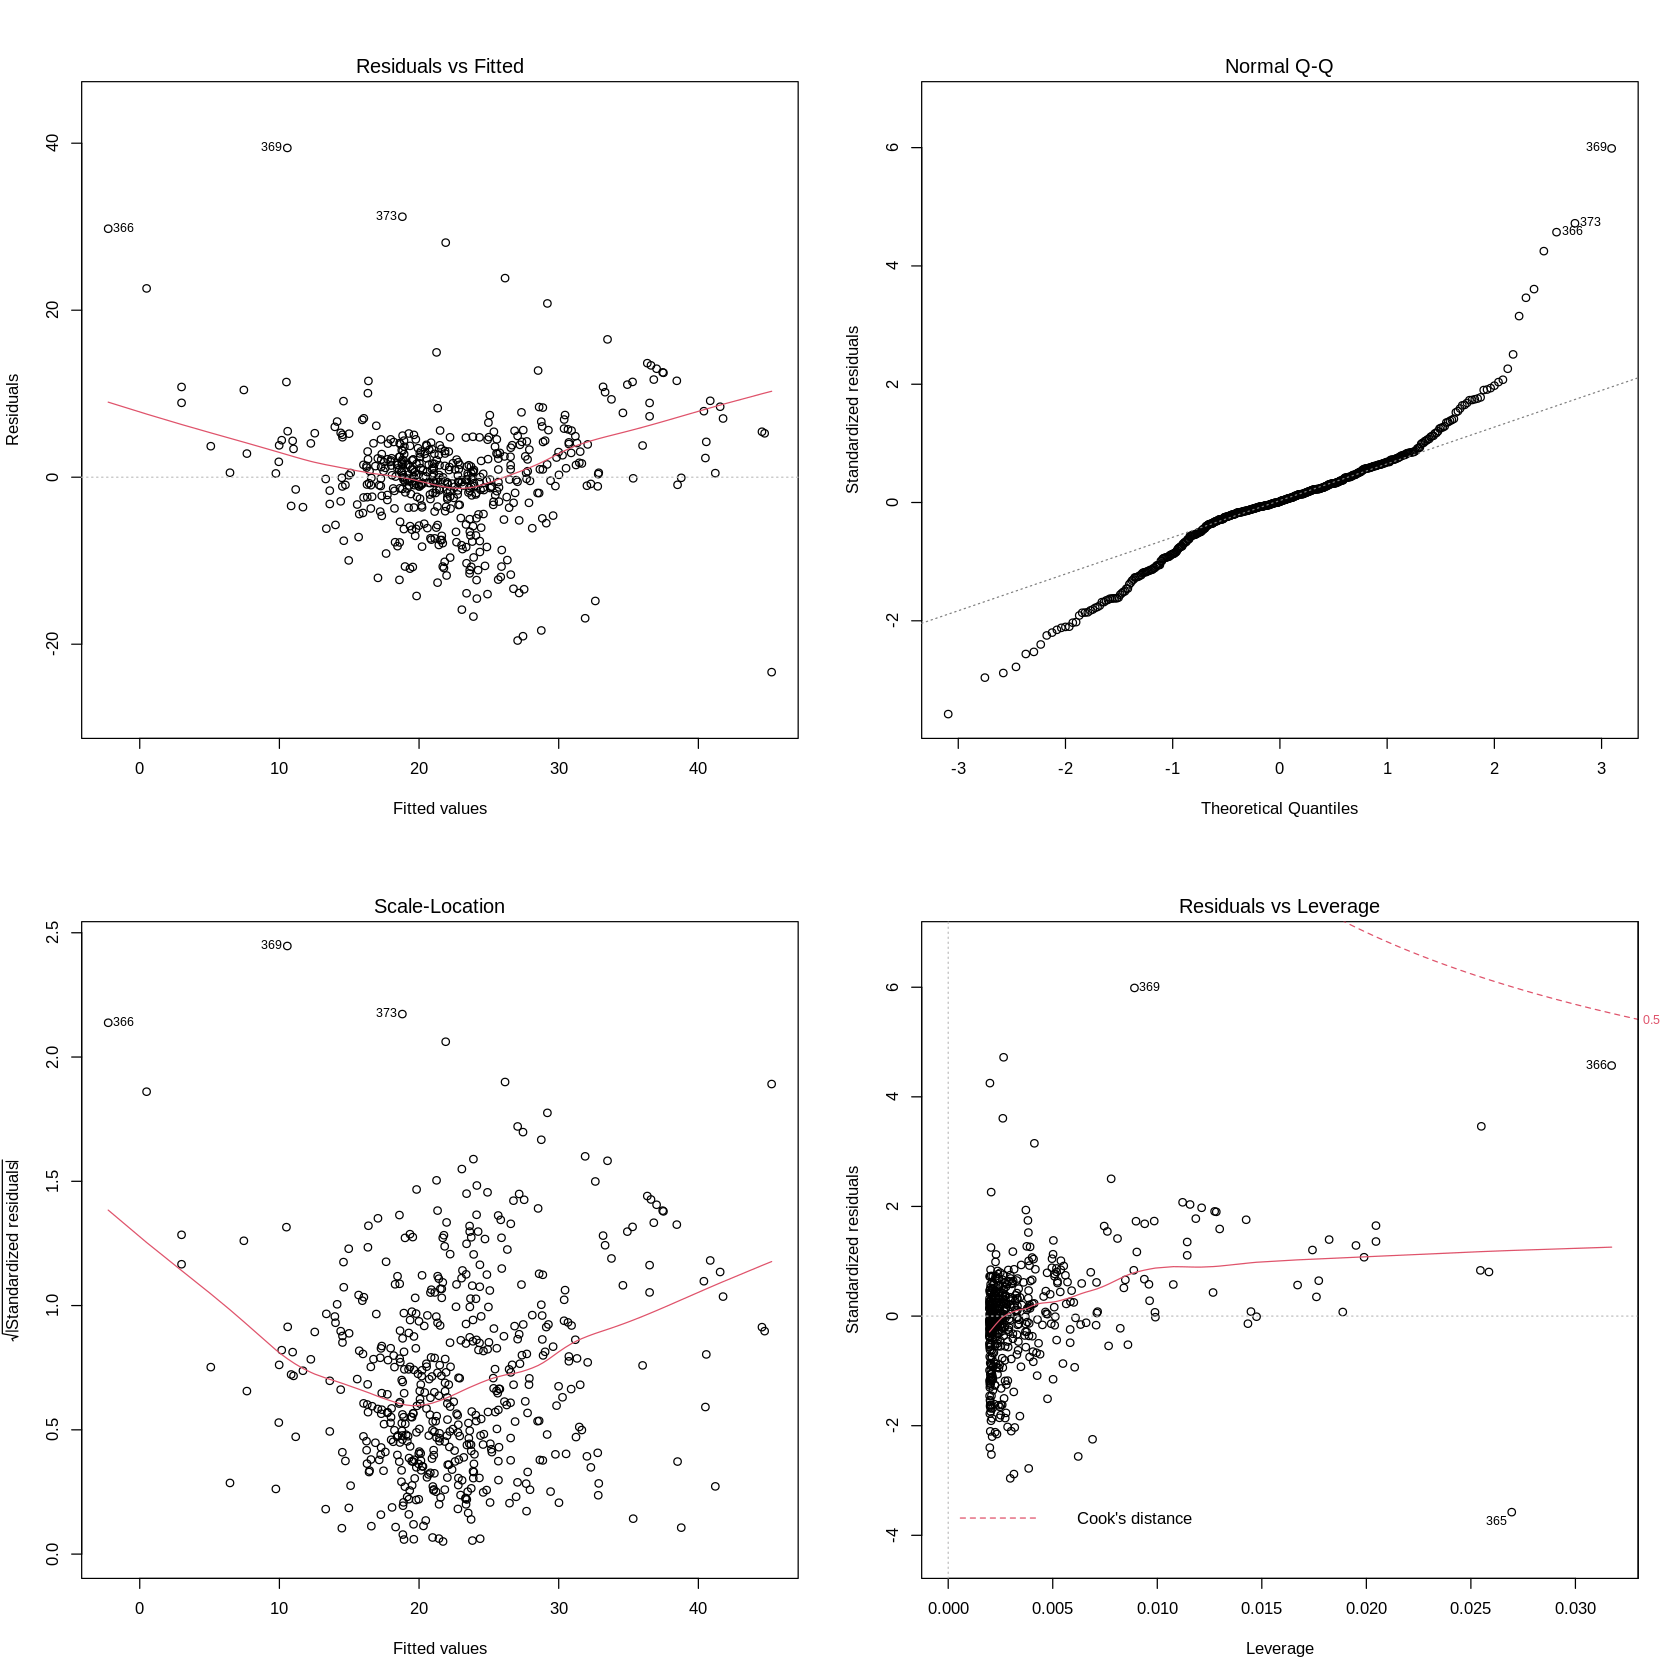

In [ ]:
options(repr.plot.width=14, repr.plot.height=14)
# Acomodamos las opciones gráficas para 4 gráficos en 2x2
par(mfrow = c(2, 2))
# graficamos el ajuste
plot(lmRM)

`geom_smooth()` using formula 'y ~ x'



[1] "Supuesto 1, Media de los errores: "

[1] "Residuos:  -6.28854401577916e-17"

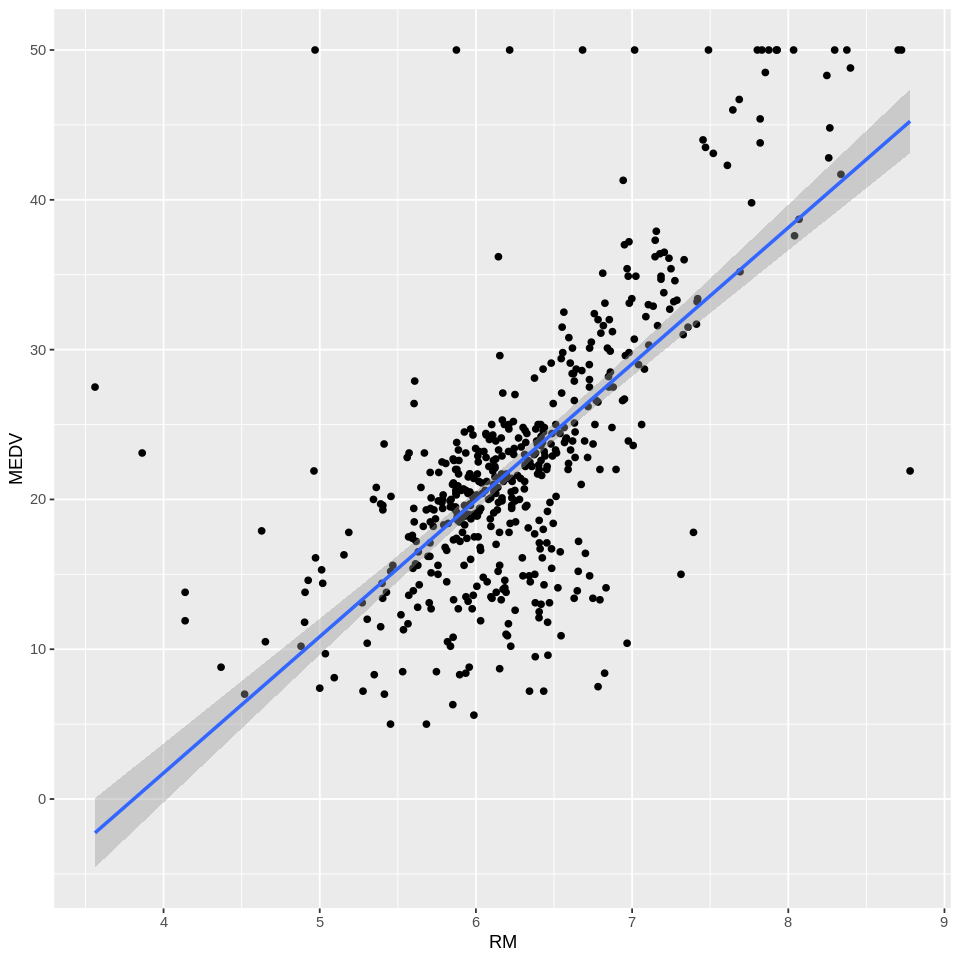

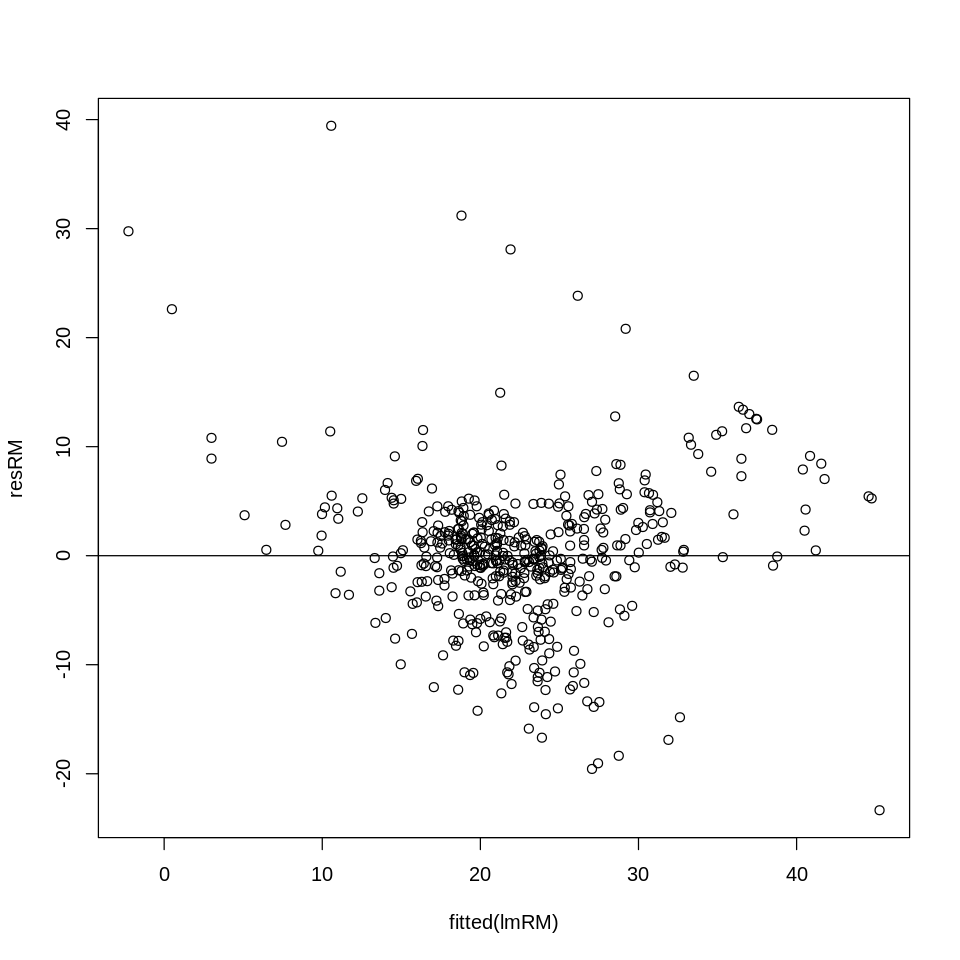

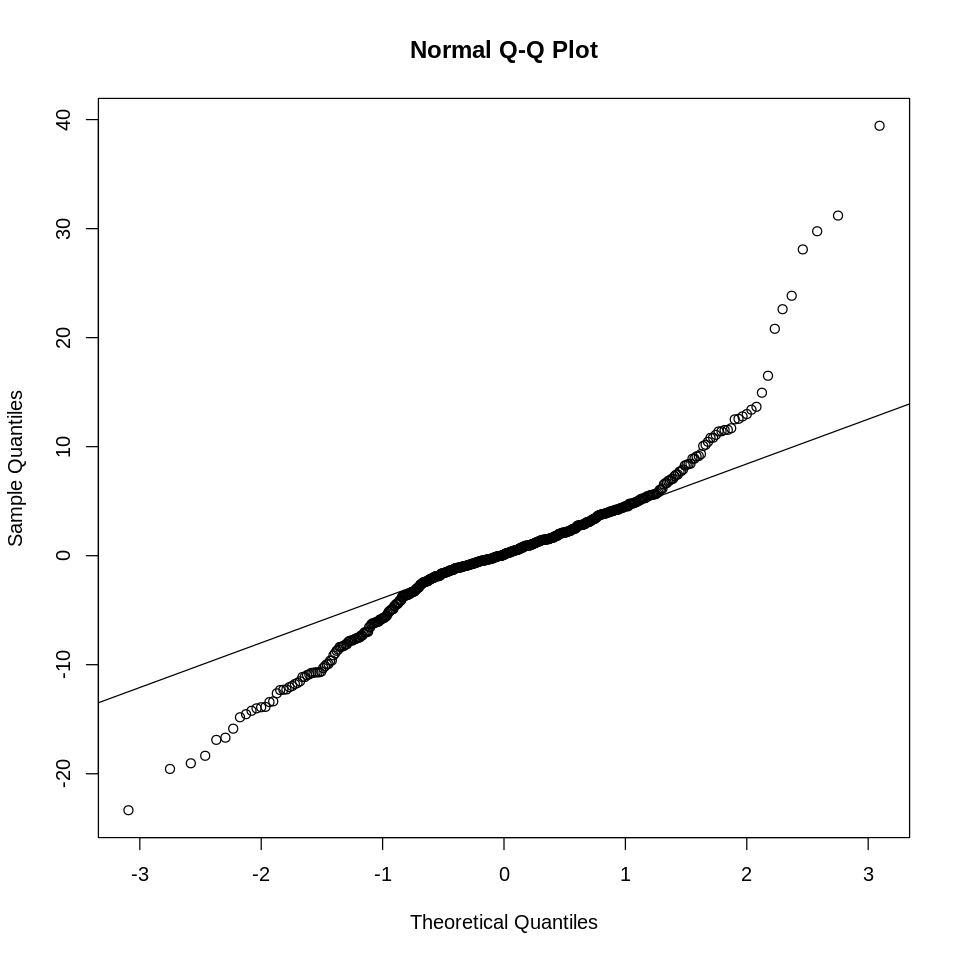

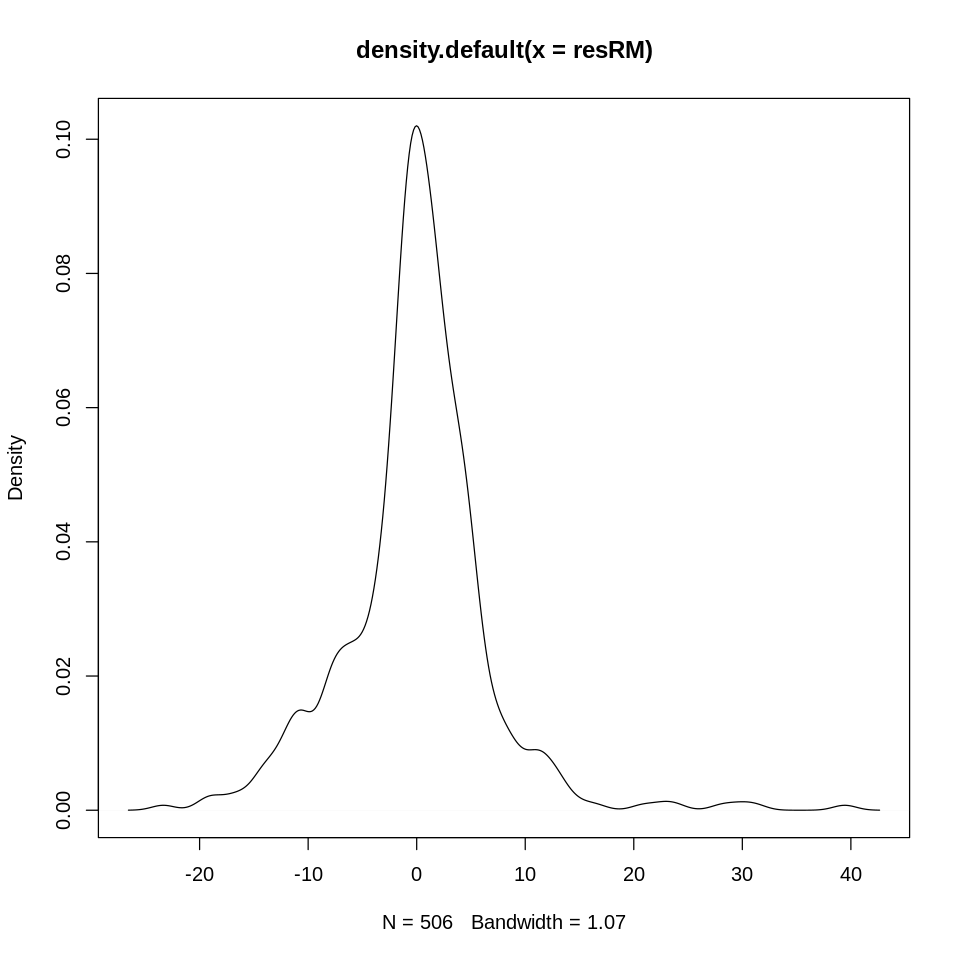

In [ ]:
options(repr.plot.width=8, repr.plot.height=8)
ggplot(data = bostonDataset,aes(x = RM, y = MEDV)) + geom_point() +geom_smooth(method = "lm")
#plot(bostonDataset$RM, bostonDataset$MEDV, main="Scatterplot RM-MEDVM",xlab="RM", ylab="MEDV", pch=19)
#abline(lmRM, col="red")
resRM = resid(lmRM)
paste ('Supuesto 1, Media de los errores: ')
paste ('Residuos: ', mean(resRM))
plot(fitted(lmRM), resRM)
abline(0,0)


qqnorm(resRM)
qqline(resRM)

plot(density(resRM))

In [ ]:
paste ('Supuesto 2, Covarianza: ')
dwtest(lmRM)

[1] "Supuesto 2, Covarianza: "


	Durbin-Watson test

data:  lmRM
DW = 0.68362, p-value < 2.2e-16
alternative hypothesis: true autocorrelation is greater than 0


In [ ]:
paste ('Supuesto 3, Homoscedasticidad: ')
bptest(lmRM)

[1] "Supuesto 3, Homoscedasticidad: "


	studentized Breusch-Pagan test

data:  lmRM
BP = 0.0069871, df = 1, p-value = 0.9334


In [ ]:
paste ('Supuesto 5, Normalidad: ')
jarque.bera.test(resRM)

[1] "Supuesto 5, Normalidad: "


	Jarque Bera Test

data:  resRM
X-squared = 612.45, df = 2, p-value < 2.2e-16


In [ ]:
lmLSTAT <- lm(MEDV~LSTAT,data=bostonDataset)
paste ('logLik: ', logLik(lmLSTAT))
paste ('Akaike Information Criterion (AIC): ', AIC(lmLSTAT))
paste ('Schwarz’s Bayesian criterion (BIC): ', BIC(lmLSTAT))
summary(lmLSTAT)

[1] "logLik:  -1641.48747845008"

[1] "Akaike Information Criterion (AIC):  3288.97495690016"

[1] "Schwarz’s Bayesian criterion (BIC):  3301.65456690802"


Call:
lm(formula = MEDV ~ LSTAT, data = bostonDataset)

Residuals:
    Min      1Q  Median      3Q     Max 
-15.168  -3.990  -1.318   2.034  24.500 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 34.55384    0.56263   61.41   <2e-16 ***
LSTAT       -0.95005    0.03873  -24.53   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 6.216 on 504 degrees of freedom
Multiple R-squared:  0.5441,	Adjusted R-squared:  0.5432 
F-statistic: 601.6 on 1 and 504 DF,  p-value: < 2.2e-16


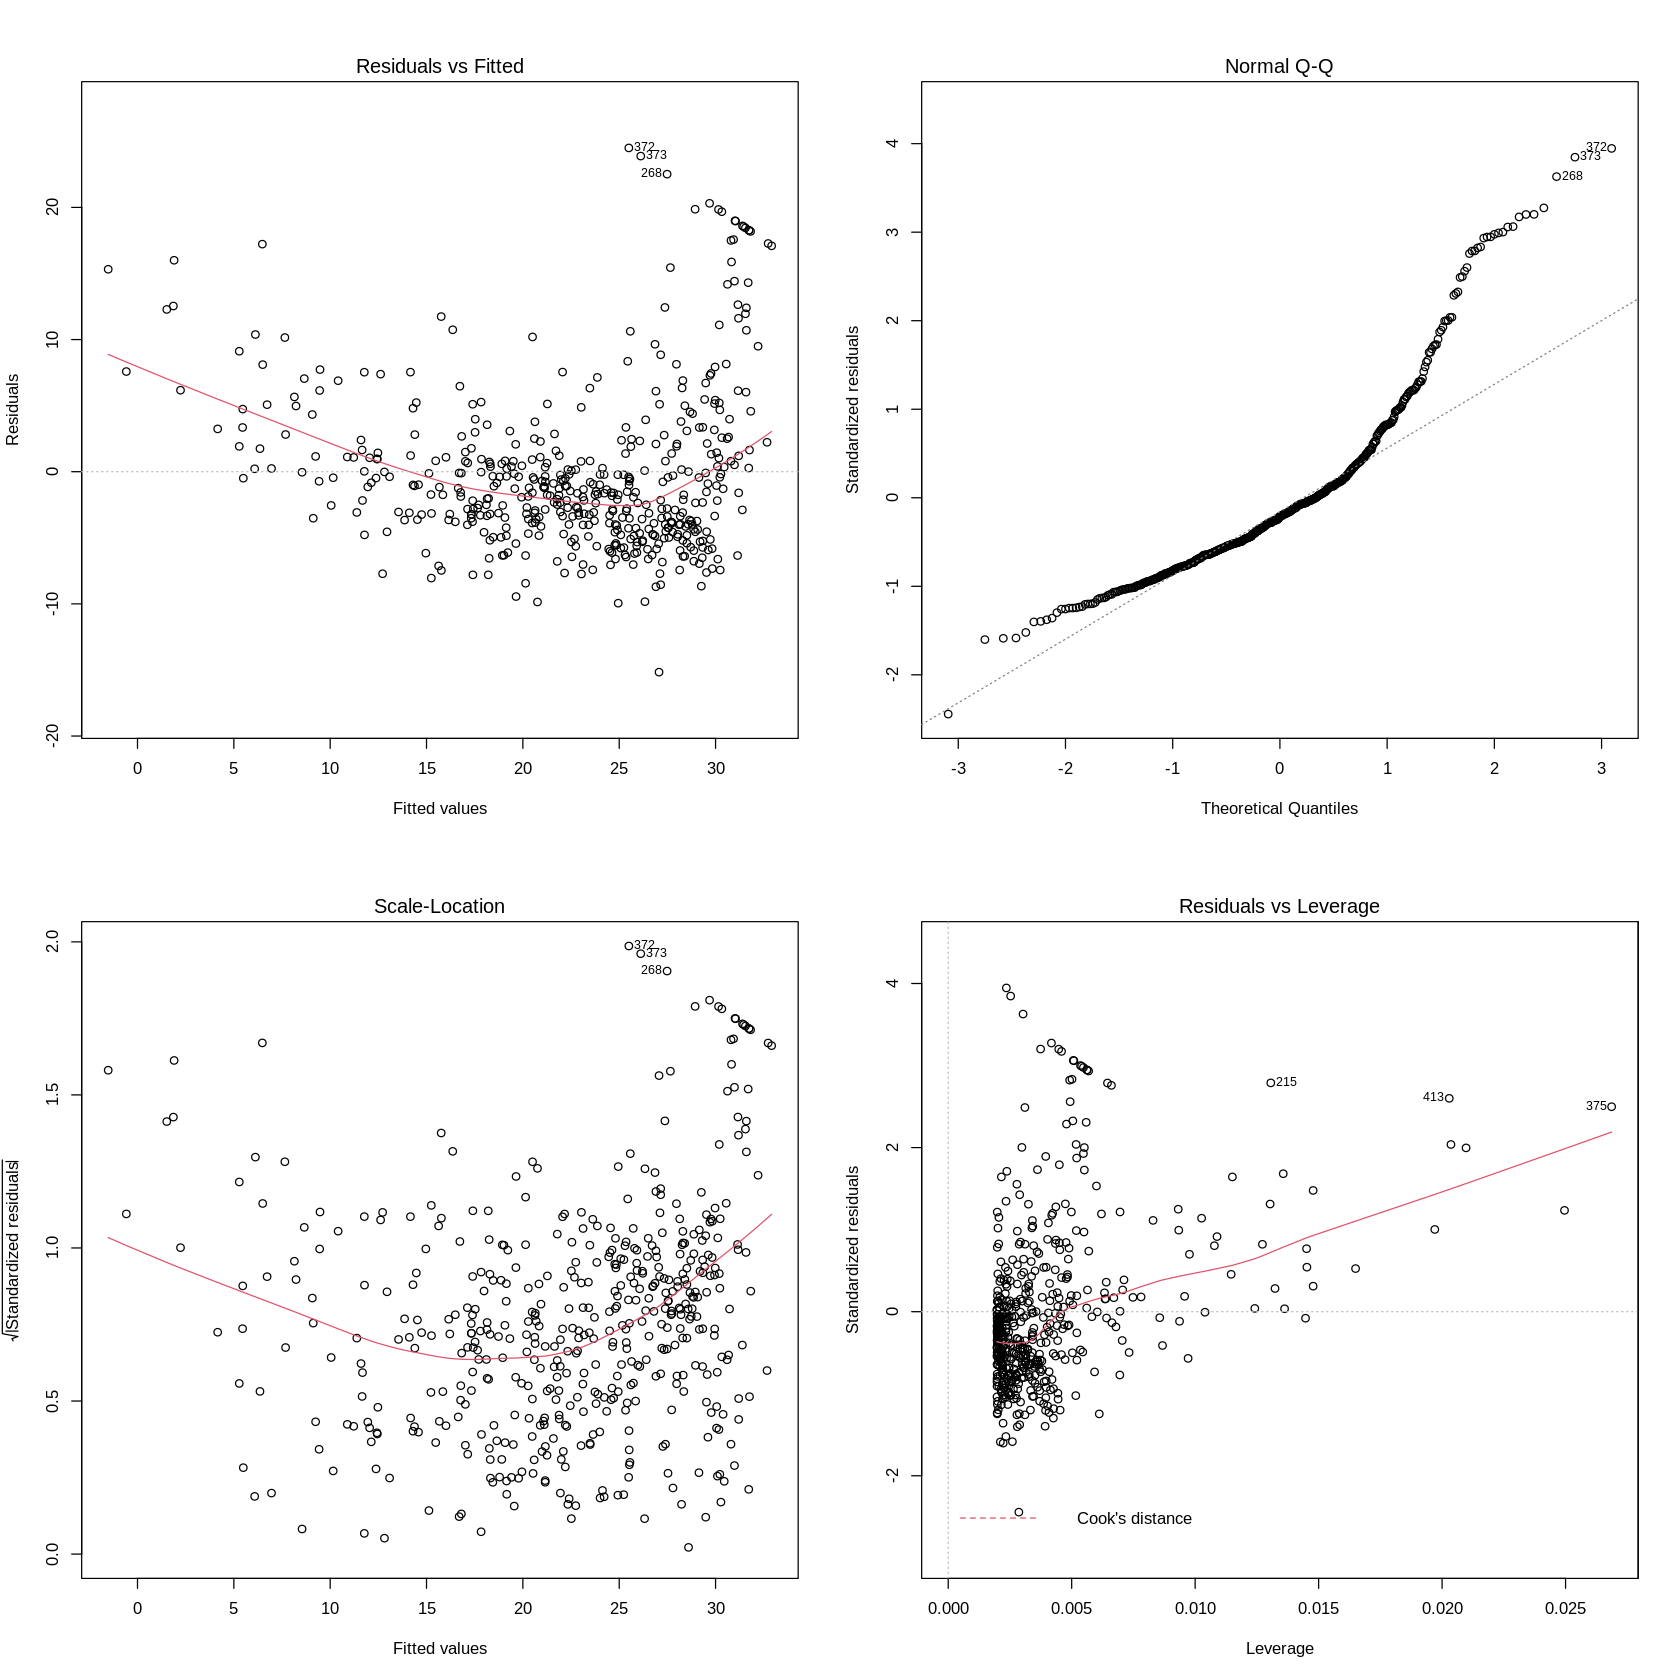

In [ ]:
options(repr.plot.width=14, repr.plot.height=14)
# Acomodamos las opciones gráficas para 4 gráficos en 2x2
par(mfrow = c(2, 2))
# graficamos el ajuste
plot(lmLSTAT)

`geom_smooth()` using formula 'y ~ x'



[1] "Supuesto 1, Media de los errores: "

[1] "Residuos:  -9.24991583109293e-17"

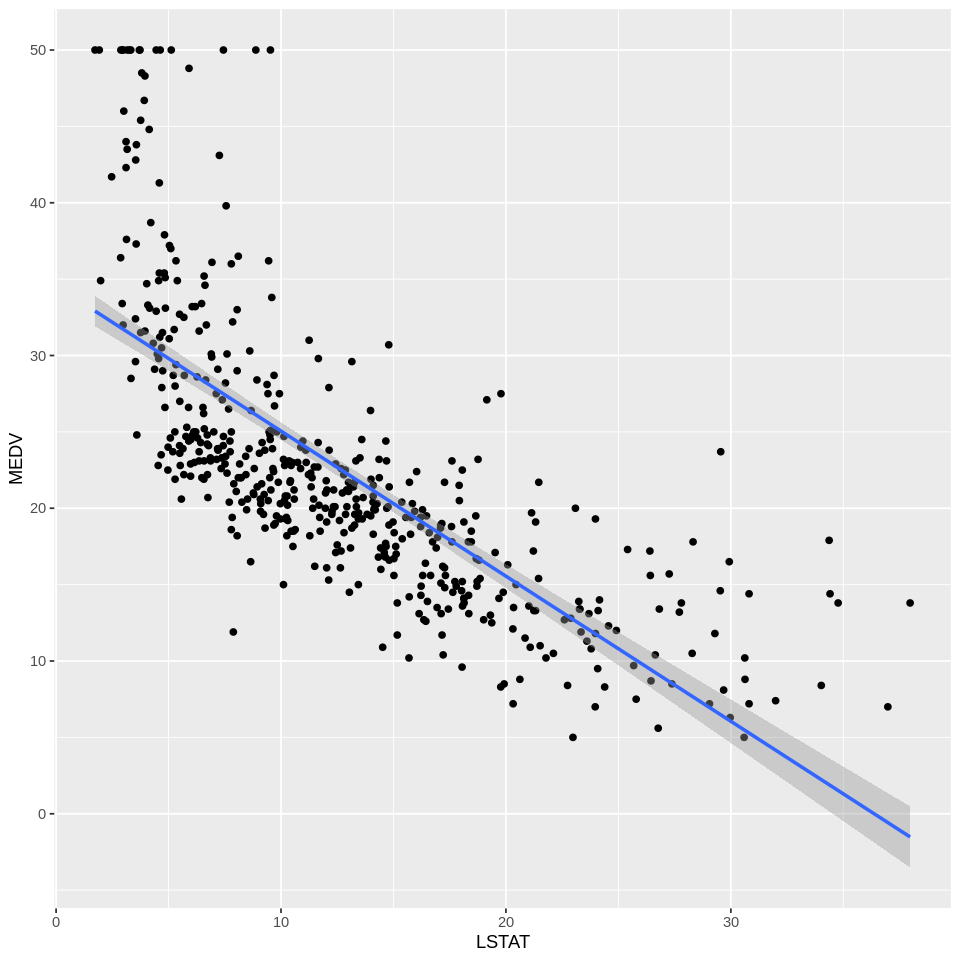

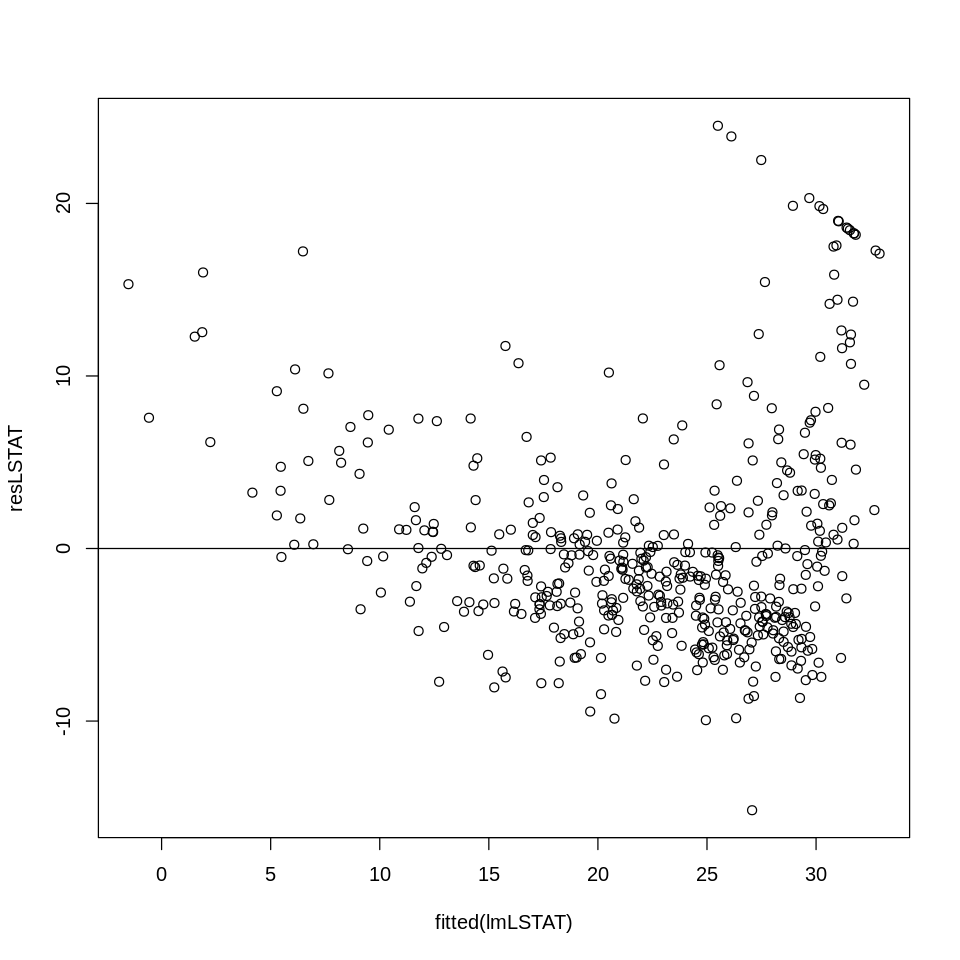

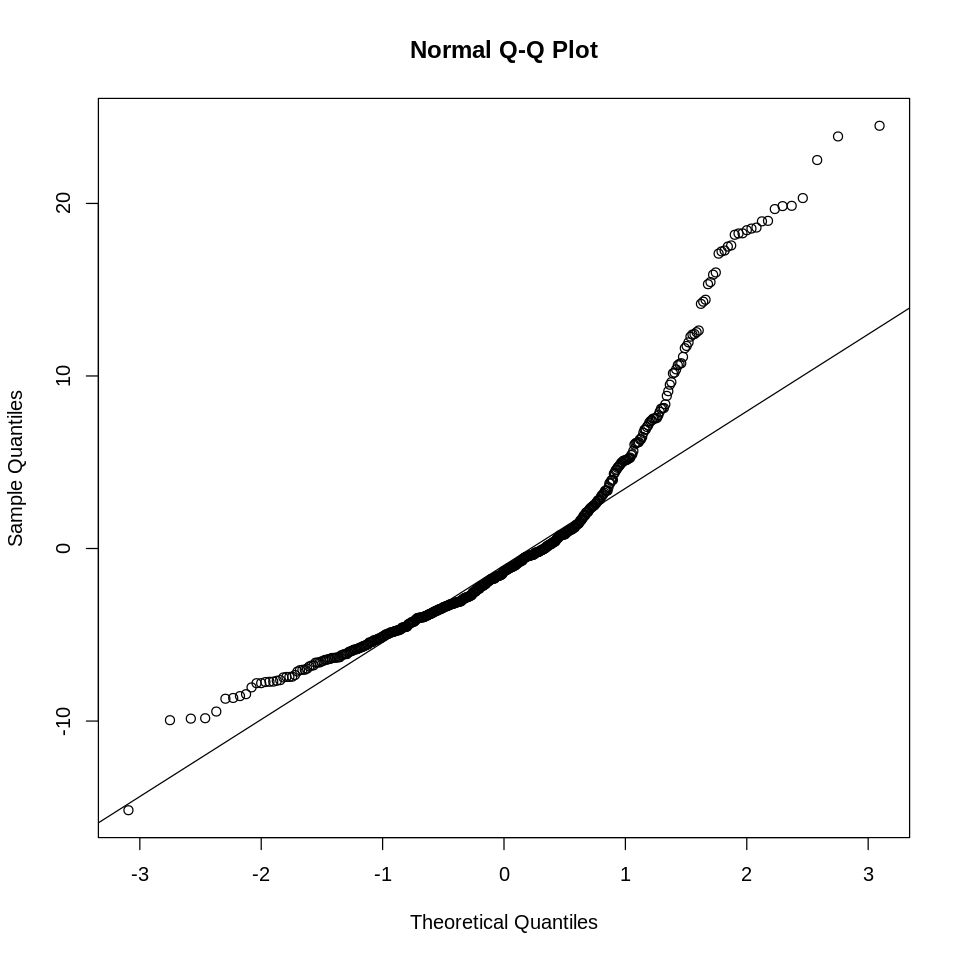

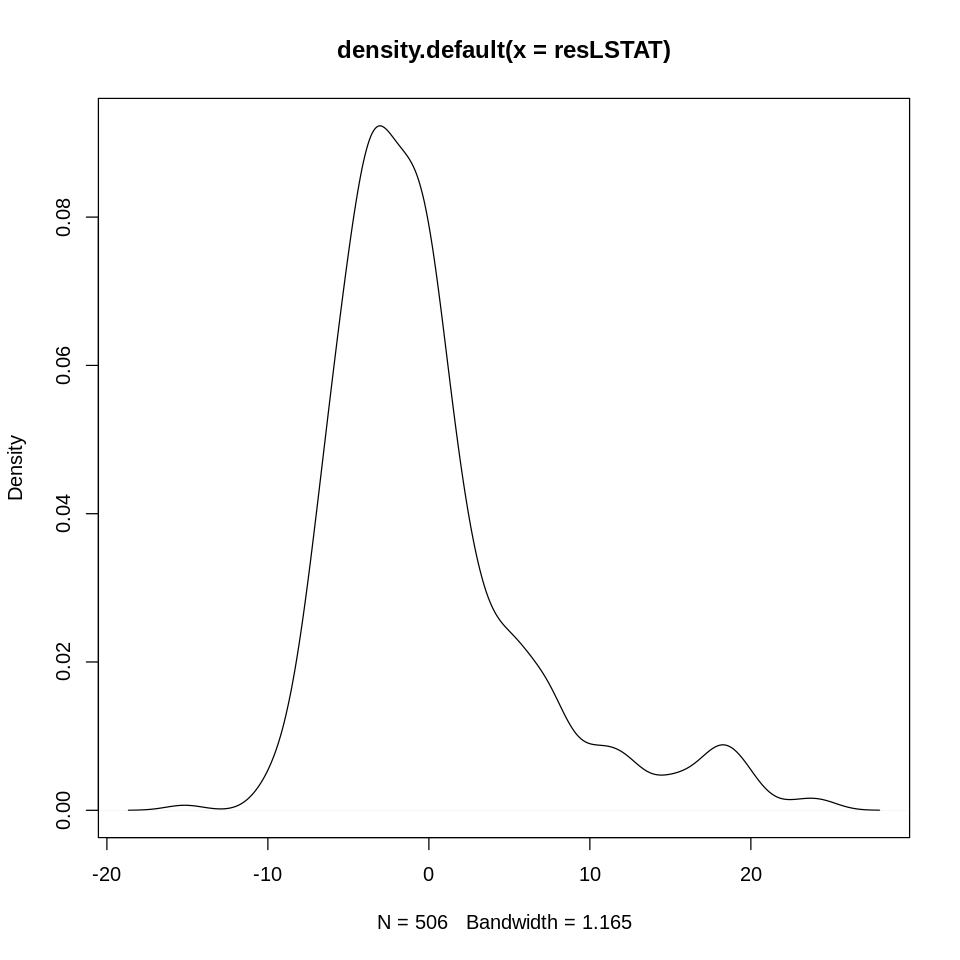

In [ ]:
options(repr.plot.width=8, repr.plot.height=8)
ggplot(data = bostonDataset,aes(x = LSTAT, y = MEDV)) + geom_point() +geom_smooth(method = "lm")
#plot(bostonDataset$LSTAT, bostonDataset$MEDV, main="Scatterplot LSTAT-MEDV",#xlab="LSTAT", ylab="MEDV", pch=19)
#abline(lmLSTAT, col = "red")
#plot(lmLSTAT$residuals, pch = 16, col = "red")

resLSTAT = resid(lmLSTAT)
paste ('Supuesto 1, Media de los errores: ')
paste ('Residuos: ', mean(resLSTAT))
plot(fitted(lmLSTAT), resLSTAT)
abline(0,0)

qqnorm(resLSTAT)
qqline(resLSTAT)

plot(density(resLSTAT))

In [ ]:
paste ('Supuesto 2, Covarianza: ')
dwtest(lmLSTAT)

[1] "Supuesto 2, Covarianza: "


	Durbin-Watson test

data:  lmLSTAT
DW = 0.8915, p-value < 2.2e-16
alternative hypothesis: true autocorrelation is greater than 0


In [ ]:
paste ('Supuesto 3, Homoscedasticidad: ')
bptest(lmLSTAT)

[1] "Supuesto 3, Homoscedasticidad: "


	studentized Breusch-Pagan test

data:  lmLSTAT
BP = 15.497, df = 1, p-value = 8.262e-05


In [ ]:
paste ('Supuesto 5, Normalidad: ')
jarque.bera.test(resLSTAT)

[1] "Supuesto 5, Normalidad: "


	Jarque Bera Test

data:  resLSTAT
X-squared = 291.37, df = 2, p-value < 2.2e-16


In [ ]:
lmPTRATIO <- lm(MEDV~PTRATIO,data=bostonDataset)
paste ('logLik: ', logLik(lmPTRATIO))
paste ('Akaike Information Criterion (AIC): ', AIC(lmPTRATIO))
paste ('Schwarz’s Bayesian criterion (BIC): ', BIC(lmPTRATIO))

summary(lmPTRATIO)

[1] "logLik:  -1764.79539335846"

[1] "Akaike Information Criterion (AIC):  3535.59078671692"

[1] "Schwarz’s Bayesian criterion (BIC):  3548.27039672478"


Call:
lm(formula = MEDV ~ PTRATIO, data = bostonDataset)

Residuals:
     Min       1Q   Median       3Q      Max 
-18.8342  -4.8262  -0.6426   3.1571  31.2303 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)   62.345      3.029   20.58   <2e-16 ***
PTRATIO       -2.157      0.163  -13.23   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 7.931 on 504 degrees of freedom
Multiple R-squared:  0.2578,	Adjusted R-squared:  0.2564 
F-statistic: 175.1 on 1 and 504 DF,  p-value: < 2.2e-16


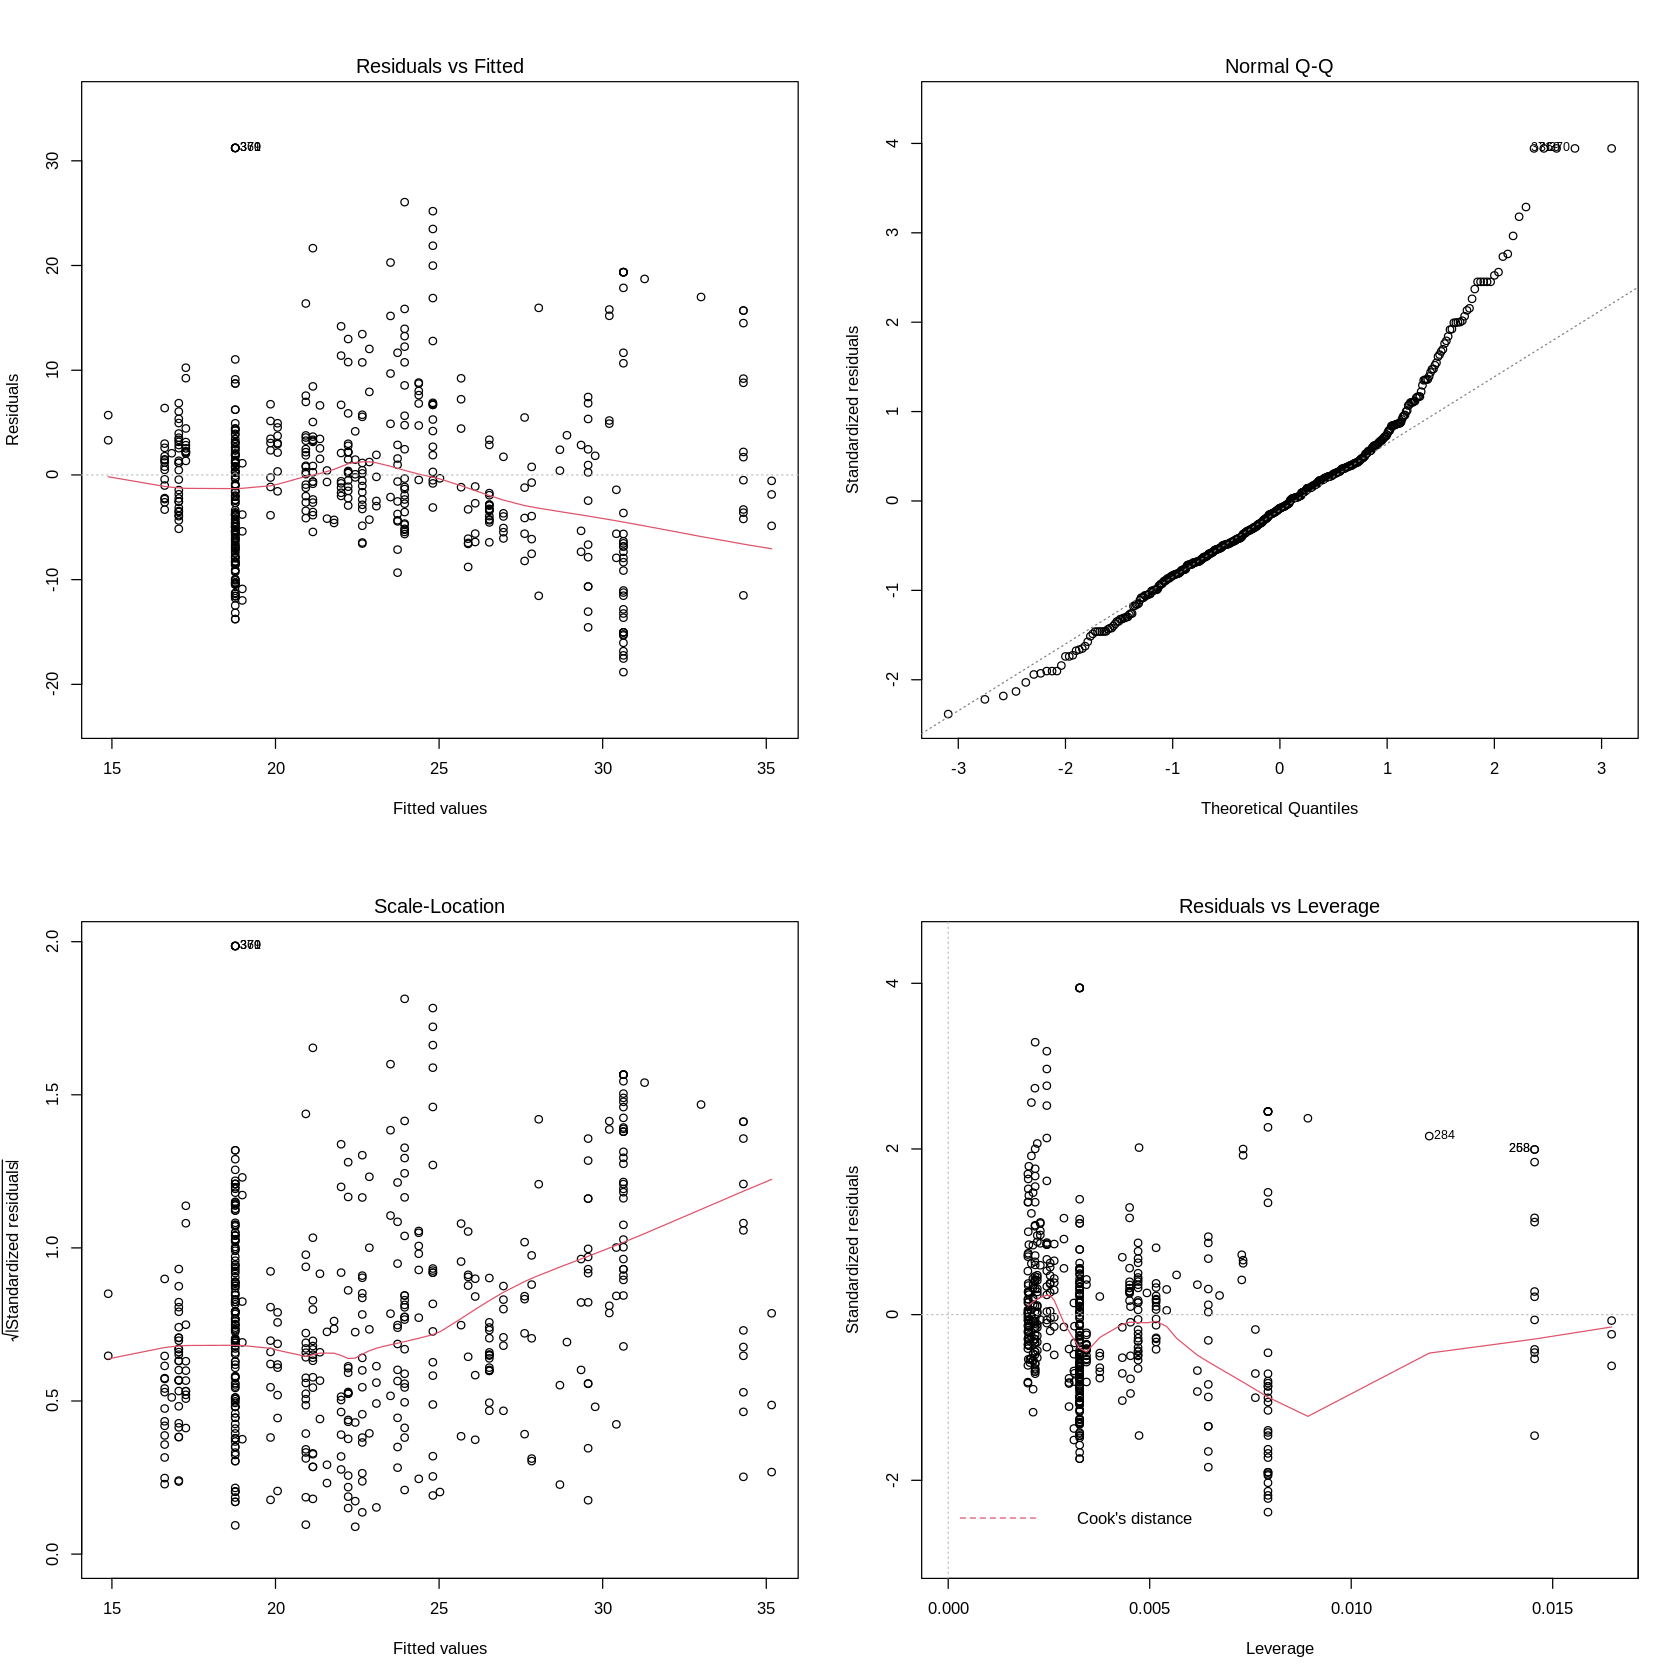

In [ ]:
options(repr.plot.width=14, repr.plot.height=14)
# Acomodamos las opciones gráficas para 4 gráficos en 2x2
par(mfrow = c(2, 2))
# graficamos el ajuste
plot(lmPTRATIO)

`geom_smooth()` using formula 'y ~ x'



[1] "Supuesto 1, Media de los errores: "

[1] "Residuos:  -9.24991583109293e-17"

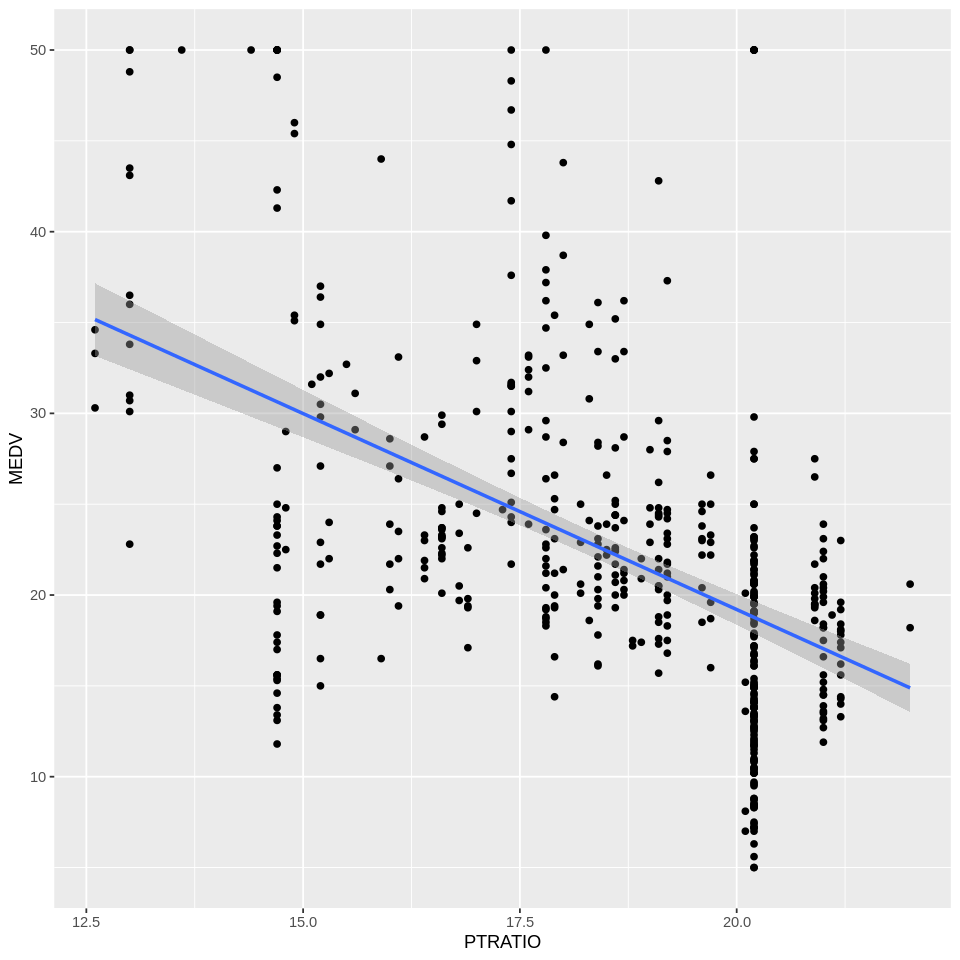

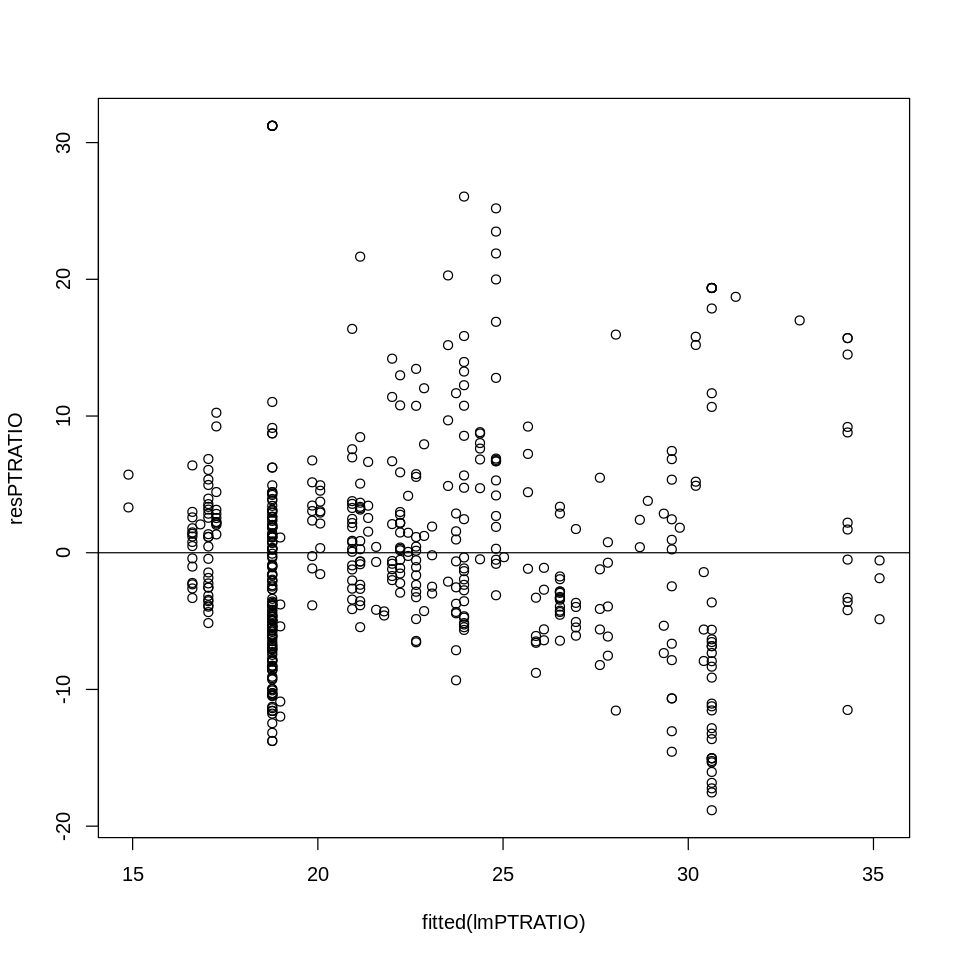

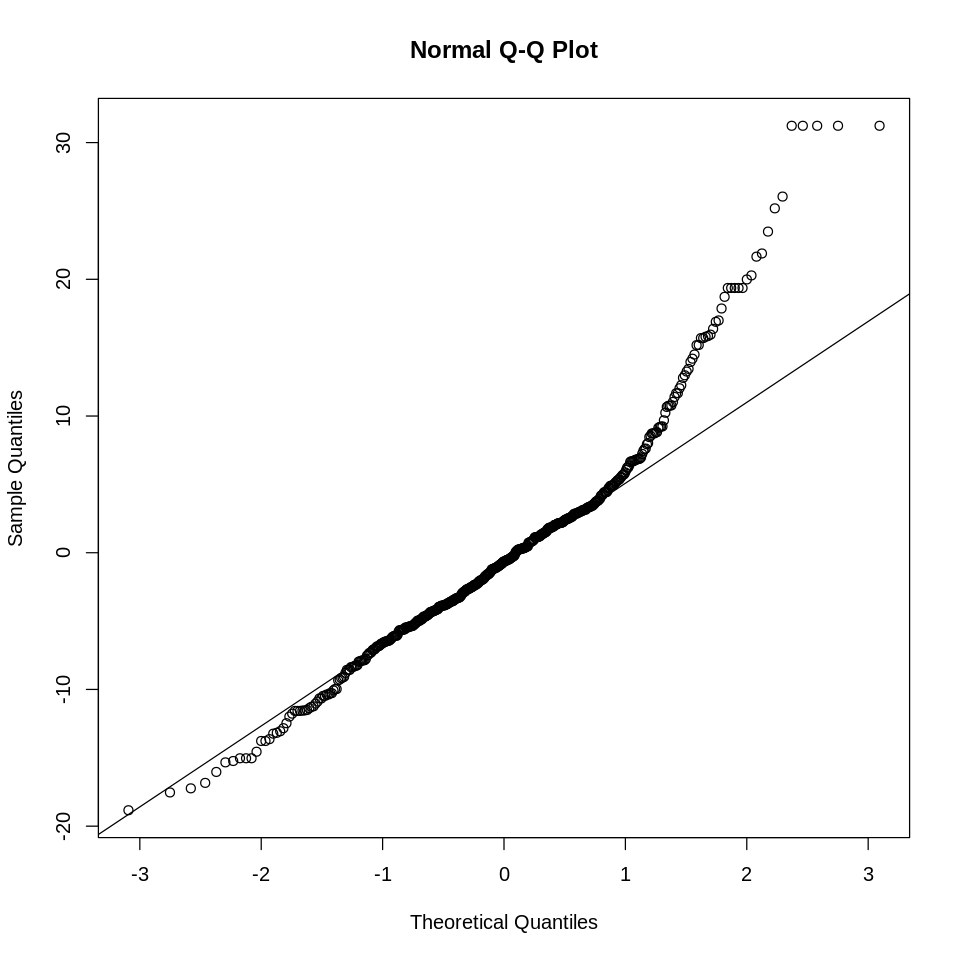

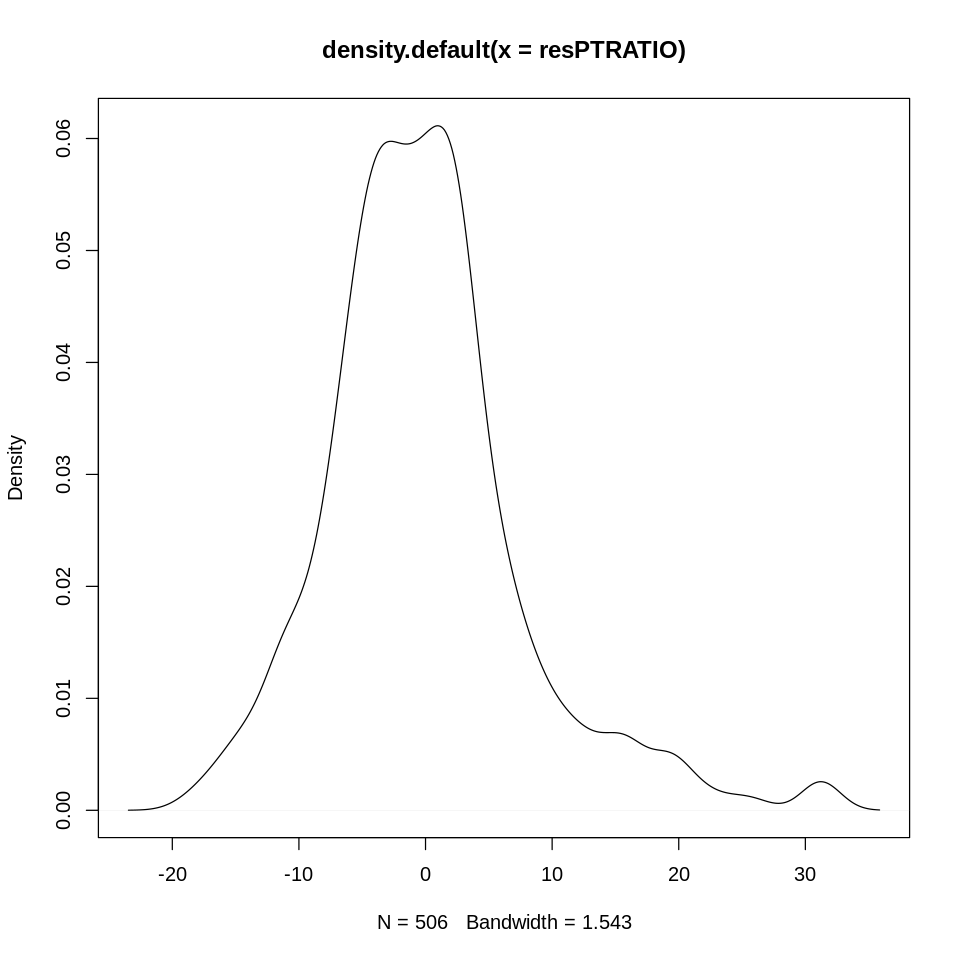

In [ ]:
options(repr.plot.width=8, repr.plot.height=8)
ggplot(data = bostonDataset,aes(x = PTRATIO, y = MEDV)) + geom_point() +geom_smooth(method = "lm")
#plot(bostonDataset$PTRATIO, bostonDataset$MEDV, main="Scatterplot PTRATIO-MEDV",#xlab="PTRATIO", ylab="MEDV", pch=19)
#abline(lmPTRATIO, col="red")
#plot(lmPTRATIO$residuals, pch = 16, col = "red")

resPTRATIO = resid(lmPTRATIO)
paste ('Supuesto 1, Media de los errores: ')
paste ('Residuos: ', mean(resLSTAT))
plot(fitted(lmPTRATIO), resPTRATIO)
abline(0,0)

qqnorm(resPTRATIO)
qqline(resPTRATIO)

plot(density(resPTRATIO))

In [ ]:
paste ('Supuesto 2, Covarianza: ')
dwtest(lmPTRATIO)

[1] "Supuesto 2, Covarianza: "


	Durbin-Watson test

data:  lmPTRATIO
DW = 0.72526, p-value < 2.2e-16
alternative hypothesis: true autocorrelation is greater than 0


In [ ]:
paste ('Supuesto 3, Homoscedasticidad: ')
bptest(lmPTRATIO)

[1] "Supuesto 3, Homoscedasticidad: "


	studentized Breusch-Pagan test

data:  lmPTRATIO
BP = 15.58, df = 1, p-value = 7.911e-05


In [ ]:
paste ('Supuesto 5, Normalidad: ')
jarque.bera.test(resPTRATIO)

[1] "Supuesto 5, Normalidad: "


	Jarque Bera Test

data:  resPTRATIO
X-squared = 191.44, df = 2, p-value < 2.2e-16


In [ ]:
#options(repr.plot.width=20, repr.plot.height=20)
#chart.Correlation(bostonDataset, histogram = TRUE, method = "pearson")

In [ ]:
shapiro.test(rstudent(lmLSTAT))


	Shapiro-Wilk normality test

data:  rstudent(lmLSTAT)
W = 0.87654, p-value < 2.2e-16
